# Automated Report Generation

This project automated the generation of PDF pre-game reports for upcoming matchweeks across the top 5 leagues. Utilizing stats scraped from understat.com and fotmob.com, the reports encompass advanced Expected Goals (xG) data, xG Difference, and xGA Difference. The system rapidly creates reports for all matches within a matchday, showcasing high scalability. These reports serve as inputs for intelligent pre-game analysis and betting strategies, offering quick insights into upcoming games.

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from highlight_text import fig_text
from PIL import Image
import urllib
from mplsoccer import Radar, FontManager, grid
import numpy as np
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from pathlib import Path
from urllib.request import urlopen
from io import BytesIO
import requests
import os

In [55]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

### Associate all teams with their logos

In [56]:
fotmob_url = "https://images.fotmob.com/image_resources/logo/teamlogo/"

dict_teams = {'Bayern Munich':'9823', 
              'Borussia Dortmund':'9789',
              'Bayer Leverkusen':'8178',
             'VfB Stuttgart':'10269',
             'RasenBallsport Leipzig':'178475',
             'Hoffenheim': 8226,
             'Wolfsburg':8721,
             'Eintracht Frankfurt': 9810,
             'Freiburg': 8358,
             'Union Berlin': 8149,
             'Werder Bremen': 8697,
             'Augsburg': 8406,
             'FC Heidenheim': 94937,
             'Bochum': 9911,
             'Borussia M.Gladbach': 9788,
             'FC Cologne': 8722,
             'Darmstadt': 8262,
             'Mainz 05': 9905,
            'Manchester City': 8456,
             'Liverpool': 8650,
             'Brighton': 10204,
             'Tottenham': 8586,
             'Arsenal': 9825,
             'Aston Villa': 10252,
             'West Ham': 8654,
             'Newcastle United': 10261,
             'Manchester United': 10260,
             'Crystal Palace': 9826,
             'Fulham': 9879,
             'Nottingham Forest': 10203,
             'Brentford': 9937,
             'Chelsea': 8455,
             'Everton': 8668,
             'Wolverhampton Wanderers': 8602,
             'Bournemouth': 8678,
             'Luton': 8346,
             'Burnley': 8191,
             'Sheffield United': 8657,
              'Girona': 7732,
             'Real Madrid': 8633,
             'Barcelona': 8634,
             'Athletic Club': 8315,
             'Atletico Madrid': 9906,
             'Real Sociedad': 8560,
             'Rayo Vallecano': 8370,
             'Valencia': 10267,
             'Cadiz': 8385,
             'Real Betis': 8603,
             'Getafe': 8305,
             'Sevilla': 8302,
             'Villarreal': 10205,
             'Osasuna': 8371,
             'Alaves': 9866,
             'Mallorca': 8661,
             'Celta Vigo': 9910,
             'Las Palmas': 8306,
             'Granada': 7878,
             'Almeria': 9865, 
              'Brest': 8521,
             'Nice': 9831,
             'Paris Saint Germain': 9847,
             'Monaco': 9829,
             'Reims': 9837,
             'Strasbourg': 9848,
             'Le Havre': 9746,
             'Marseille': 8592,
             'Rennes': 9851,
             'Nantes': 9830,
             'Lille': 8639,
             'Metz': 8550,
             'Montpellier': 10249,
             'Lorient': 8689,
             'Toulouse': 9941,
             'Lens': 8588,
             'Lyon': 9748,
             'Clermont Foot': 8311,
              'Inter': 8636,
             'AC Milan': 8564,
             'Juventus': 9885,
             'Atalanta': 8524,
             'Napoli': 9875,
             'Lecce': 9888,
             'Fiorentina': 8535,
             'Frosinone': 9891,
             'Sassuolo': 7943,
             'Torino': 9804,
             'Genoa': 10233,
             'Lazio': 8543,
             'Bologna': 9857,
             'Verona': 9876,
             'Monza': 6504,
             'Roma': 8686,
             'Salernitana': 6480,
             'Udinese': 8600,
             'Empoli': 8534,
             'Cagliari': 8529 
             }

# set up download directory
download_directory = 'team_logos/'

# create the directory if it doesn't exist
os.makedirs(download_directory, exist_ok=True)

# download images and save in directory
for team, team_id in dict_teams.items():
    url = f"{fotmob_url}{team_id}.png"
    response = requests.get(url)
    if response.status_code == 200:
        with open(os.path.join(download_directory, f"{team}.png"), 'wb') as file:
            file.write(response.content)
            print(f"Downloaded: {team}")
    else:
            print(f"Failed to download: {team}")

Downloaded: Bayern Munich
Downloaded: Borussia Dortmund
Downloaded: Bayer Leverkusen
Downloaded: VfB Stuttgart
Downloaded: RasenBallsport Leipzig
Downloaded: Hoffenheim
Downloaded: Wolfsburg
Downloaded: Eintracht Frankfurt
Downloaded: Freiburg
Downloaded: Union Berlin
Downloaded: Werder Bremen
Downloaded: Augsburg
Downloaded: FC Heidenheim
Downloaded: Bochum
Downloaded: Borussia M.Gladbach
Downloaded: FC Cologne
Downloaded: Darmstadt
Downloaded: Mainz 05
Downloaded: Manchester City
Downloaded: Liverpool
Downloaded: Brighton
Downloaded: Tottenham
Downloaded: Arsenal
Downloaded: Aston Villa
Downloaded: West Ham
Downloaded: Newcastle United
Downloaded: Manchester United
Downloaded: Crystal Palace
Downloaded: Fulham
Downloaded: Nottingham Forest
Downloaded: Brentford
Downloaded: Chelsea
Downloaded: Everton
Downloaded: Wolverhampton Wanderers
Downloaded: Bournemouth
Downloaded: Luton
Downloaded: Burnley
Downloaded: Sheffield United
Downloaded: Girona
Downloaded: Real Madrid
Downloaded: Barc

### Importing leagues datasets:

In [57]:
columns_to_round = ['xG', 'xGA', 'xPTS',
       'xG per Game', 'xGA per Game', 'xPTS per Game', 'xG per Game Diff',
       'xGA per Game Diff', 'M_x', 'W_x', 'D_x', 'L_x', 'G_x', 'GA_x', 'PTS_x',
       'xG_x', 'xGA_x', 'xPTS_x', 'xG per Game_x', 'xGA per Game_x',
       'xPTS per Game_x', 'xG per Game Diff_x', 'xGA per Game Diff_x', 'M_y',
       'W_y', 'D_y', 'L_y', 'G_y', 'GA_y', 'PTS_y', 'xG_y', 'xGA_y', 'xPTS_y',
       'xG per Game_y', 'xGA per Game_y', 'xPTS per Game_y',
       'xG per Game Diff_y', 'xGA per Game Diff_y']

# import the dataset 
bundesliga_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/Bundesliga.xlsx')
bundesliga_df = bundesliga_df.reset_index().rename(columns={'index': 'N'})
bundesliga_df['N'] += 1
bundesliga_df[columns_to_round] = bundesliga_df[columns_to_round].round(2)


laliga_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/La Liga.xlsx')
laliga_df = laliga_df.reset_index().rename(columns={'index': 'N'})
laliga_df['N'] += 1
laliga_df[columns_to_round] = laliga_df[columns_to_round].round(2)


seriea_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/Serie A.xlsx')
seriea_df = seriea_df.reset_index().rename(columns={'index': 'N'})
seriea_df['N'] += 1
seriea_df[columns_to_round] = seriea_df[columns_to_round].round(2)


ligue1_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/Ligue 1.xlsx')
ligue1_df = ligue1_df.reset_index().rename(columns={'index': 'N'})
ligue1_df['N'] += 1
ligue1_df[columns_to_round] = ligue1_df[columns_to_round].round(2)
ligue1_df['Team'] = ligue1_df['Team'].str.strip()


epl_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/TotalStandings(Cleansed)/EPL.xlsx')
epl_df = epl_df.reset_index().rename(columns={'index': 'N'})
epl_df['N'] += 1
epl_df[columns_to_round] = epl_df[columns_to_round].round(2)

In [58]:
ligue1_df.head()

N                 Team   M   W  D  L   G  GA  PTS     xG  ...  GA_y  PTS_y  \
0  1  Paris Saint Germain  17  12  4  1  42  14   40  38.09  ...     6     18   
1  2                 Nice  17  10  5  2  19   9   35  27.26  ...     7     14   
2  3               Monaco  17  10  3  4  33  22   33  31.23  ...    17     15   
3  4                Brest  17   9  4  4  25  15   31  25.05  ...     8     16   
4  5                Lille  17   7  7  3  21  14   28  27.37  ...    10     11   

    xG_y  xGA_y  xPTS_y  xG per Game_y  xGA per Game_y  xPTS per Game_y  \
0  20.94  13.10   15.76           2.62            1.64             1.97   
1  12.65   8.09   14.18           1.58            1.01             1.77   
2  18.40  13.69   14.36           2.04            1.52             1.60   
3  10.82  14.91    9.17           1.20            1.66             1.02   
4  10.88  11.32   11.92           1.21            1.26             1.32   

   xG per Game Diff_y  xGA per Game Diff_y  
0               -0.49                 0.89  
1               -0.58                 0.14  
2               -0.04                -0.37  
3               -0.09                 0.77  
4               -0.10                 0.15  

[5 rows x 47 columns]

In [59]:
# Manipulating the Original dataset
new_df = pd.read_excel('/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/Odds Inputting/odds_input_external.xlsx')
new_df.head()

#split the game column into home_team and away team
new_df[['home_team', 'away_team']] = new_df['Game'].str.split(' vs ', expand=True)

# sort the df based of probabiltiies 
new_df = new_df.sort_values(by='+2.5(%)', ascending=False)
new_df = new_df.reset_index(drop=True)

# delete Eredivisie rows
new_df = new_df[new_df['League'] != 'Eredivisie']
new_df = new_df.reset_index(drop=True)

new_df = new_df.head(11)

In [60]:
new_df

Game      League  +1.5(%)  \
0                     Bayern Munich vs Hoffenheim  Bundesliga     1.00   
1                   Tottenham vs Newcastle United     Premier     0.97   
2                        Freiburg vs Union Berlin  Bundesliga     0.96   
3                    Augsburg vs Bayer Leverkusen  Bundesliga     0.96   
4   RasenBallsport Leipzig vs Eintracht Frankfurt  Bundesliga     0.96   
5                  Darmstadt vs Borussia Dortmund  Bundesliga     0.96   
6                    Sheffield United vs West Ham     Premier     0.96   
7                         Real Madrid vs Mallorca     La Liga     0.94   
8                         Bochum vs Werder Bremen  Bundesliga     0.94   
9                  Manchester United vs Tottenham     Premier     0.95   
10                              Chelsea vs Fulham     Premier     0.94   

    +2.5(%)  +3.5(%)  H+1.5(%)  A+1.5(%)    xG Decision O1.5 O2.5 H1.5  \
0      0.98     0.92      0.97      0.20  8.48     O2.5                  
1      0.86     0.66      0.76      0.43  6.39     O2.5                  
2      0.85     0.67      0.83      0.14  5.80     O2.5                  
3      0.85     0.65      0.25      0.80  5.96     O2.5                  
4      0.84     0.66      0.83      0.09  5.53     O2.5                  
5      0.84     0.63      0.31      0.76  5.96     O2.5                  
6      0.82     0.60      0.32      0.74  5.84     O1.5                  
7      0.81     0.64      0.81      0.01  4.88     O1.5                  
8      0.80     0.58      0.75      0.18  5.39     O1.5                  
9      0.79     0.55      0.34      0.68  5.60     O1.5                  
10     0.78     0.57      0.75      0.13  5.17     O1.5                  

                 home_team            away_team  
0            Bayern Munich           Hoffenheim  
1                Tottenham     Newcastle United  
2                 Freiburg         Union Berlin  
3                 Augsburg     Bayer Leverkusen  
4   RasenBallsport Leipzig  Eintracht Frankfurt  
5                Darmstadt    Borussia Dortmund  
6         Sheffield United             West Ham  
7              Real Madrid             Mallorca  
8                   Bochum        Werder Bremen  
9        Manchester United            Tottenham  
10                 Chelsea               Fulham

In [61]:
# define the games report:
'''
# MANUAL INPUT - 5 games
home_team = ['Barcelona', 'Aston Villa', 'Manchester United', 'Wolverhampton Wanderers'] #, 'Bayern Munich', 'Arsenal']
away_team =  ['Real Sociedad', 'Luton', 'Manchester City', 'Newcastle United'] #, 'Borussia Dortmund', 'Manchester City']

games_df = pd.DataFrame(columns=['home_team', 'away_team', 'League'])
games_df['home_team'] = home_team
games_df['away_team'] = away_team
'''


games_df = new_df



# create a foor loop for changing values in 'League' variable

counter = 0

while counter < len(games_df):
    if games_df['home_team'][counter].strip().lower() in laliga_df['Team'].str.strip().str.lower().values:
        games_df['League'][counter] = 'La Liga'
    elif games_df['home_team'][counter].strip().lower() in bundesliga_df['Team'].str.strip().str.lower().values:
        games_df['League'][counter] = 'Bundesliga'
    elif games_df['home_team'][counter].strip().lower() in seriea_df['Team'].str.strip().str.lower().values:
        games_df['League'][counter] = 'Serie A'
    elif games_df['home_team'][counter].strip().lower() in ligue1_df['Team'].str.strip().str.lower().values:
        games_df['League'][counter] = 'Ligue 1'
    else:
        games_df['League'][counter] = 'EPL'
        
    counter += 1
games_df['home_team'] = games_df['home_team'].str.strip()
games_df['away_team'] = games_df['away_team'].str.strip()
games_df

/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_10471/3033922719.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['League'][counter] = 'EPL'
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_10471/3033922719.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  games_df['League'][counter] = 'Bundesliga'
/var/folders/7x/mwsg2nfd0gsf5h73ty0mnrb80000gn/T/ipykernel_10471/3033922719.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

Game      League  +1.5(%)  \
0                     Bayern Munich vs Hoffenheim  Bundesliga     1.00   
1                   Tottenham vs Newcastle United         EPL     0.97   
2                        Freiburg vs Union Berlin  Bundesliga     0.96   
3                    Augsburg vs Bayer Leverkusen  Bundesliga     0.96   
4   RasenBallsport Leipzig vs Eintracht Frankfurt  Bundesliga     0.96   
5                  Darmstadt vs Borussia Dortmund  Bundesliga     0.96   
6                    Sheffield United vs West Ham         EPL     0.96   
7                         Real Madrid vs Mallorca     La Liga     0.94   
8                         Bochum vs Werder Bremen  Bundesliga     0.94   
9                  Manchester United vs Tottenham         EPL     0.95   
10                              Chelsea vs Fulham         EPL     0.94   

    +2.5(%)  +3.5(%)  H+1.5(%)  A+1.5(%)    xG Decision O1.5 O2.5 H1.5  \
0      0.98     0.92      0.97      0.20  8.48     O2.5                  
1      0.86     0.66      0.76      0.43  6.39     O2.5                  
2      0.85     0.67      0.83      0.14  5.80     O2.5                  
3      0.85     0.65      0.25      0.80  5.96     O2.5                  
4      0.84     0.66      0.83      0.09  5.53     O2.5                  
5      0.84     0.63      0.31      0.76  5.96     O2.5                  
6      0.82     0.60      0.32      0.74  5.84     O1.5                  
7      0.81     0.64      0.81      0.01  4.88     O1.5                  
8      0.80     0.58      0.75      0.18  5.39     O1.5                  
9      0.79     0.55      0.34      0.68  5.60     O1.5                  
10     0.78     0.57      0.75      0.13  5.17     O1.5                  

                 home_team            away_team  
0            Bayern Munich           Hoffenheim  
1                Tottenham     Newcastle United  
2                 Freiburg         Union Berlin  
3                 Augsburg     Bayer Leverkusen  
4   RasenBallsport Leipzig  Eintracht Frankfurt  
5                Darmstadt    Borussia Dortmund  
6         Sheffield United             West Ham  
7              Real Madrid             Mallorca  
8                   Bochum        Werder Bremen  
9        Manchester United            Tottenham  
10                 Chelsea               Fulham

### Create Function

In [62]:
def report_automation(df, home, away, color_1, color_2):
    
    import urllib
    from PIL import Image
    
    params = ['W', 'G', 'xG', 'GA', 'xGA', 'PTS', 'xPTS']
    
    home_team = home
    away_team = away
    
    
    
    
    #################################################### RADAR CHART   ####################################################
    ########################################################################################################
    ########################################################################################################
    
    # storing values on lists
    # when using '.values' we are converting into numpy array, which means we have to use 'tolist' function
    # instead of pandas' '.to_list()' function
    # we use the index '[0]' because otherwise it will create a 2D list -> [[1,2,3,4]] (with four brackets), will not work for the radar
    home_values = df.loc[df['Team'] == home_team, params].values.tolist()[0] 
    away_values = df.loc[df['Team'] == away_team  , params].values.tolist()[0]
    
    
    low = [df['W'].min(),
           df['G'].min(),
           df['xG'].min(),
           df['GA'].min(),
           df['xGA'].min(),
           df['PTS'].min(),
           df['xPTS'].min()]

    high = [df['W'].max(),
           df['G'].max(),
           df['xG'].max(),
           df['GA'].max(),
           df['xGA'].max(),
           df['PTS'].max(),
           df['xPTS'].max()]

    lower_is_better = ['GA', 'xGA']

    # Instantiate the Radar Class
    radar = Radar(params, low, high,
                  lower_is_better=lower_is_better,
                  # whether to round any of the labels to integers instead of decimal places
                  round_int=[False]*len(params),
                  num_rings=4,  # the number of concentric circles (excluding center circle)
                  # if the ring_width is more than the center_circle_radius then
                  # the center circle radius will be wider than the width of the concentric circles
                  ring_width=1, center_circle_radius=1)

    # plot radar
    fig, ax = radar.setup_axis()
    
    rings_inner = radar.draw_circles(ax=ax, facecolor='#28252c', edgecolor='#28252c')


    radar1, vertices1 = radar.draw_radar_solid(home_values, ax=ax,
                                               kwargs={'facecolor': color_1,
                                                       'alpha': 0.6,
                                                       'edgecolor': '#216352',
                                                       'lw': 3})



    radar2, vertices2 = radar.draw_radar_solid(away_values, ax=ax,
                                               kwargs={'facecolor': color_2,
                                                       'alpha': 0.6,
                                                       'edgecolor': '#222b54',
                                                       'lw': 3})
    


    range_labels = radar.draw_range_labels(ax=ax, fontsize=18, color='#fcfcfc', fontproperties=robotto_thin.prop)
    param_labels = radar.draw_param_labels(ax=ax, fontsize=18, color='#fcfcfc', fontproperties=robotto_thin.prop)

    #lines = radar.spoke(ax=ax, color='#a6a4a1', linestyle='--', zorder=2)

    
    ax.set_facecolor('#121212')
    fig.set_facecolor('#121212')
    fig.savefig('main_radar.png')
 
    

    ################################################# BAR GRAPHS #############################################
    ########################################################################################################
    ########################################################################################################
    
    ############################################################ GRAPH 1: METRICS PER GAME
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
    
    # graph 1 - HOME
    desired_categories_h = [ 'Team', 'xG per Game_x', 'xGA per Game_x', 'xPTS per Game_x'] #, 'xG per Game Diff_x', 'xGA per Game Diff_x']

    # Filter the DataFrame for the desired team (e.g., replace 'TeamName' with the actual team name)
    team_name = home
    filtered_df_h = df[df['Team'] == team_name][desired_categories_h].set_index('Team').T

    filtered_df_h.plot(kind='barh', ax=ax[0], width=0.8, color= color_1) #, figsize=(10, 8))
    
    # graph 2 - AWAY
    desired_categories_a = [ 'Team', 'xG per Game_y', 'xGA per Game_y', 'xPTS per Game_y']
    team_name = away
    filtered_df_a = df[df['Team'] == team_name][desired_categories_a].set_index('Team').T
    filtered_df_a.plot(kind='barh', ax=ax[1], width=0.8, color=color_2)
    
    # Customize the y-axis label
    #ax.set_yticklabels(desired_categories_h)

    #Set ax limits for visualization accuracy
    ax[0].set_xlim(0, 5)
    ax[1].set_xlim(0, 5)

    ax[0].set_xticks(np.arange(0, 7, 1))
    ax[1].set_xticks(np.arange(0, 7, 1))


    # change color of axis' label-values
    ax[0].tick_params(axis='x', colors='white') 
    ax[0].tick_params(axis='y', colors='white') 

    ax[1].tick_params(axis='x', colors='white') 
    ax[1].tick_params(axis='y', colors='white')

    # Change the size of tick labels and tick parameters
    ax[0].tick_params(axis='both', which='both', labelsize=20, length=6, width=2)  # Adjust labelsize, length, and width as needed
    ax[1].tick_params(axis='both', which='both', labelsize=20, length=6, width=2)

    # change color of spines (lines in the axis)
    ax[0].spines["bottom"].set_color("white")  # Change x-axis color to white
    ax[0].spines["left"].set_color("white")    # Change y-axis color to white

    # change color of spines (lines in the axis)
    ax[1].spines["bottom"].set_color("white")  # Change x-axis color to white
    ax[1].spines["left"].set_color("white")    # Change y-axis color to white

    # gridlines
    ax[0].grid(True, ls = ":", color = "#444444")
    ax[1].grid(True, ls = ":", color = "#444444")

    # set up background color
    ax[0].set_facecolor('#121212')
    ax[1].set_facecolor('#121212')
    fig.set_facecolor('#121212')

    plt.savefig('barh_xg.png')
    plt.show()
    
    ############################################################ GRAPH 1: METRICS PER DIFF
    
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 3))

    # graph 1 - HOME
    desired_categories_h2 = [ 'Team', 'xG per Game Diff_x', 'xGA per Game Diff_x', ]

    # Filter the DataFrame for the desired team (e.g., replace 'TeamName' with the actual team name)
    team_name = home
    filtered_df_h2 = df[df['Team'] == team_name][desired_categories_h2].set_index('Team').T
    filtered_df_h2.plot(kind='barh', ax=ax[0], width=0.8, color= color_1) #, figsize=(10, 8))

    # graph 2 - AWAY
    desired_categories_a2 = [ 'Team', 'xG per Game Diff_y', 'xGA per Game Diff_y']
    team_name = away
    filtered_df_a2 = df[df['Team'] == team_name][desired_categories_a2].set_index('Team').T
    filtered_df_a2.plot(kind='barh', ax=ax[1], width=0.5, color=color_2)

    # Customize the y-axis label
    #ax.set_yticklabels(desired_categories_h)

    '''
    #Set ax limits for visualization accuracy
    ax[0].set_xlim(0, 1)
    ax[1].set_xlim(0, 1)

    ax[0].set_xticks(np.arange(0, 1, 0.1))
    ax[1].set_xticks(np.arange(0, 1, 0.1))
    '''
    #ax[0].set_xticks(np.arange(0, 0.5, 0.5))

    # change color of axis' label-values
    ax[0].tick_params(axis='x', colors='white') 
    ax[0].tick_params(axis='y', colors='white') 

    ax[1].tick_params(axis='x', colors='white') 
    ax[1].tick_params(axis='y', colors='white')

    # Change the size of tick labels and tick parameters
    ax[0].tick_params(axis='both', which='both', labelsize=20, length=6, width=2)  # Adjust labelsize, length, and width as needed
    ax[1].tick_params(axis='both', which='both', labelsize=20, length=6, width=2)

    # change color of spines (lines in the axis)
    ax[0].spines["bottom"].set_color("white")  # Change x-axis color to white
    ax[0].spines["left"].set_color("white")    # Change y-axis color to white

    # change color of spines (lines in the axis)
    ax[1].spines["bottom"].set_color("white")  # Change x-axis color to white
    ax[1].spines["left"].set_color("white")    # Change y-axis color to white

    # gridlines
    ax[0].grid(True, ls = ":", color = "#444444")
    ax[1].grid(True, ls = ":", color = "#444444")

    # set up background color
    ax[0].set_facecolor('#121212')
    ax[1].set_facecolor('#121212')
    fig.set_facecolor('#121212')
    plt.savefig('barh_diff.png')
    plt.show()

    ################################################# SCATTER CHART #############################################
    ########################################################################################################
    ########################################################################################################
    
    
    fig = plt.figure(figsize = (5,3), dpi = 300)
    ax = plt.subplot(facecolor = "#EFE9E6")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    
    ''' DEFINING VARIABLES '''


    home_team = home
    away_team = away
    team_prompt = [home_team, away_team]

    variable_1 = 'xG'
    variable_2 = 'PTS'

    df_filt = df[df['Team'].isin(team_prompt)]

    
    
    ''' DRAWING DATA POINT VALUES '''

    # First we'll plot the scatter with all the defensive midfield values
    ax.scatter(
        df[variable_1],
        df[variable_2],
        s = 40,
        alpha = 0.75,
        color = '#c9d6d3',
        zorder = 3 
    )    

    ax.scatter(
        df_filt[variable_1],
        df_filt[variable_2],
        s = 40,
        alpha = 0.95,
        color = '#F64740',
        zorder = 3 ,
        ec = '#000000'
    )    
 
    
    
    ''' DRAWING GRIDLINES BASED ON MEDIAN VALUES '''

    ax.plot(
        [df[variable_1].median(), df[variable_1].median()],
        [ax.get_ylim()[0], ax.get_ylim()[1]], 
        ls = ":",
        color = "gray",
        zorder = 2
    )

    ax.plot(
        [ax.get_xlim()[0], ax.get_xlim()[1]],
        [df[variable_2].median(), df[variable_2].median()], 
        ls = ":",
        color = "gray",
        zorder = 2
    )

    ax.grid(True, ls = ":", color = "#444444")   
    
    
    ''' FOR LOOP FOR LABELING '''

    for index, name in enumerate(df_filt['Team']):
        X = df_filt[variable_1].iloc[index]
        Y = df_filt[variable_2].iloc[index]
        text_ = ax.annotate(
            xy = (X, Y),
            text = name,  #.split(' ')[1],
            ha = 'center',
            va = 'center',
            xytext = (20, 9),
            textcoords = 'offset points',
            weight = 'bold',
            fontsize = 8.5,
            #fontproperties=robotto_thin.prop
        )

        text_.set_path_effects(
                    [path_effects.Stroke(linewidth=2.3, foreground="white"), 
                    path_effects.Normal()]
                )

    
    # add labels for axes
    ax.set_xlabel("Accumulated xG", color='white', fontsize = 11, fontproperties=robotto_thin.prop)
    ax.set_ylabel("Total Points", color='white', fontsize = 11, fontproperties=robotto_thin.prop)

    # change color of axis' label-values
    ax.tick_params(axis='x', colors='white', labelsize=5) 
    ax.tick_params(axis='y', colors='white', labelsize=5) 

    # change color of spines (lines in the axis)
    ax.spines["bottom"].set_color("white")  # Change x-axis color to white
    ax.spines["left"].set_color("white")    # Change y-axis color to white''==

    ax.set_facecolor('#121212')
    fig.set_facecolor('#121212')
    plt.tight_layout()
    plt.savefig('scatter.png')   
    
    
    ################################################# CLUB LOGOS #############################################
    ########################################################################################################
    ########################################################################################################
    
    fig = plt.figure(figsize=(12, 10), dpi = 200)
    ax = plt.subplot(111)
    
    ''' HOME TEAM '''
    logo_ax = fig.add_axes([0.21, 0.55, 0.31, 0.31], zorder=1) # [left, bottom, width, height]
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{int(dict_teams[home])}.png"))
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    
    ''' AWAY TEAM '''
    logo_ax = fig.add_axes([0.51, 0.55, 0.31, 0.31], zorder=1) # [left, bottom, width, height]
    club_icon = Image.open(urllib.request.urlopen(f"{fotmob_url}{int(dict_teams[away])}.png"))
    logo_ax.imshow(club_icon)
    logo_ax.axis("off")
    

    ax.set_facecolor('#121212')
    fig.set_facecolor('#121212')

    plt.savefig('teams.png')
    plt.show()
    
    
    
    
    ################################################# PDF REPORT GENERATION #############################################
    ########################################################################################################
    ########################################################################################################    
    
    
    df_pdf = df[['N', 'Team', 'PTS', 'G', 'GA', 'xG', 'xGA', 'xPTS']] #'№',
    df_pdf_spec = df[['Team', 'xG per Game', 'xGA per Game']]
    teams = [home, away]
    df_pdf_spec = df_pdf_spec[df_pdf_spec['Team'].isin(teams)]
    df_pdf_spec
    
    
    from reportlab.lib.pagesizes import letter
    from reportlab.pdfgen import canvas
    from reportlab.lib import colors
    from reportlab.lib.pagesizes import letter
    from reportlab.platypus import SimpleDocTemplate, Table, TableStyle
    from reportlab.pdfbase.ttfonts import TTFont
    from reportlab.pdfbase import pdfmetrics
    from PIL import Image
    import pandas as pd
    import urllib
    
    c = canvas.Canvas(f'/Users/enzovillafuerte/Desktop/Python_Projects/Football Bettting Model/reports/{home} vs {away}.pdf', pagesize=letter)
    ''' BACKGROUND COLOR '''
    c.setFillColorRGB(0.071, 0.071, 0.071)  
    c.rect(0, 0, 630, 810, fill=True)
    
    # Team Logos
    c.drawImage('teams.png', 335, -60, width=270, height=220)
    c.drawImage('teams.png', 390, 600, width=270, height=220) ##### <--- THE BUSINESS LOGO SHOULD GO HERE
    
    # MAin Radar
    c.drawImage('main_radar.png', 0, 445, width=340, height=340)

    # bar charts
    c.drawImage('barh_xg.png', 26, 365, width=600, height=120)
    c.drawImage('barh_diff.png', 26, 275, width=600, height=80)
    
    # Scatter
    c.drawImage('scatter.png', 16, 5, width=340, height=255)

    ''' TEXT '''
    URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
    font_data = BytesIO(urlopen(URL4).read())
    pdfmetrics.registerFont(TTFont('RobotoThin', font_data))

    ############ Title
    c.setFont('RobotoThin', 23)
    #c.setFillColorRGB(1,1,1)  # Set text color to white
    c.setFillColor(color_1)
    title = f"{home} vs {away}"
    c.drawString(10, 760, title)

    ###### Key Stats Subtitle
    c.setFont('RobotoThin', 15)
    #c.setFillColorRGB(1,1,1)  # Set text color to white
    c.setFillColor(color_1)

    #aa65b2'
                   
    subtitle = f"Key Statistics per Game"

    c.drawString(380, 210, subtitle)

    ''' Table 1 - Standings '''

    data_1 = [df_pdf .columns.values.tolist()] + df_pdf .values.tolist()
    df_table_1 = Table(data_1)
    df_table_1.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.purple),
                                  ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                                  ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                  ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                                  ('FONTSIZE', (0, 0), (-1, 0), 7),
                                  ('BOTTOMPADDING', (0, 0), (-1, 0), 4),
                                  ('BACKGROUND', (0, 1), (-1, -1), colors.black),
                                  ('GRID', (0, 0), (-1, -1), 1, colors.grey)]))

    # Set the font size for data cells
    data_style = TableStyle([
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
        ('FONTSIZE', (0, 1), (-1, -1), 5),  # Change the font size here
        ('LEADING', (0, 1), (-1, -1), 5),
        ('TEXTCOLOR', (0, 0), (-1, -1), colors.whitesmoke),
    ])
    df_table_1.setStyle(data_style)


    # Set the table width and height
    width, height = letter
    df_table_1.wrapOn(c, width/2-50, height-150)
    #df_table_1.wrapOn(c, 50, 50)
    df_table_1.drawOn(c, 340, 515)

    ''' Table 2 - Specifics '''


    data_2 = [df_pdf_spec .columns.values.tolist()] + df_pdf_spec.values.tolist()
    df_table_2 = Table(data_2)
    df_table_2.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.purple),
                                  ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                                  ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                  ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                                  ('FONTSIZE', (0, 0), (-1, 0), 7),
                                  ('BOTTOMPADDING', (0, 0), (-1, 0), 4),
                                  ('BACKGROUND', (0, 1), (-1, -1), colors.black),
                                  ('GRID', (0, 0), (-1, -1), 1, colors.grey)]))

    # Set the font size for data cells
    data_style = TableStyle([
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
        ('FONTSIZE', (0, 1), (-1, -1), 5),  # Change the font size here
        ('LEADING', (0, 1), (-1, -1), 5),
        ('TEXTCOLOR', (0, 0), (-1, -1), colors.whitesmoke),
    ])
    df_table_2.setStyle(data_style)

    # Set the table width and height
    width, height = letter
    df_table_2.wrapOn(c, width/2-50, height-150)
    #df_table_1.wrapOn(c, 50, 50)
    df_table_2.drawOn(c, 380, 150)

    
    
    # Save and close the PDF file
    c.save()
    
    ##################################################################################################################
    ##################################################################################################################
    ##################################################################################################################
    
    c = canvas.Canvas(f'/Users/enzovillafuerte/Desktop/xG Business/Deliverables/Game Reports/{home} vs {away}.pdf', pagesize=letter)
    ''' BACKGROUND COLOR '''
    c.setFillColorRGB(0.071, 0.071, 0.071)  
    c.rect(0, 0, 630, 810, fill=True)
    
    # Team Logos
    c.drawImage('teams.png', 335, -60, width=270, height=220)
    c.drawImage('teams.png', 390, 600, width=270, height=220) ##### <--- THE BUSINESS LOGO SHOULD GO HERE
    
    # MAin Radar
    c.drawImage('main_radar.png', 0, 445, width=340, height=340)

    # bar charts
    c.drawImage('barh_xg.png', 26, 365, width=600, height=120)
    c.drawImage('barh_diff.png', 26, 275, width=600, height=80)
    
    # Scatter
    c.drawImage('scatter.png', 16, 5, width=340, height=255)

    ''' TEXT '''
    URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
    font_data = BytesIO(urlopen(URL4).read())
    pdfmetrics.registerFont(TTFont('RobotoThin', font_data))

    ############ Title
    c.setFont('RobotoThin', 23)
    #c.setFillColorRGB(1,1,1)  # Set text color to white
    c.setFillColor(color_1)
    title = f"{home} vs {away}"
    c.drawString(10, 760, title)

    ###### Key Stats Subtitle
    c.setFont('RobotoThin', 15)
    #c.setFillColorRGB(1,1,1)  # Set text color to white
    c.setFillColor(color_1)

    #aa65b2'
                   
    subtitle = f"Key Statistics per Game"

    c.drawString(380, 210, subtitle)

    ''' Table 1 - Standings '''

    data_1 = [df_pdf .columns.values.tolist()] + df_pdf .values.tolist()
    df_table_1 = Table(data_1)
    df_table_1.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.purple),
                                  ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                                  ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                  ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                                  ('FONTSIZE', (0, 0), (-1, 0), 7),
                                  ('BOTTOMPADDING', (0, 0), (-1, 0), 4),
                                  ('BACKGROUND', (0, 1), (-1, -1), colors.black),
                                  ('GRID', (0, 0), (-1, -1), 1, colors.grey)]))

    # Set the font size for data cells
    data_style = TableStyle([
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
        ('FONTSIZE', (0, 1), (-1, -1), 5),  # Change the font size here
        ('LEADING', (0, 1), (-1, -1), 5),
        ('TEXTCOLOR', (0, 0), (-1, -1), colors.whitesmoke),
    ])
    df_table_1.setStyle(data_style)


    # Set the table width and height
    width, height = letter
    df_table_1.wrapOn(c, width/2-50, height-150)
    #df_table_1.wrapOn(c, 50, 50)
    df_table_1.drawOn(c, 340, 515)

    ''' Table 2 - Specifics '''


    data_2 = [df_pdf_spec .columns.values.tolist()] + df_pdf_spec.values.tolist()
    df_table_2 = Table(data_2)
    df_table_2.setStyle(TableStyle([('BACKGROUND', (0, 0), (-1, 0), colors.purple),
                                  ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),
                                  ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
                                  ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
                                  ('FONTSIZE', (0, 0), (-1, 0), 7),
                                  ('BOTTOMPADDING', (0, 0), (-1, 0), 4),
                                  ('BACKGROUND', (0, 1), (-1, -1), colors.black),
                                  ('GRID', (0, 0), (-1, -1), 1, colors.grey)]))

    # Set the font size for data cells
    data_style = TableStyle([
        ('FONTNAME', (0, 1), (-1, -1), 'Helvetica'),  # Change the font name if needed
        ('FONTSIZE', (0, 1), (-1, -1), 5),  # Change the font size here
        ('LEADING', (0, 1), (-1, -1), 5),
        ('TEXTCOLOR', (0, 0), (-1, -1), colors.whitesmoke),
    ])
    df_table_2.setStyle(data_style)

    # Set the table width and height
    width, height = letter
    df_table_2.wrapOn(c, width/2-50, height-150)
    #df_table_1.wrapOn(c, 50, 50)
    df_table_2.drawOn(c, 380, 150)

    
    
    # Save and close the PDF file
    c.save()
    
    
    
    print(away_values)


## For Loop

Bundesliga


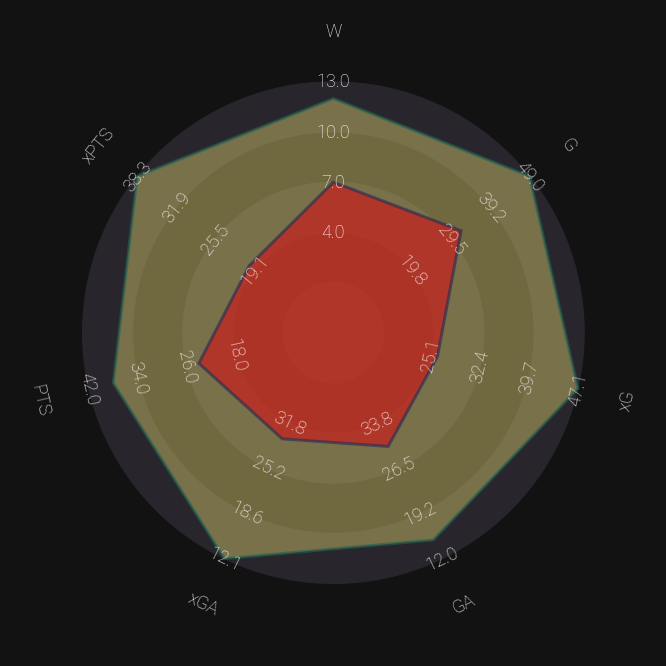

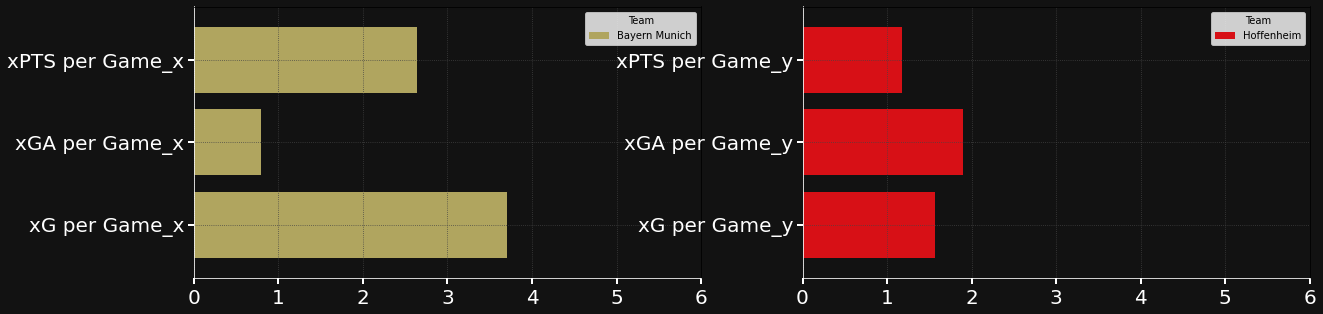

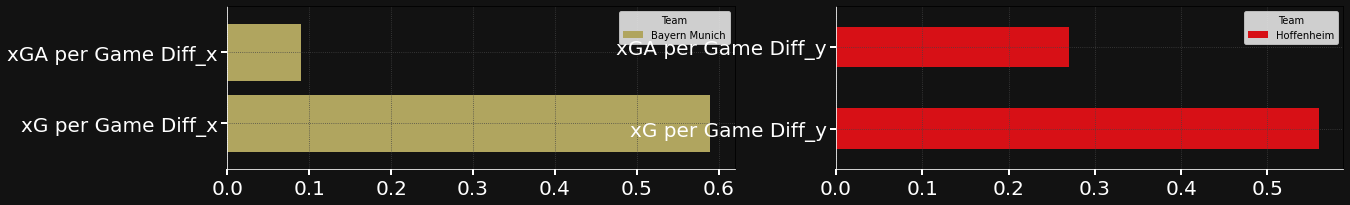

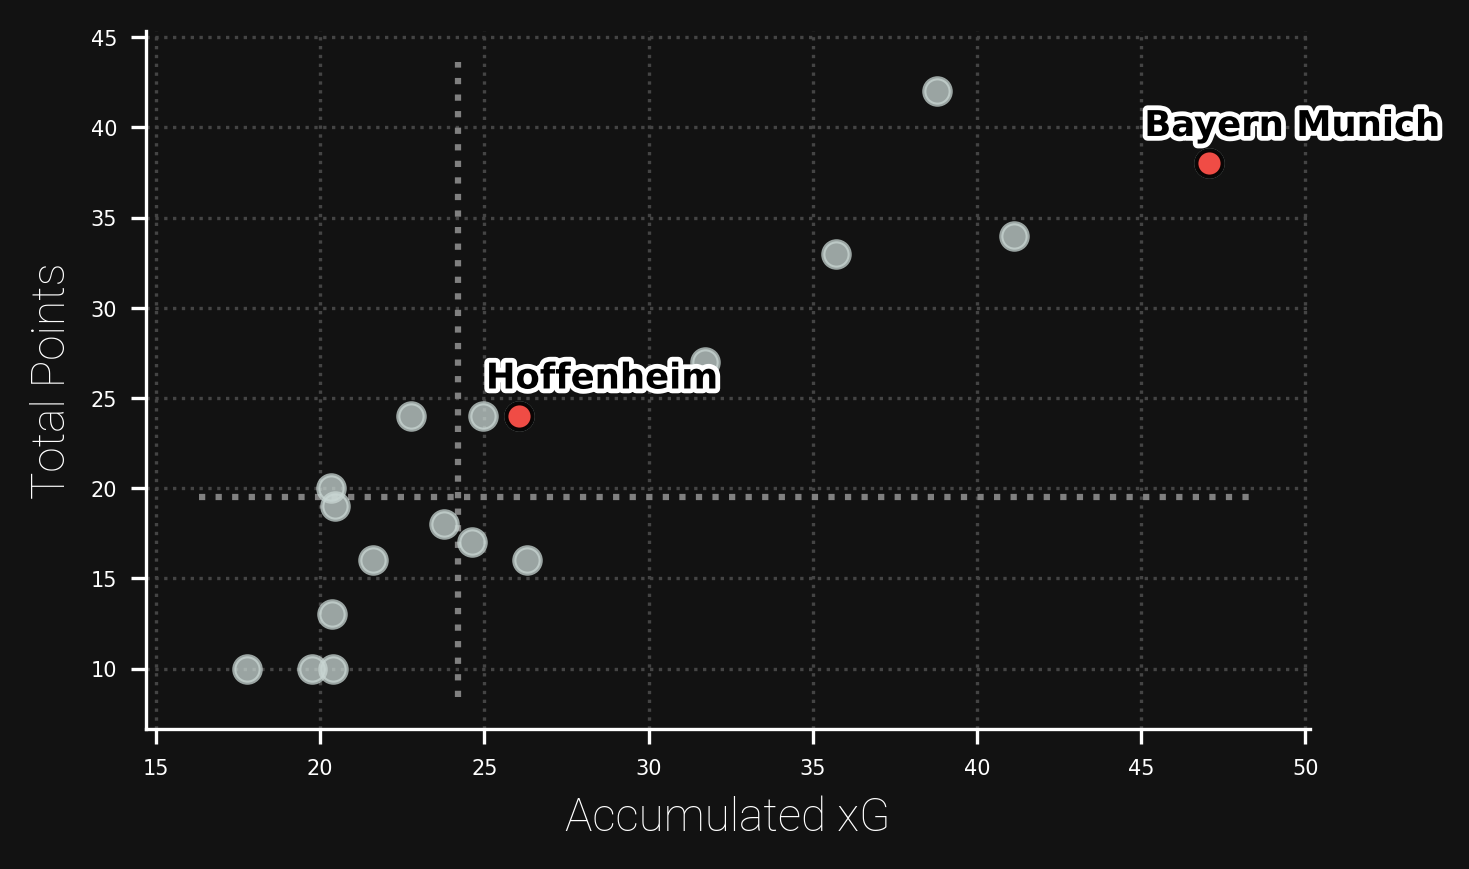

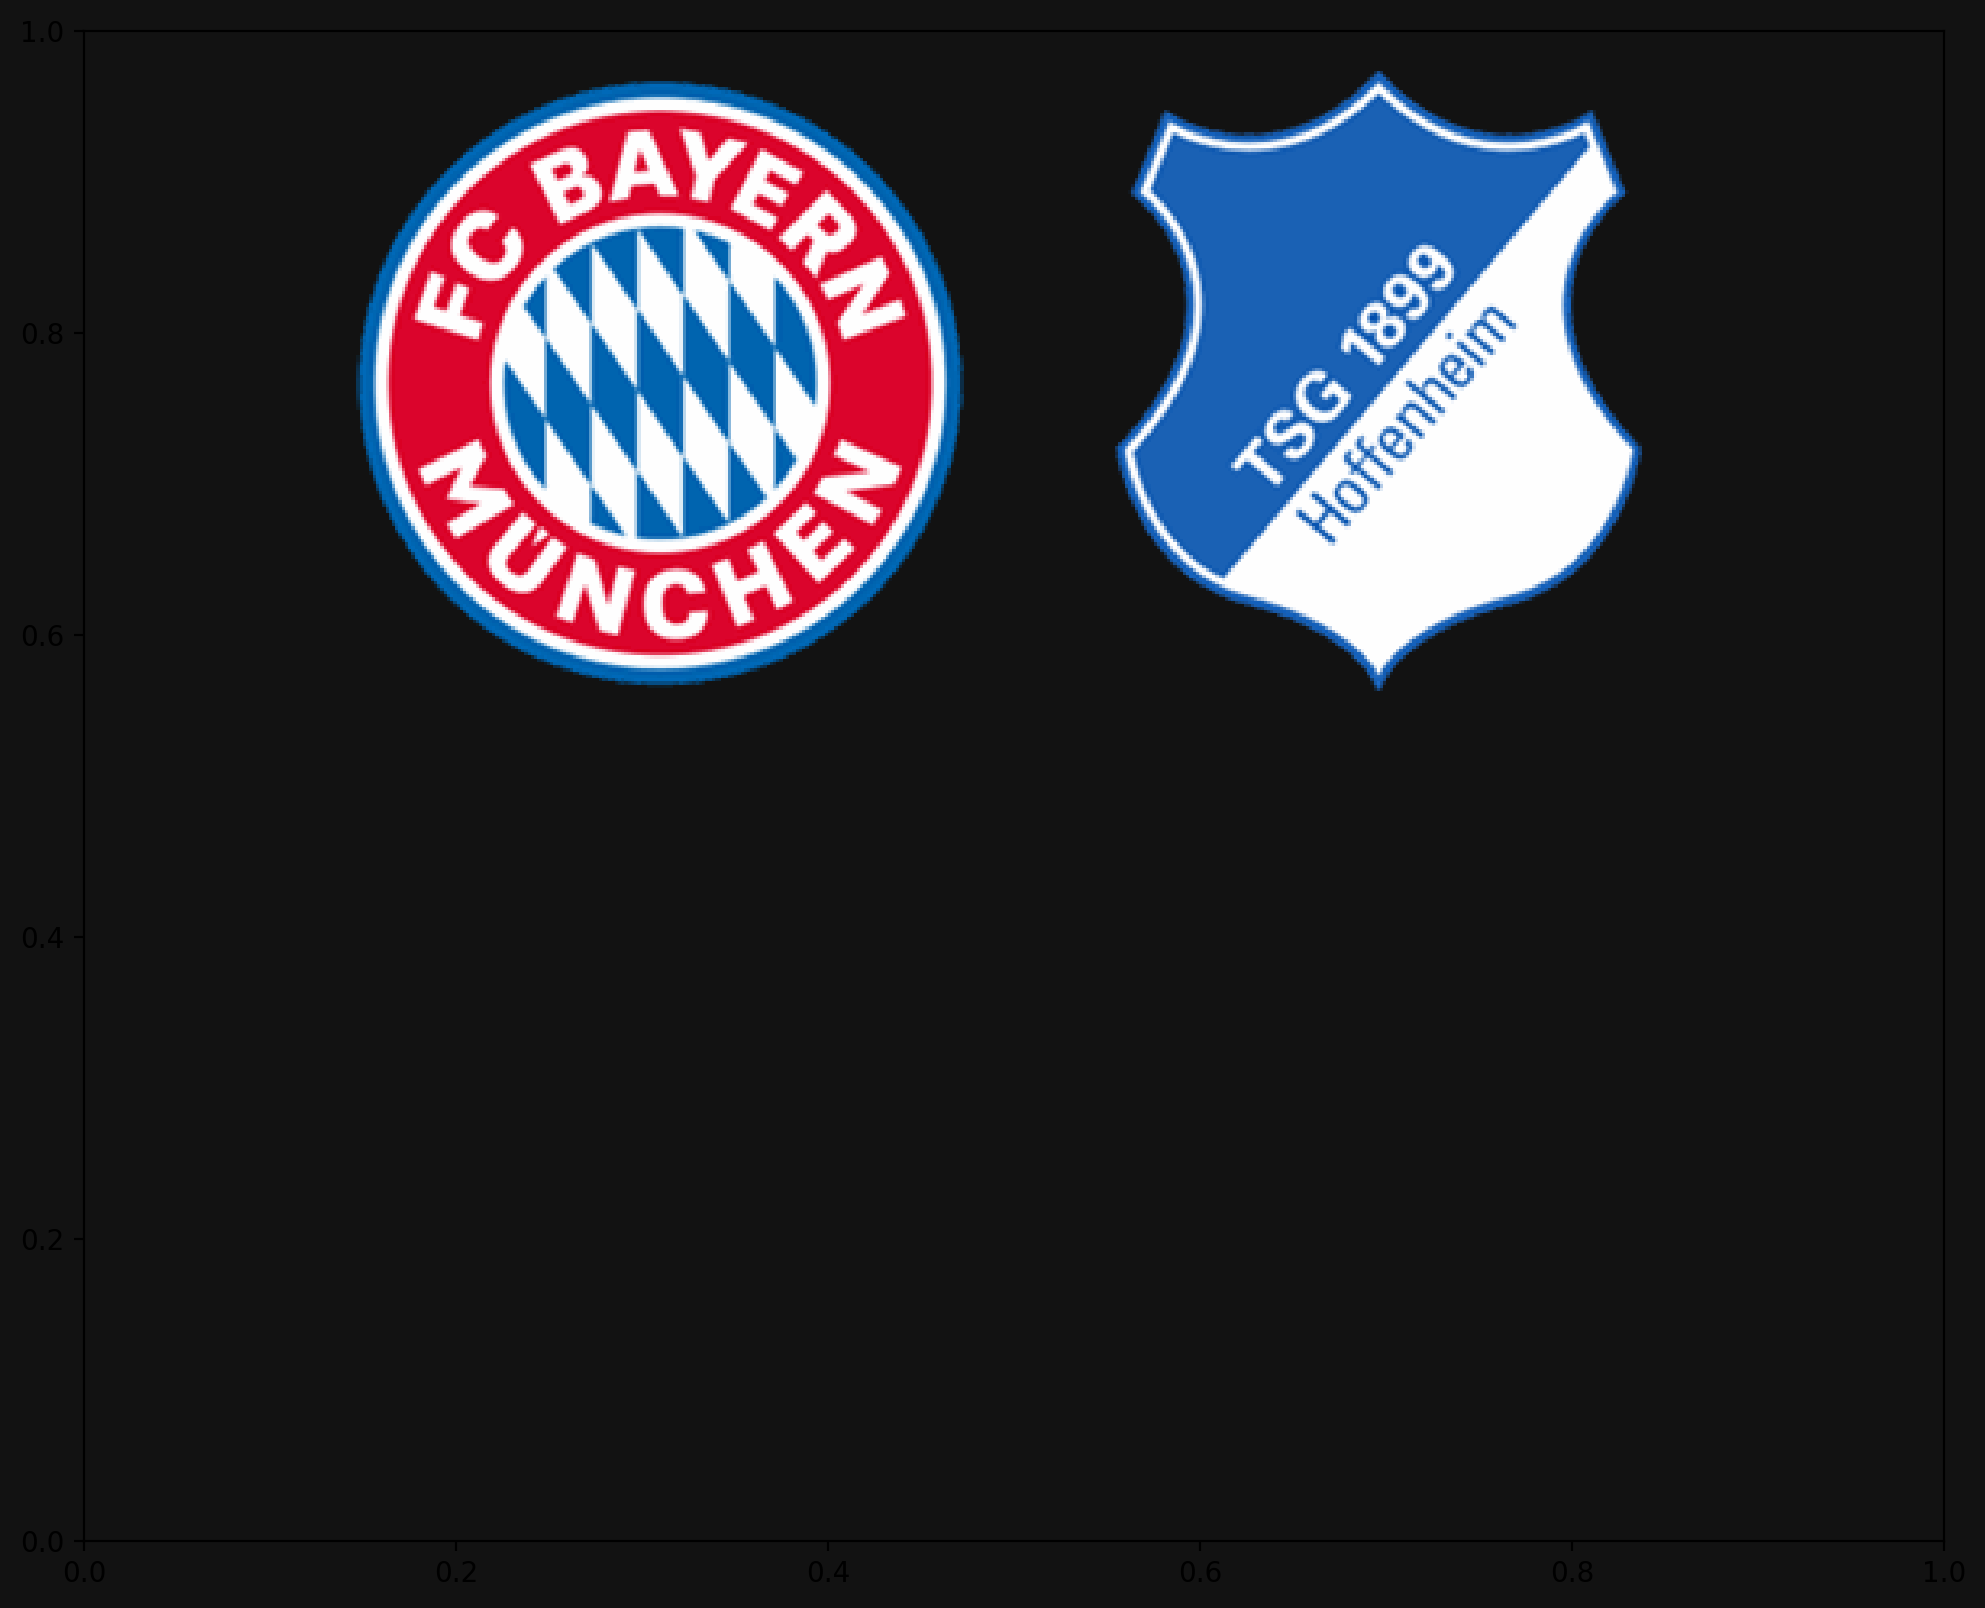

[7.0, 32.0, 26.04, 30.0, 29.47, 24.0, 20.05]
EPL


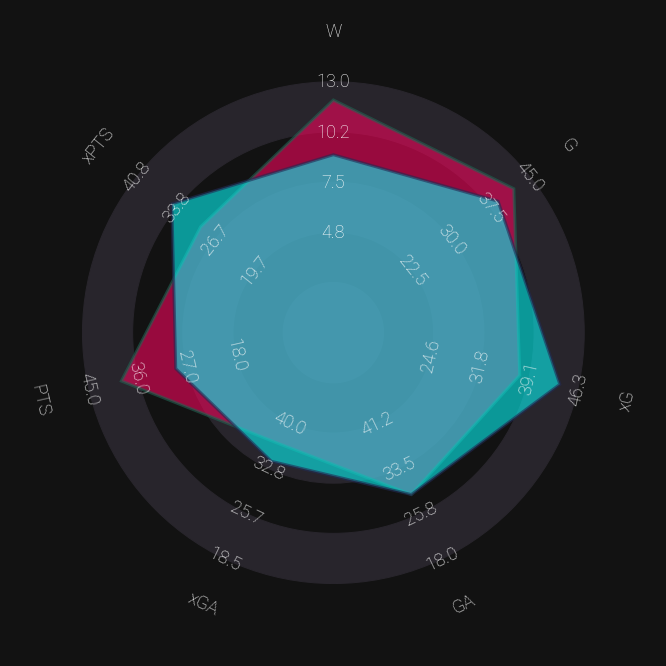

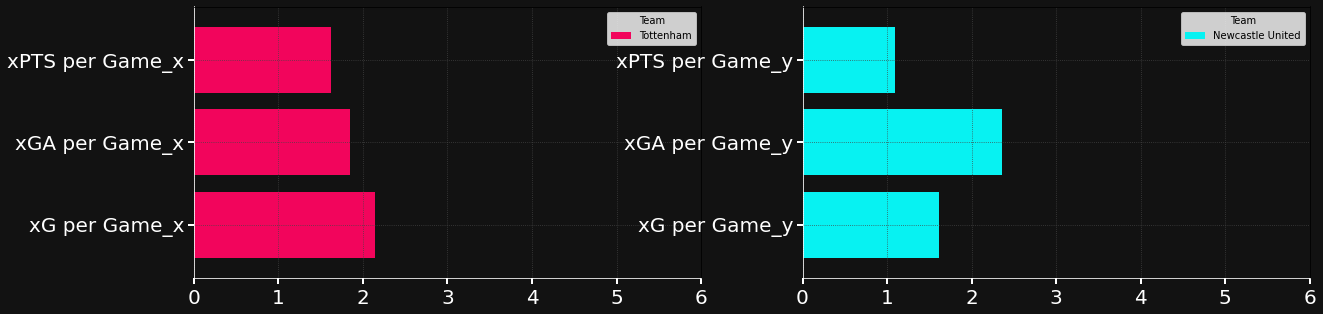

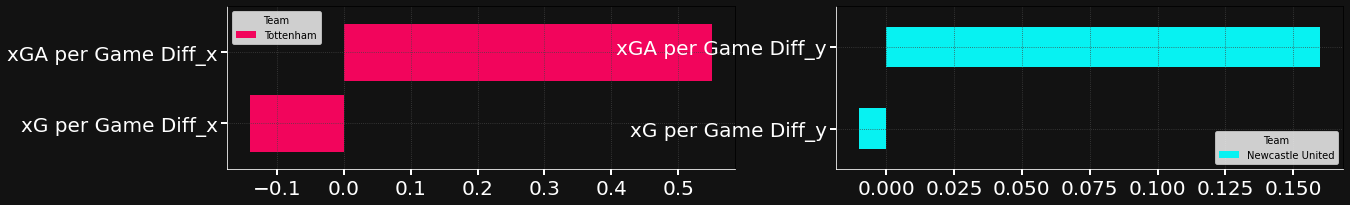

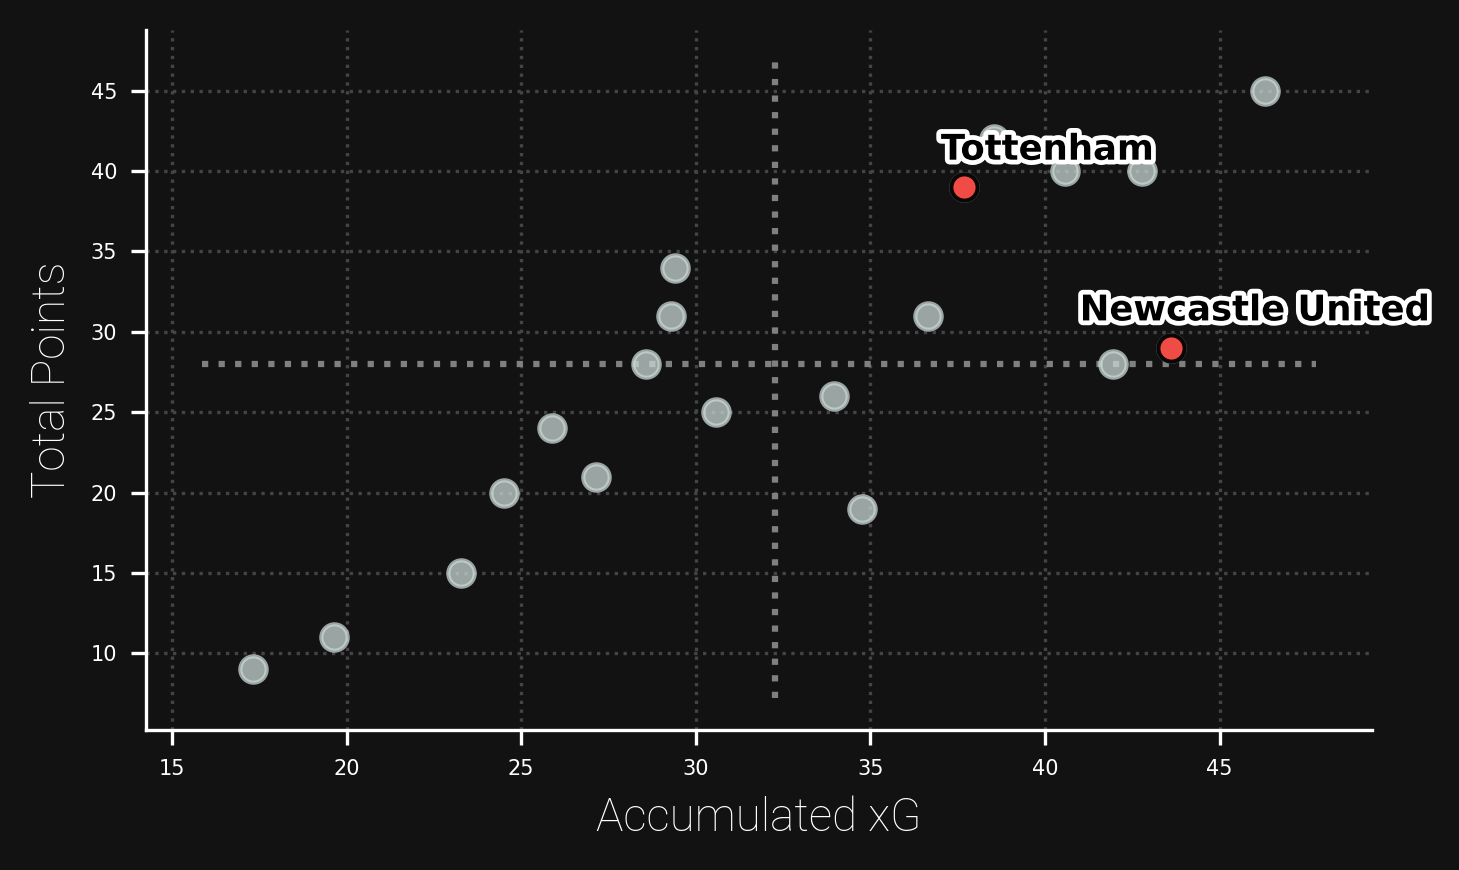

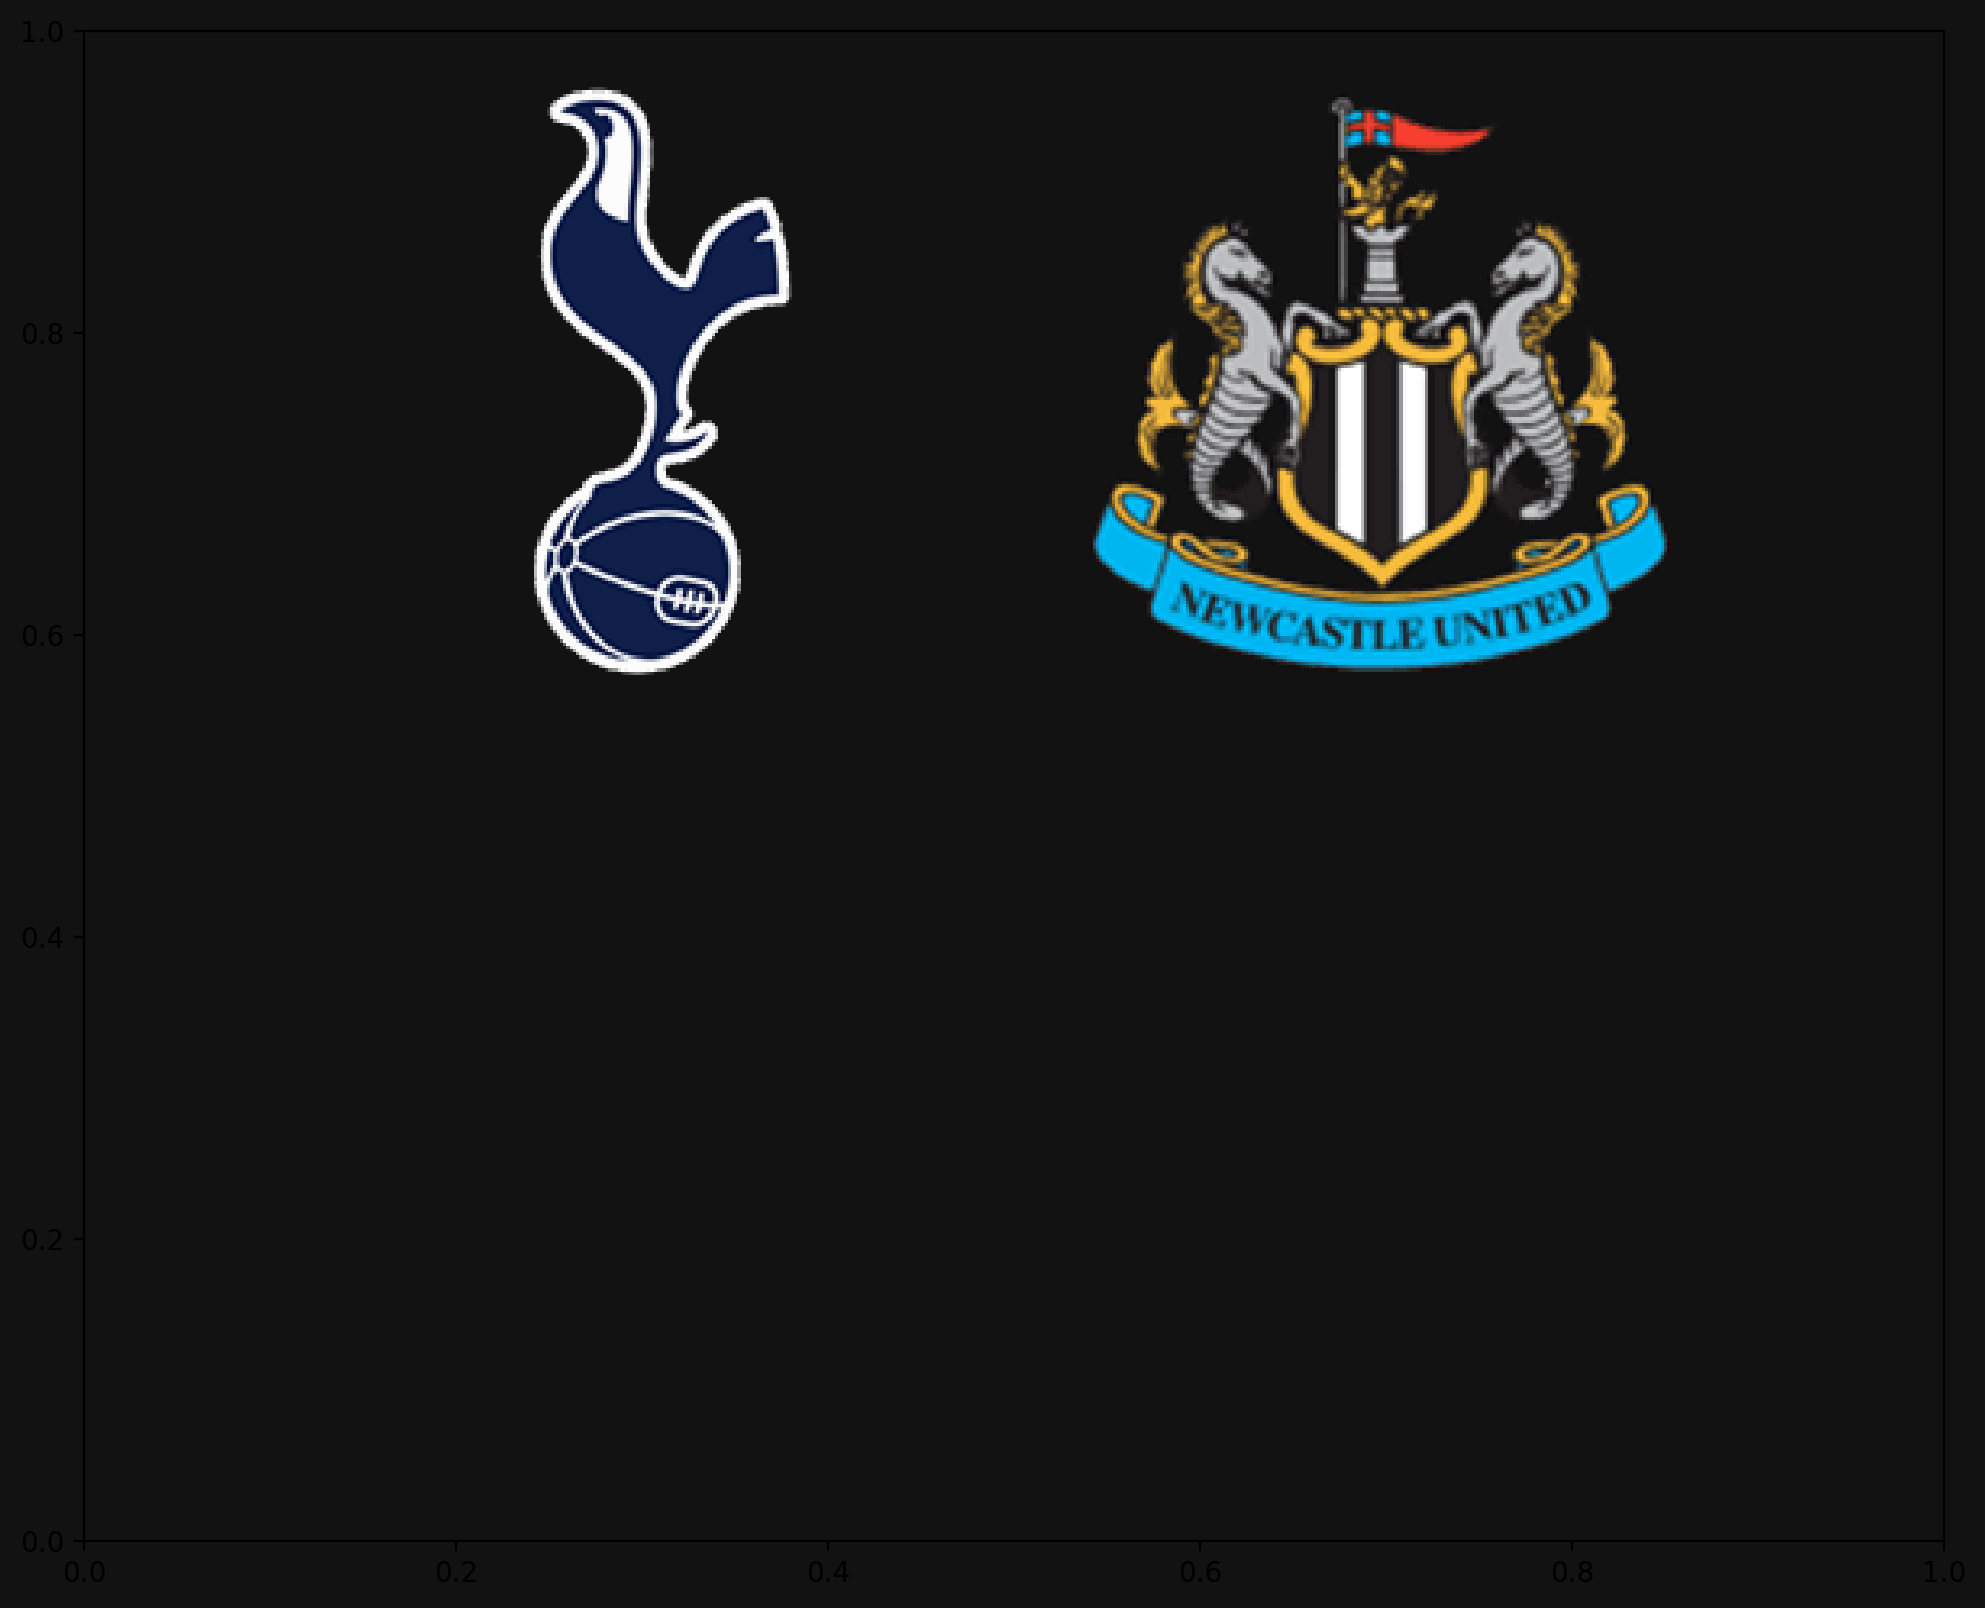

[9.0, 39.0, 43.62, 29.0, 33.92, 29.0, 34.59]
Bundesliga


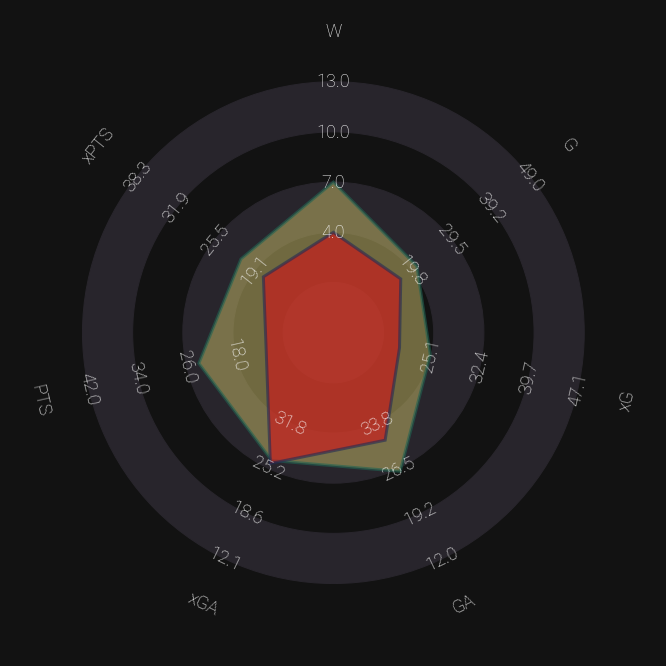

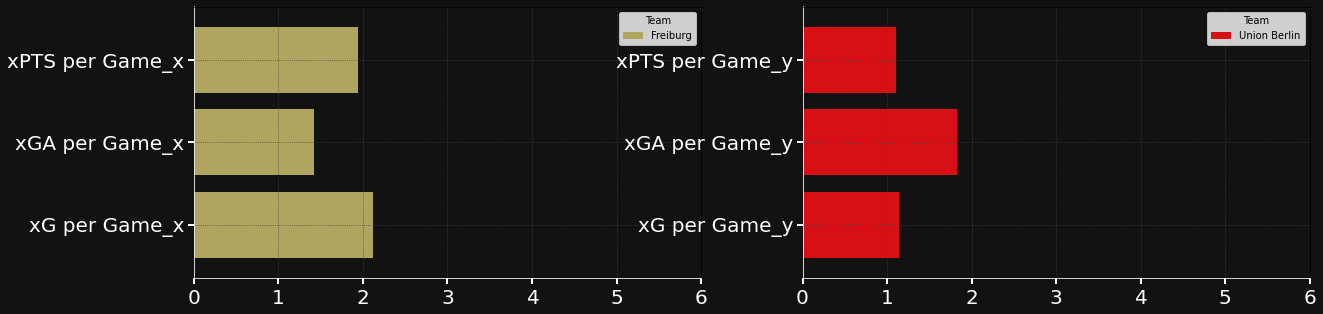

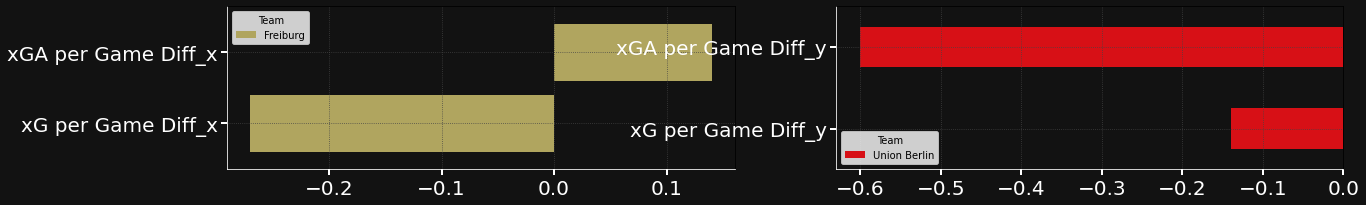

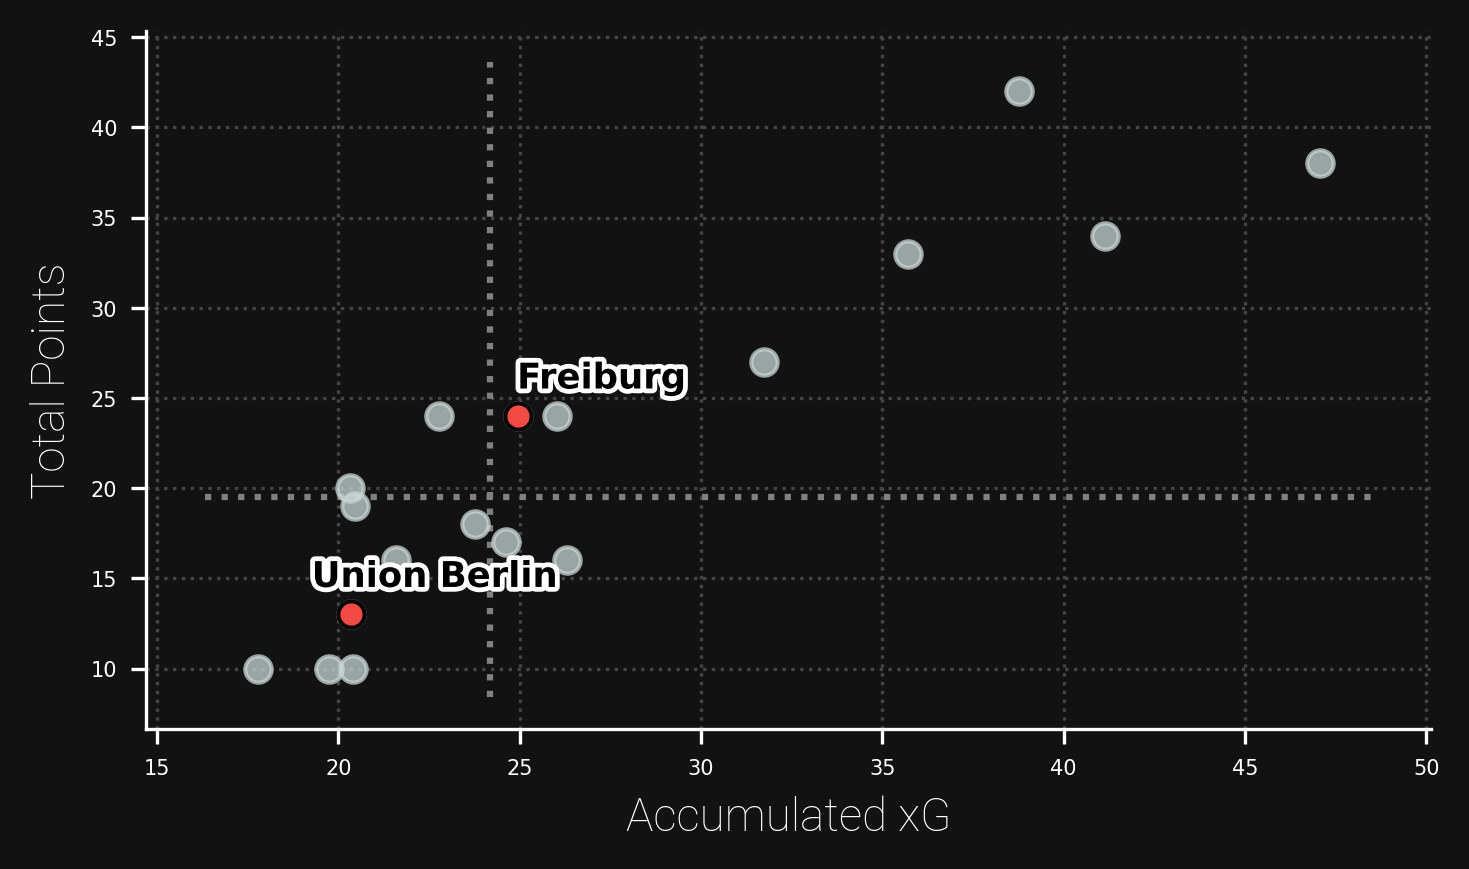

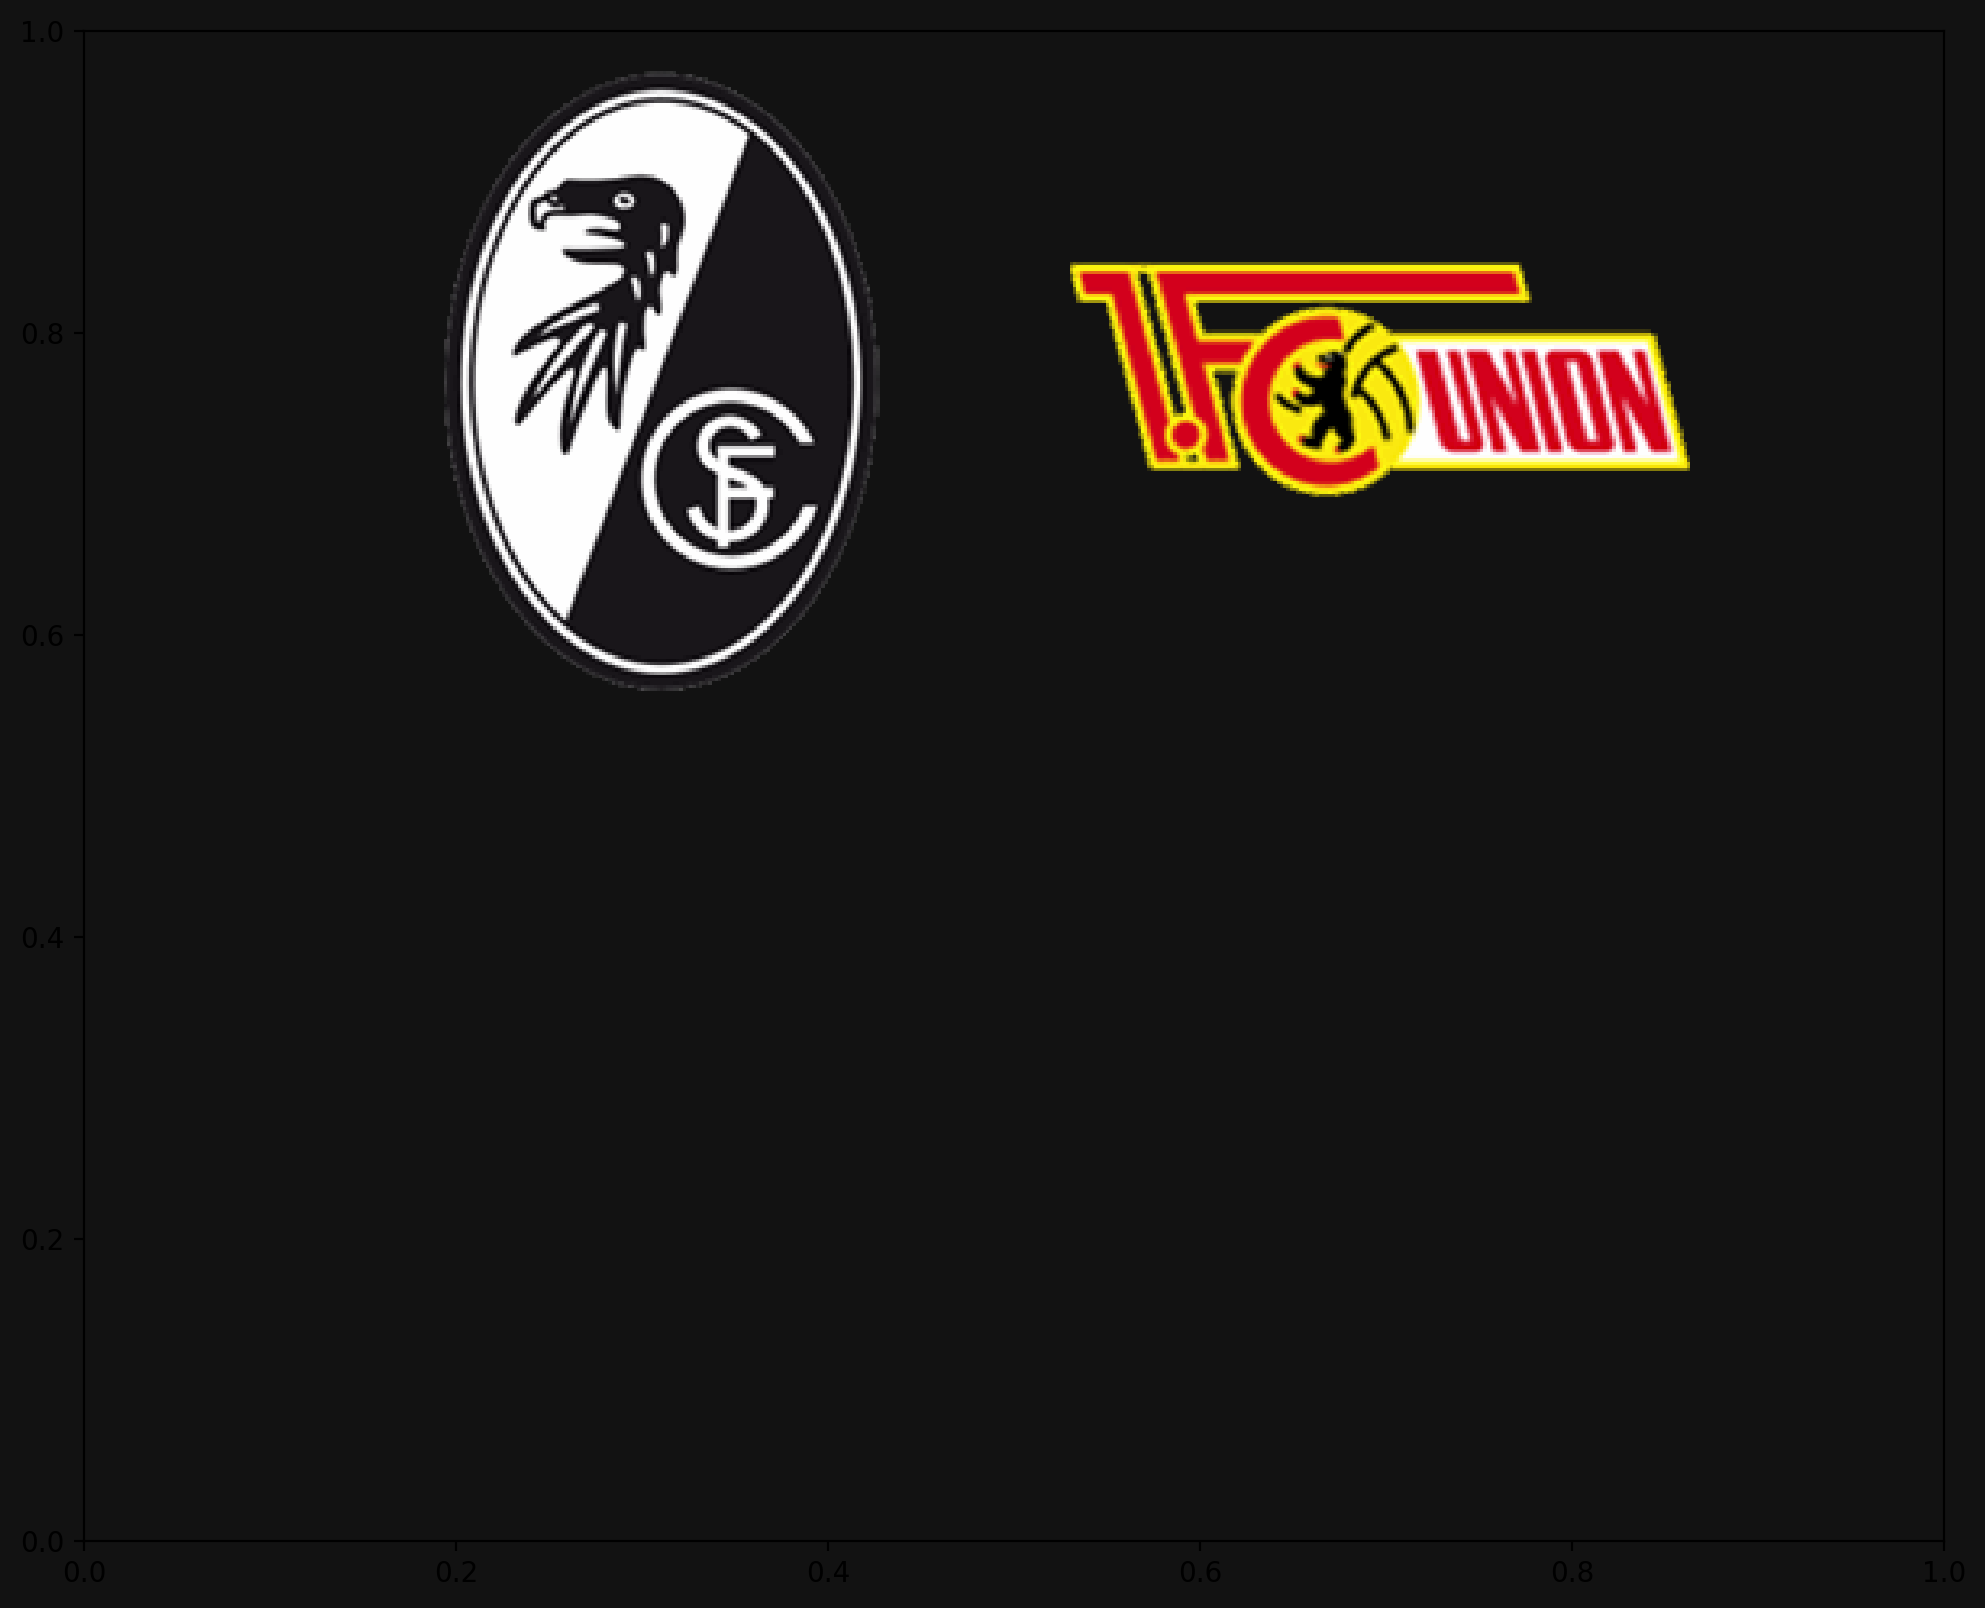

[4.0, 17.0, 20.36, 31.0, 25.89, 13.0, 17.76]
Bundesliga


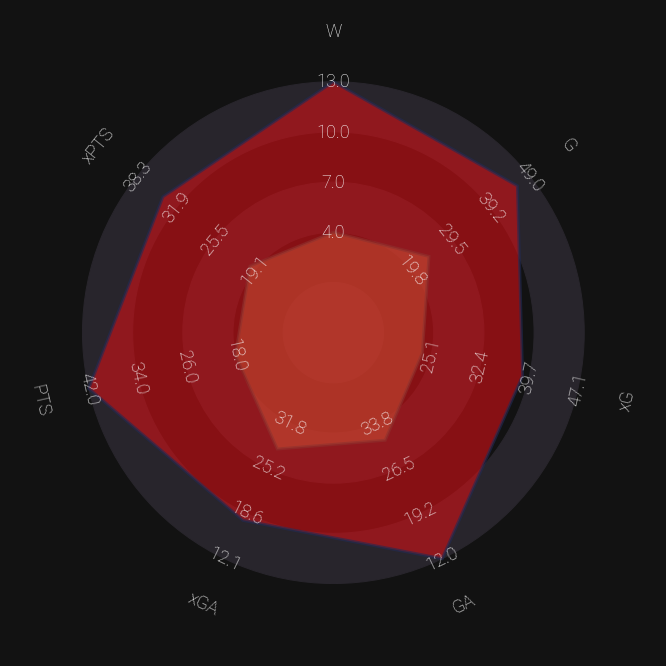

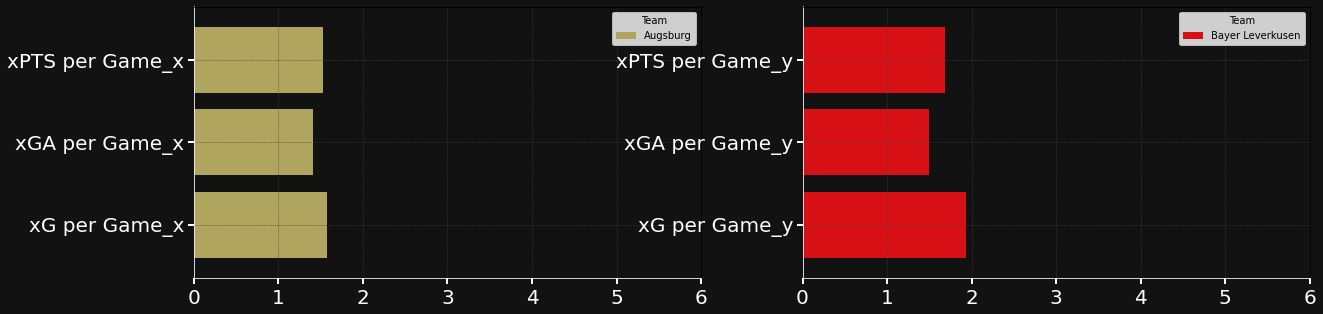

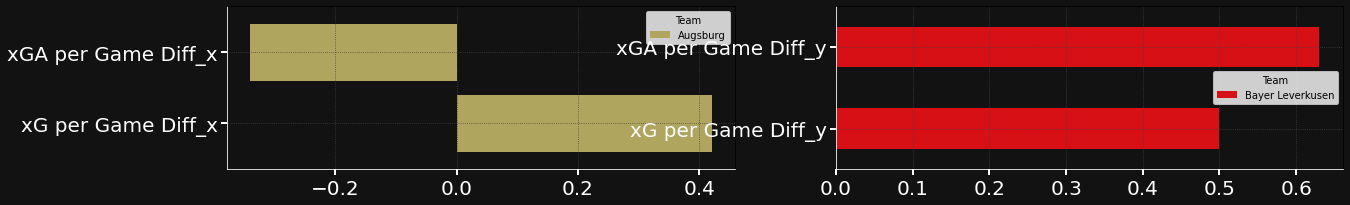

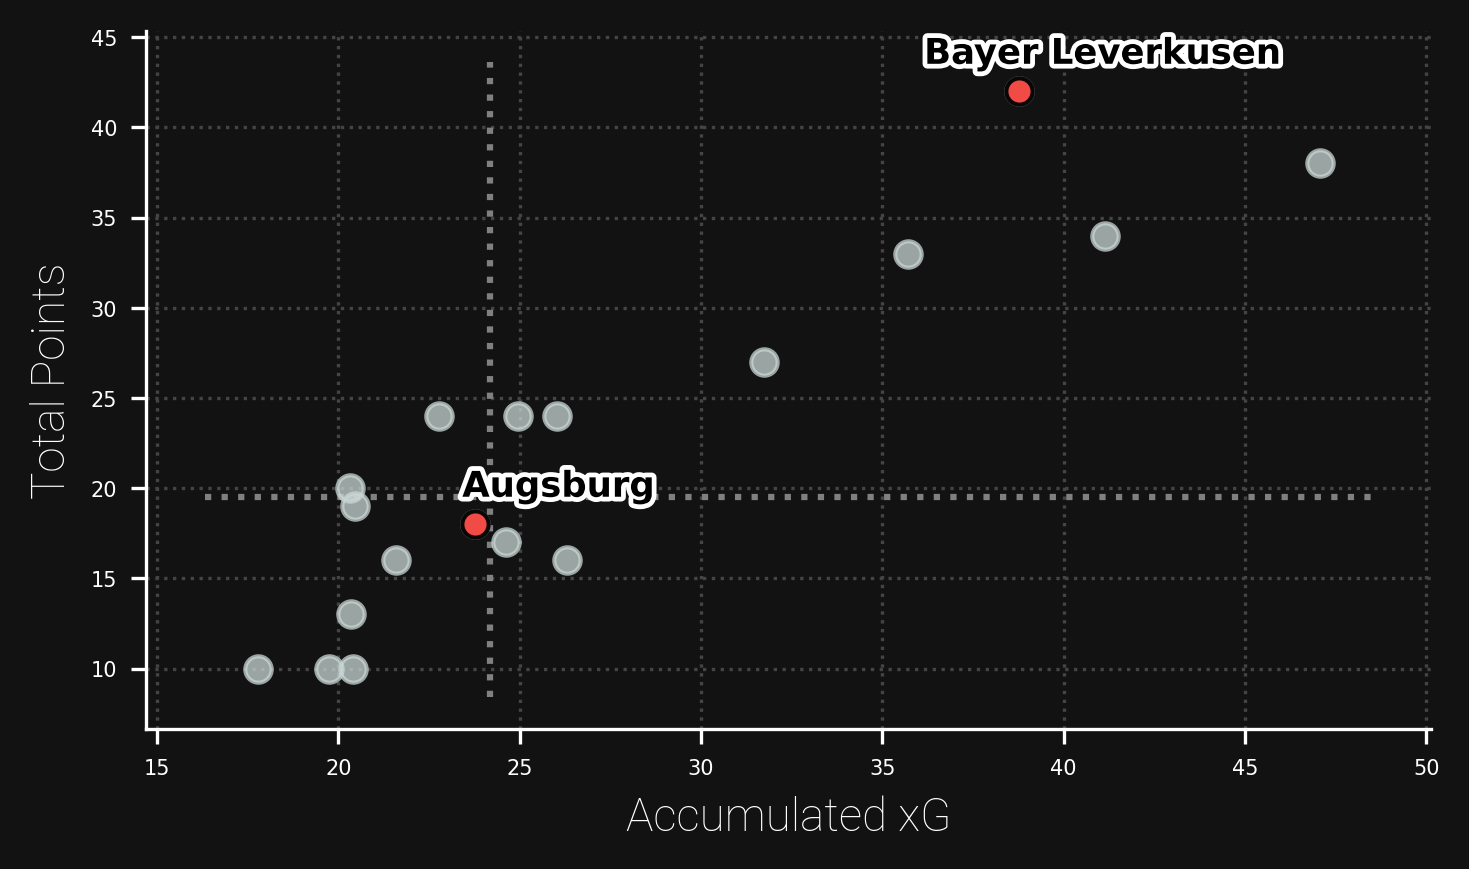

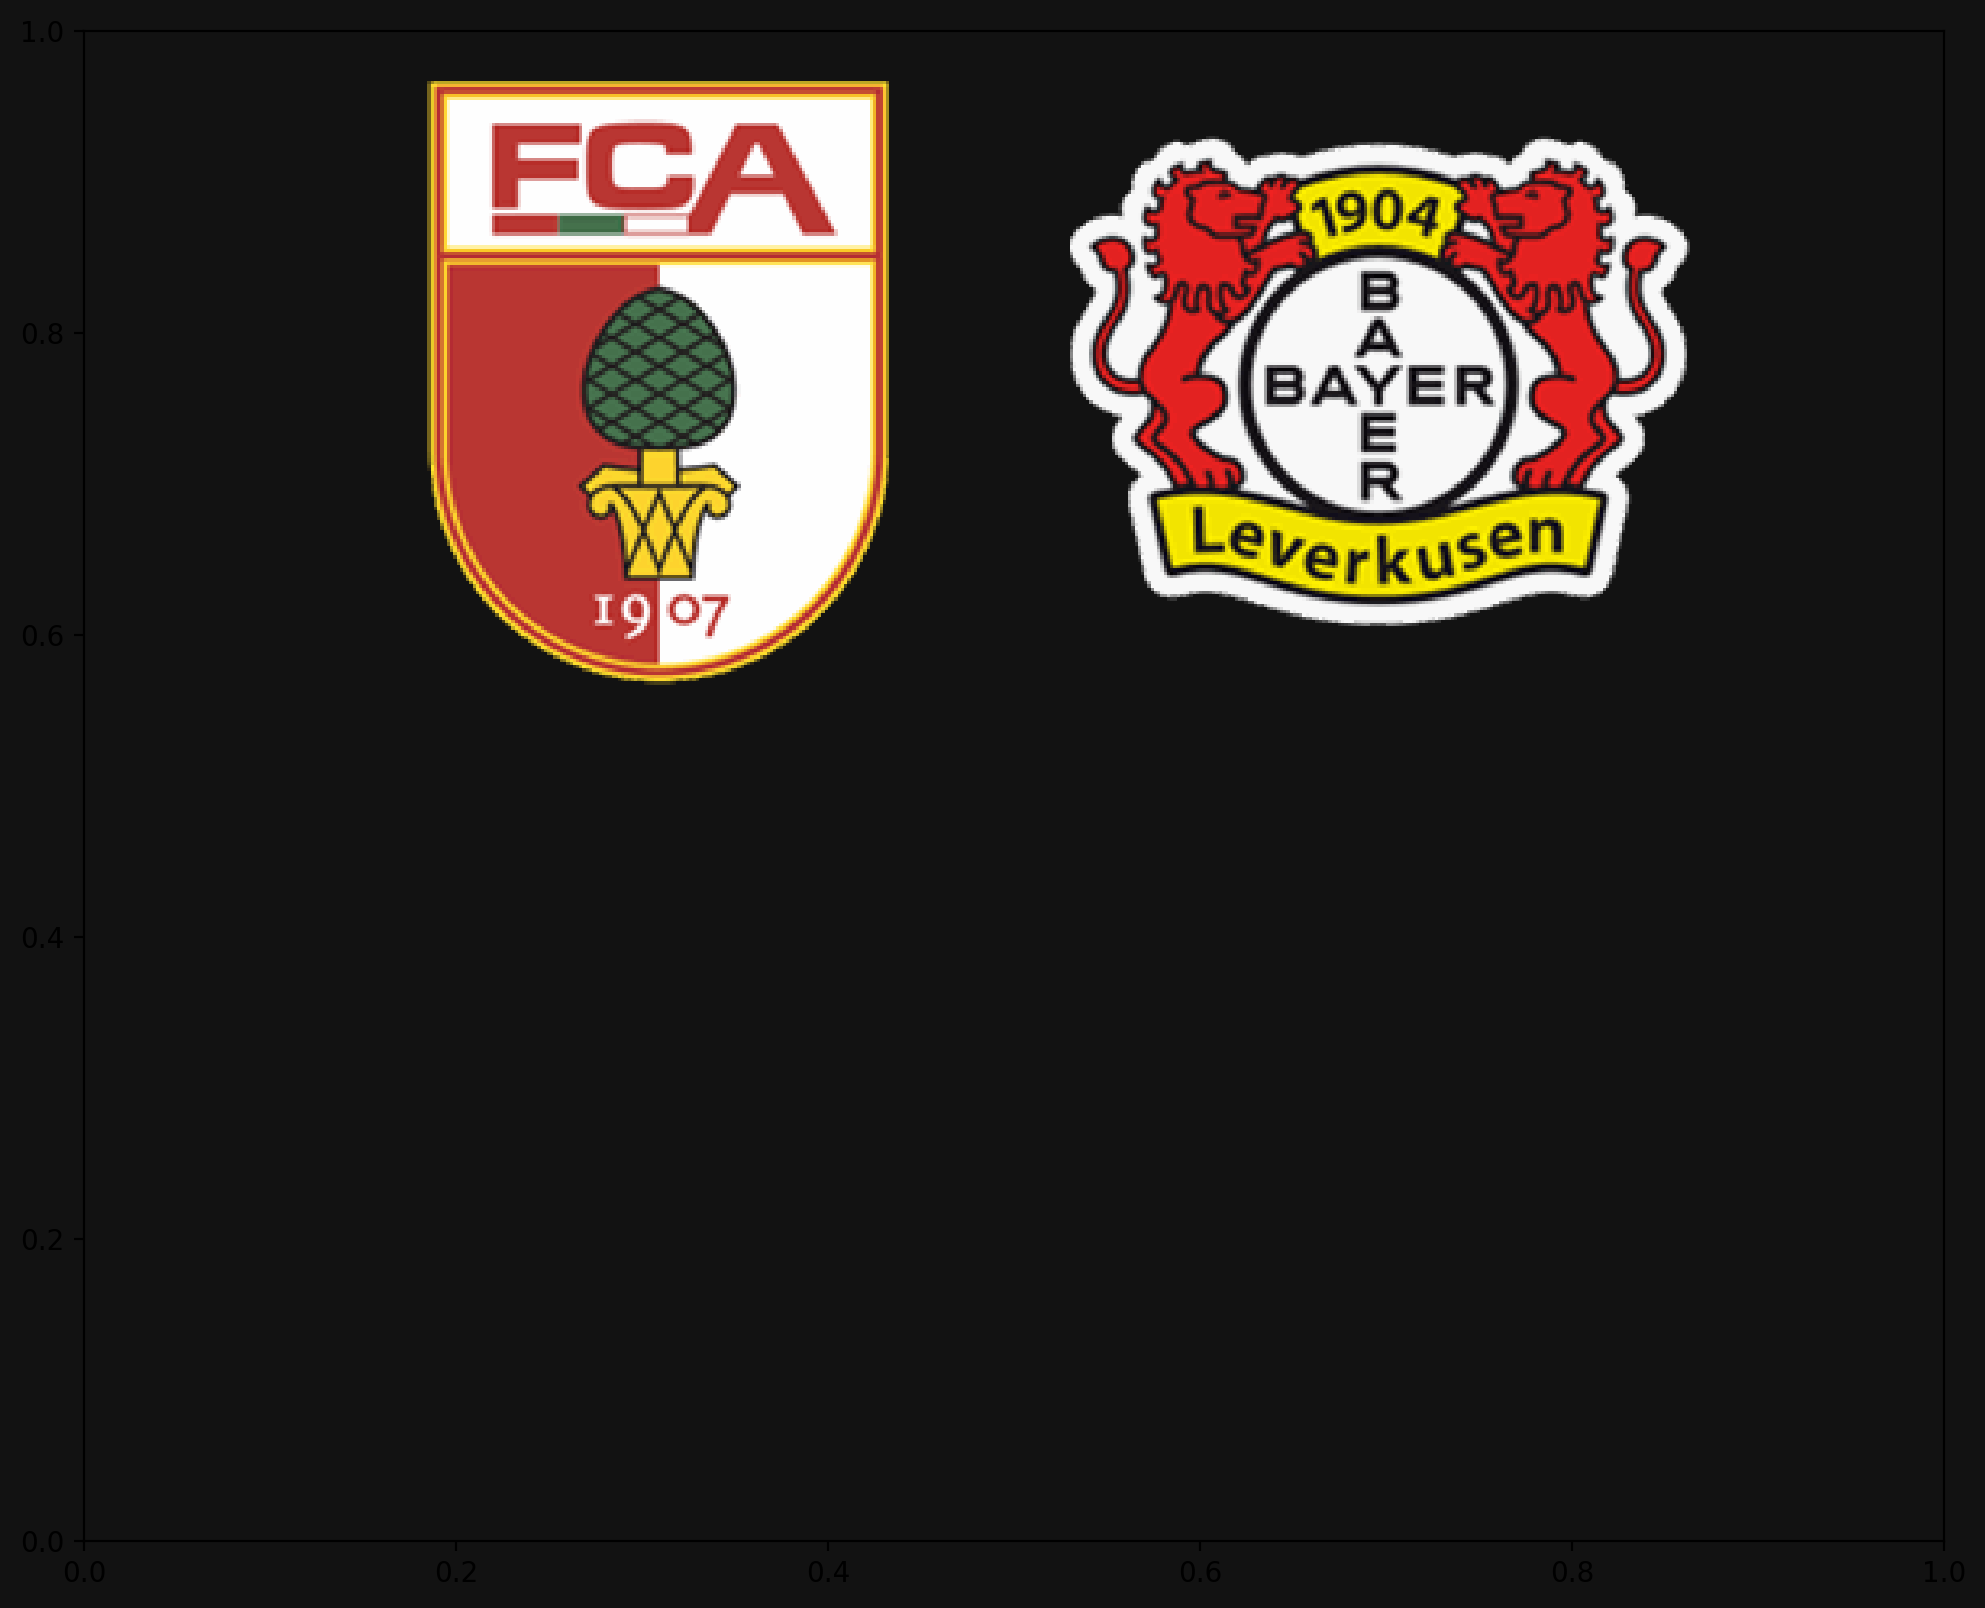

[13.0, 46.0, 38.77, 12.0, 17.63, 42.0, 34.11]
Bundesliga


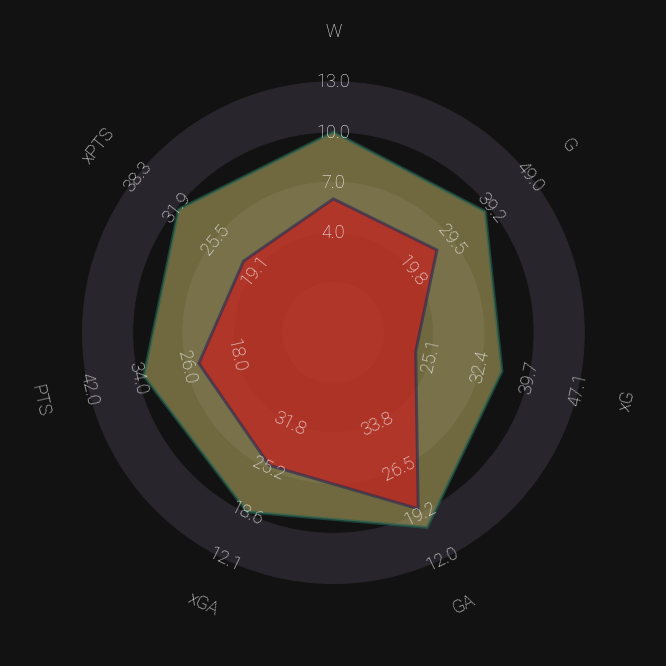

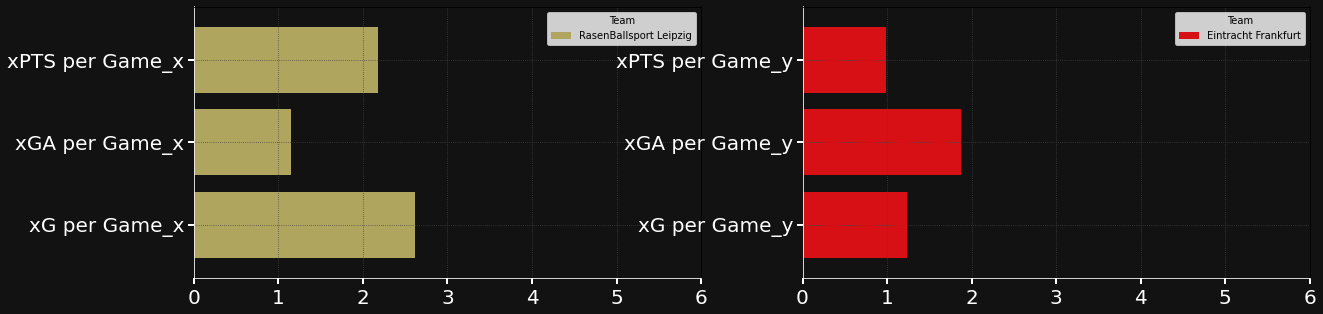

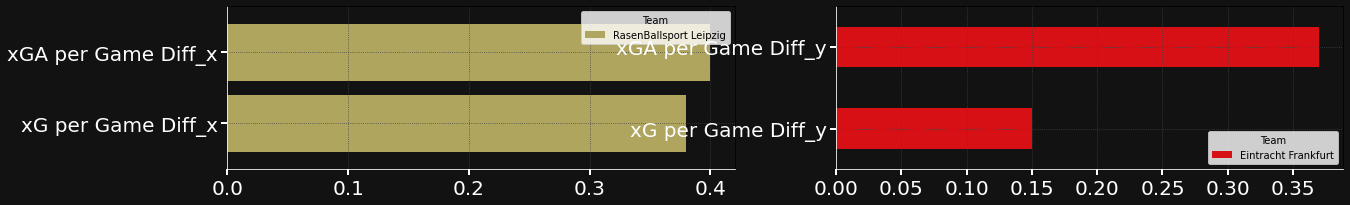

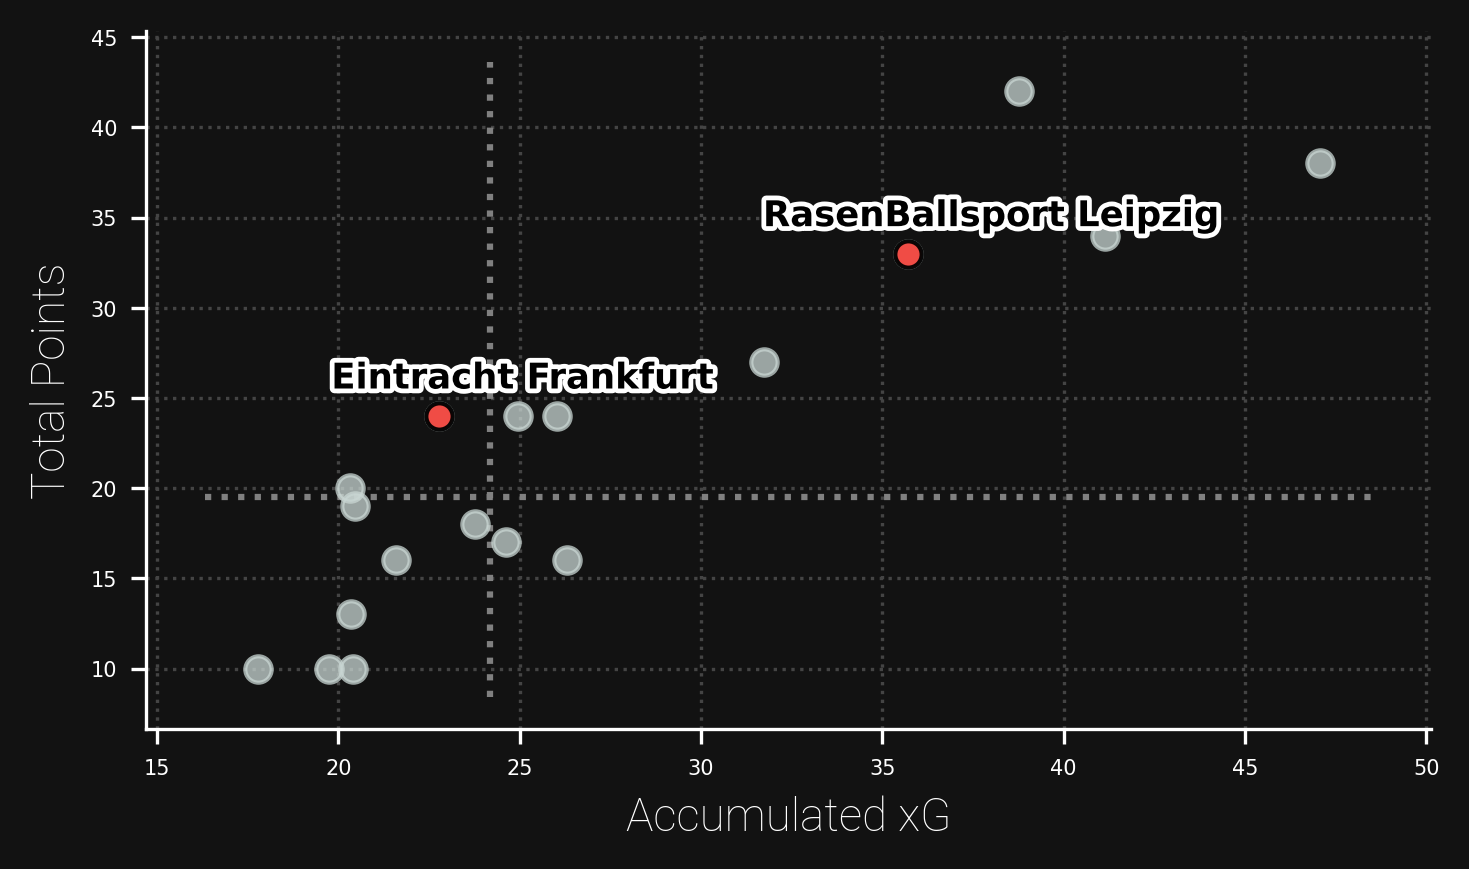

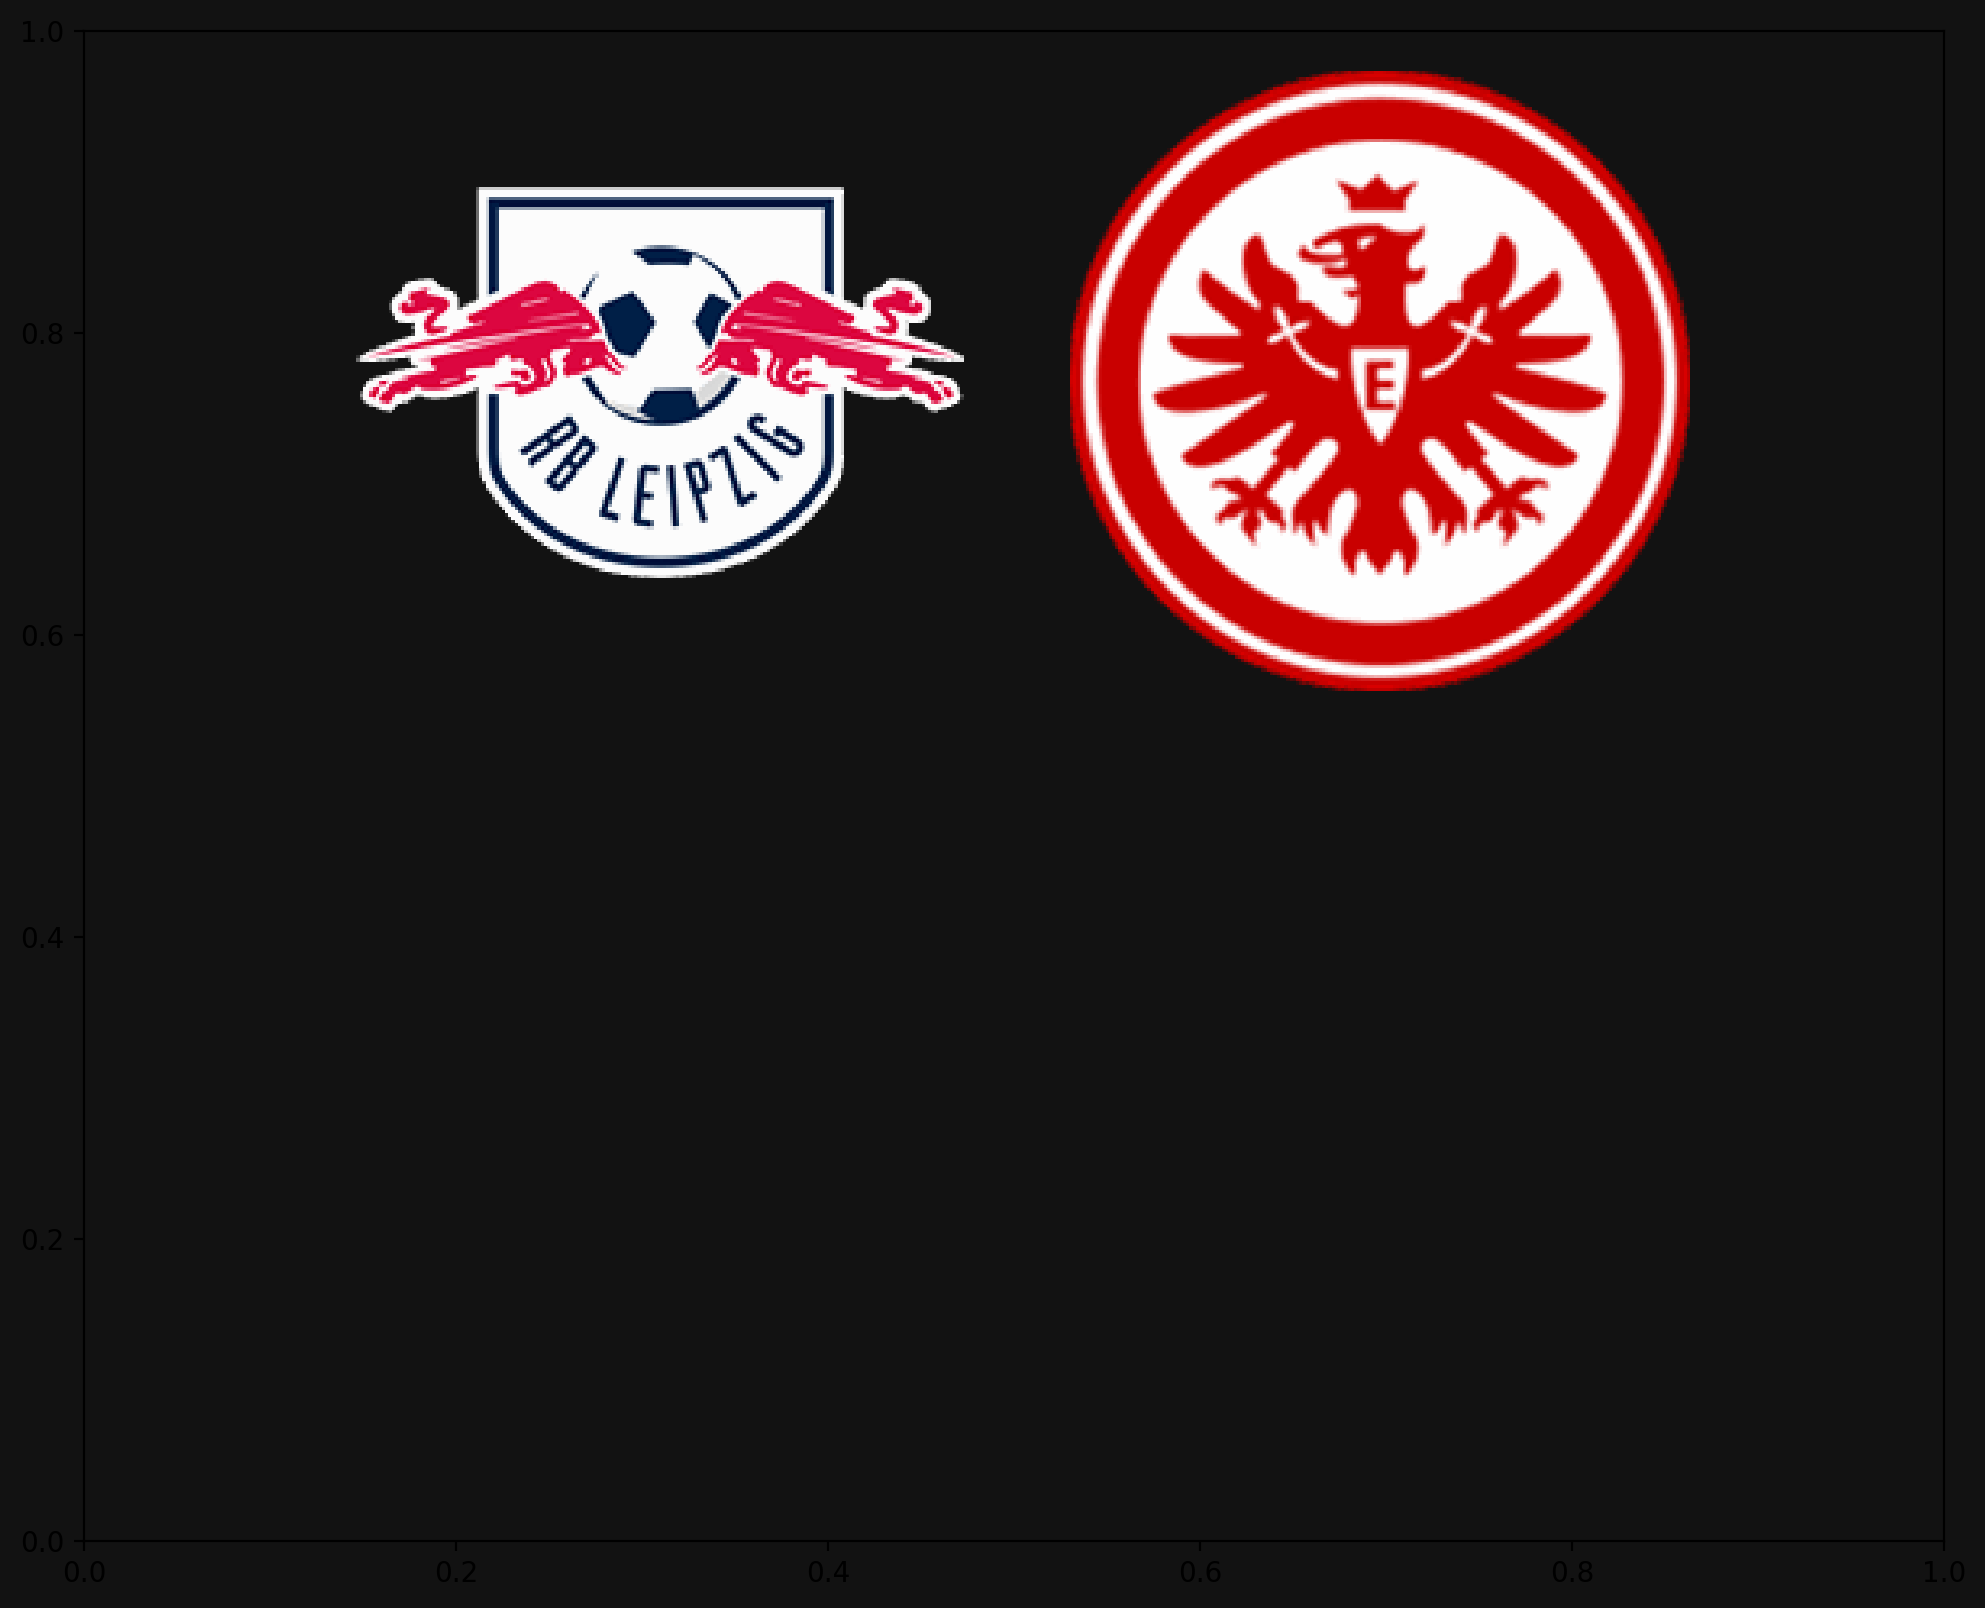

[6.0, 26.0, 22.78, 20.0, 25.61, 24.0, 20.98]
Bundesliga


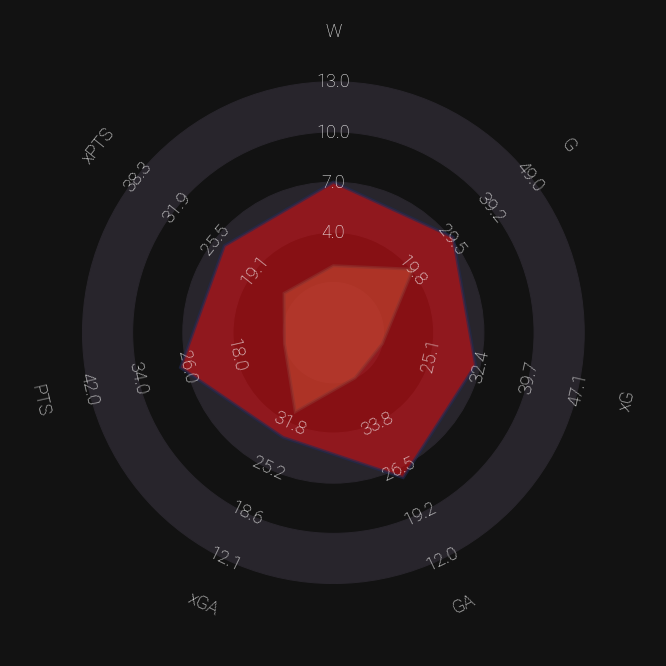

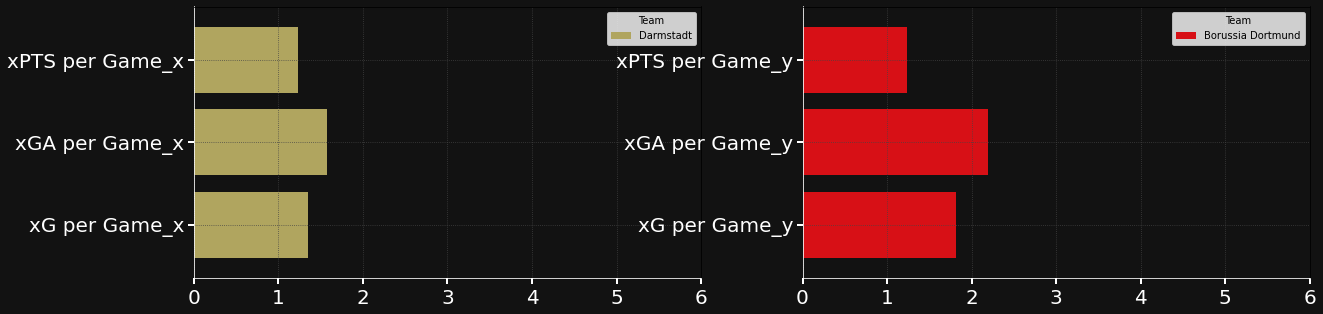

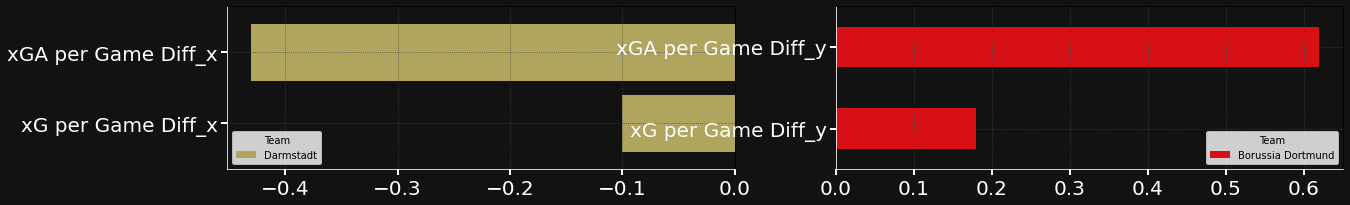

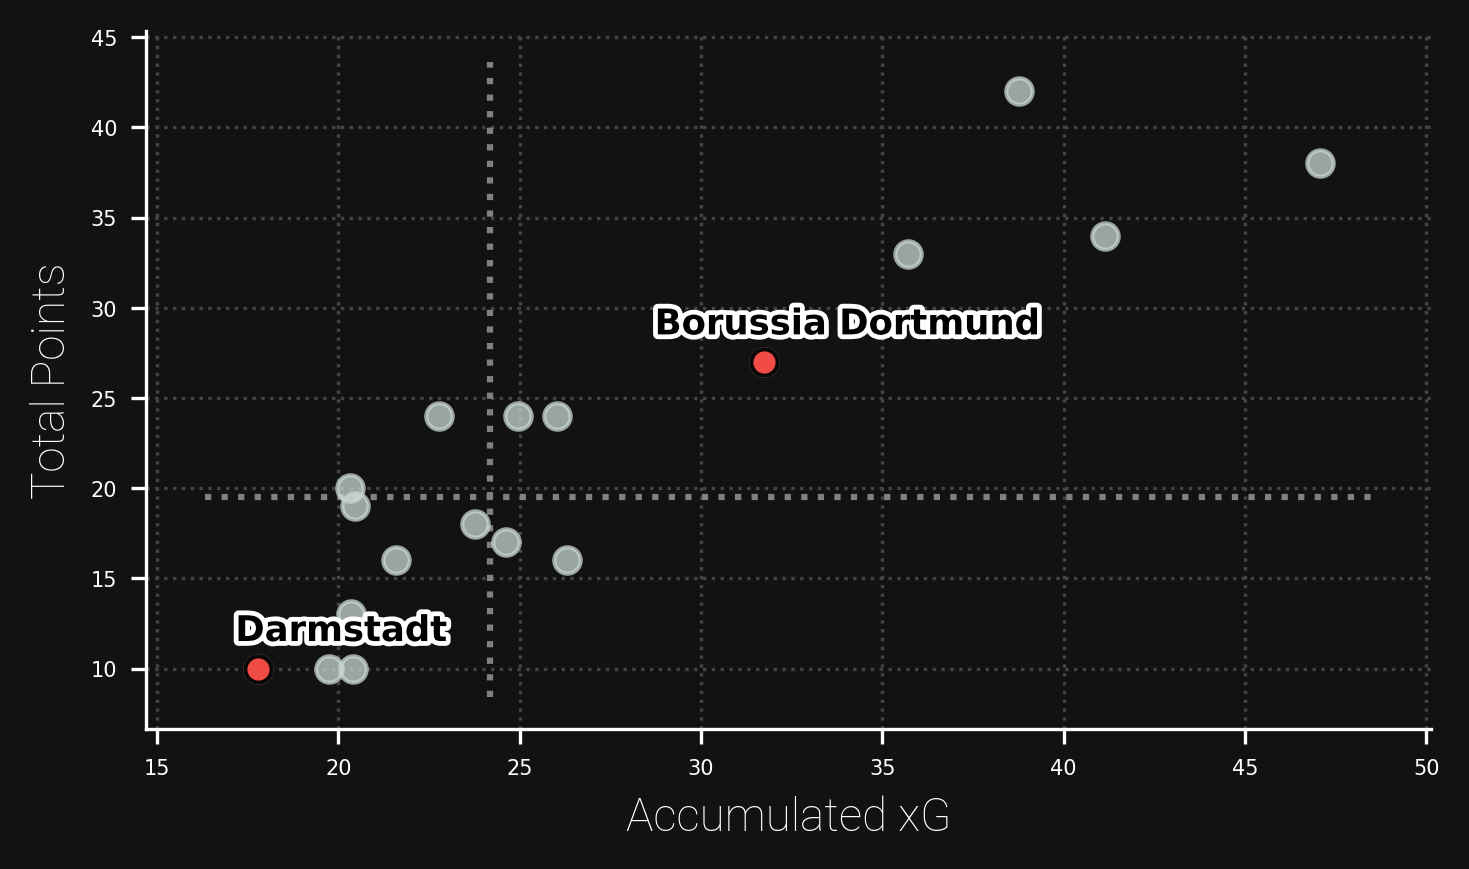

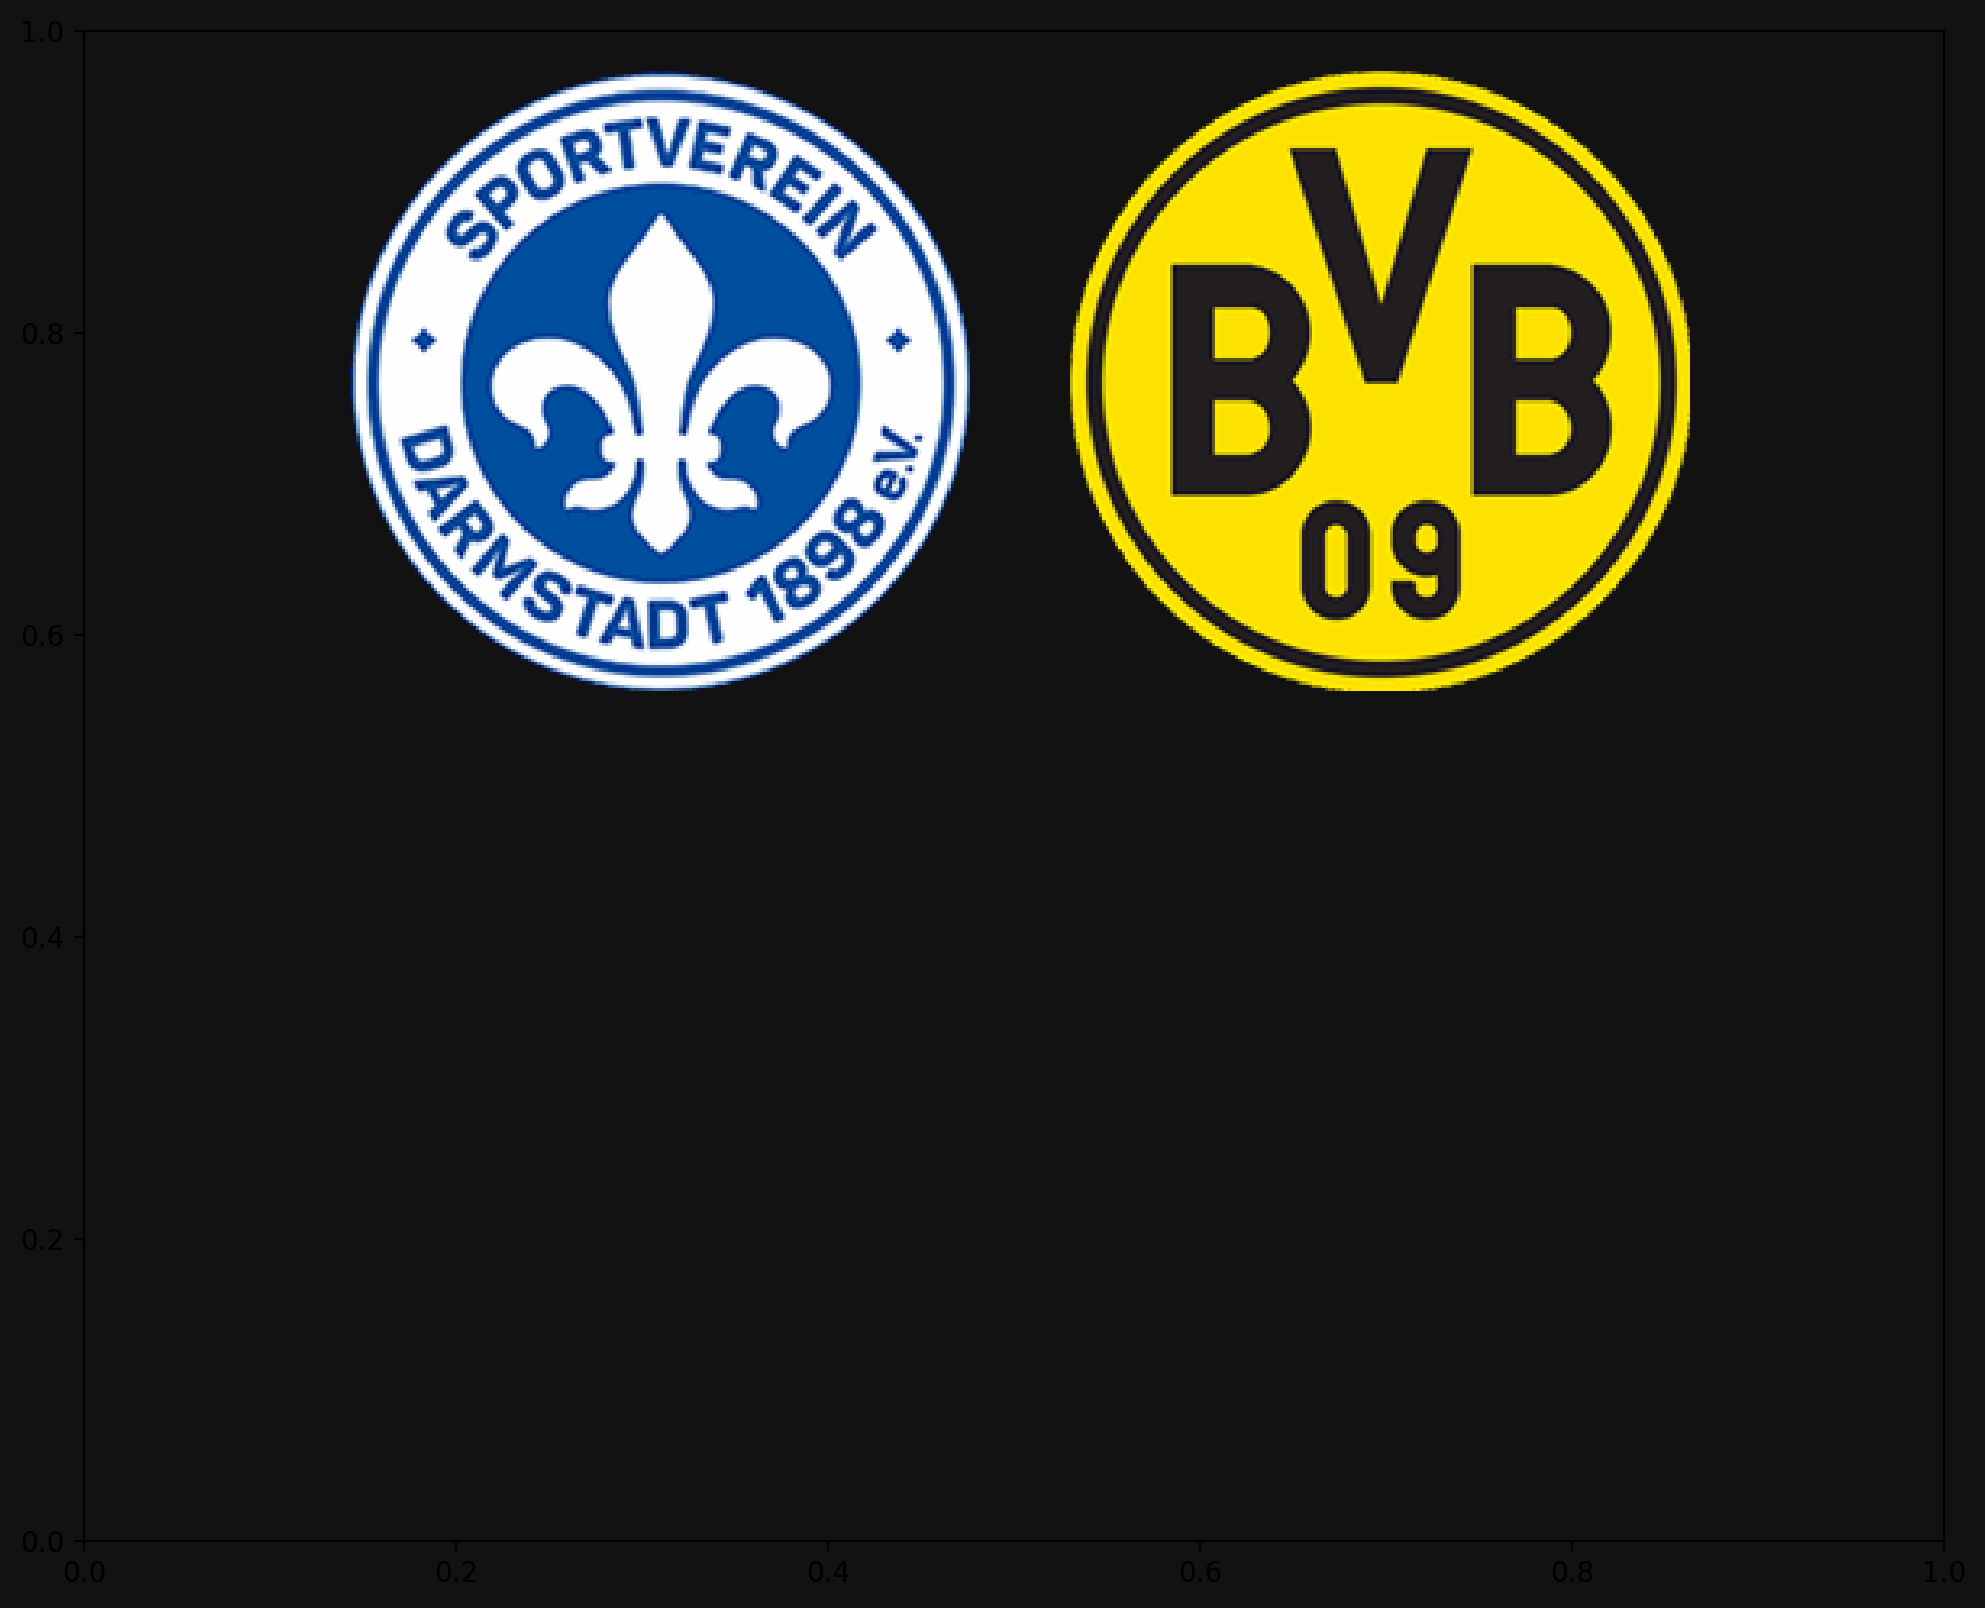

[7.0, 30.0, 31.73, 25.0, 29.69, 27.0, 24.11]
EPL


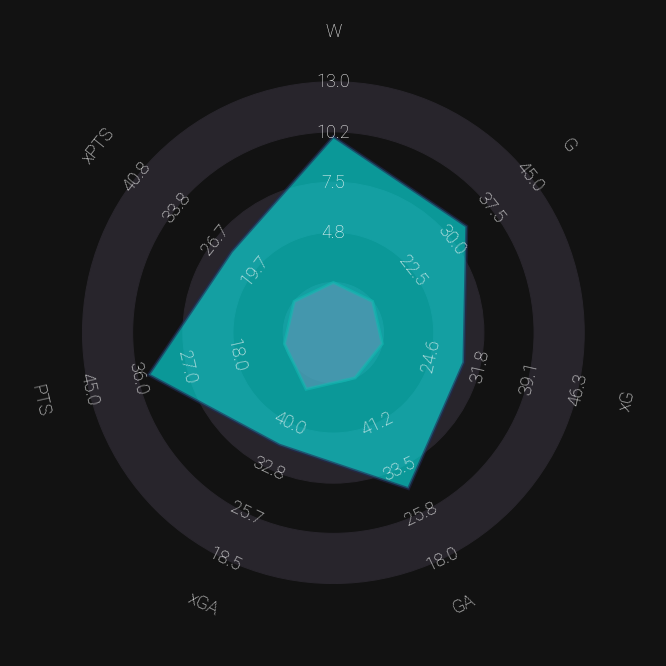

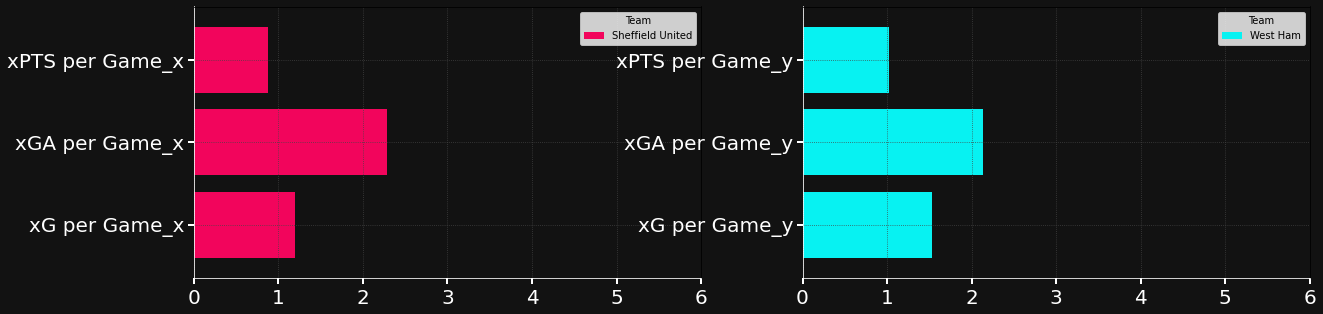

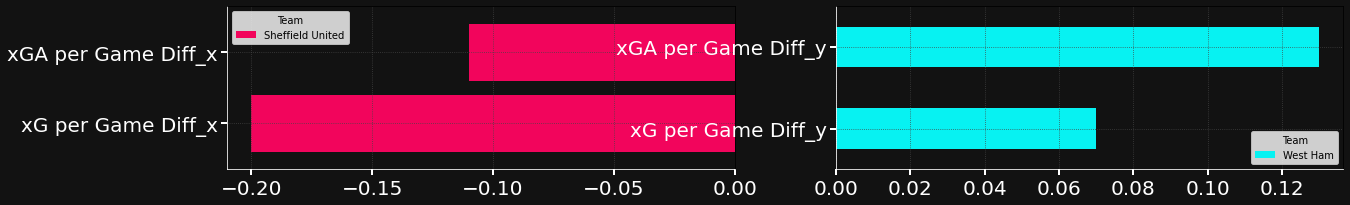

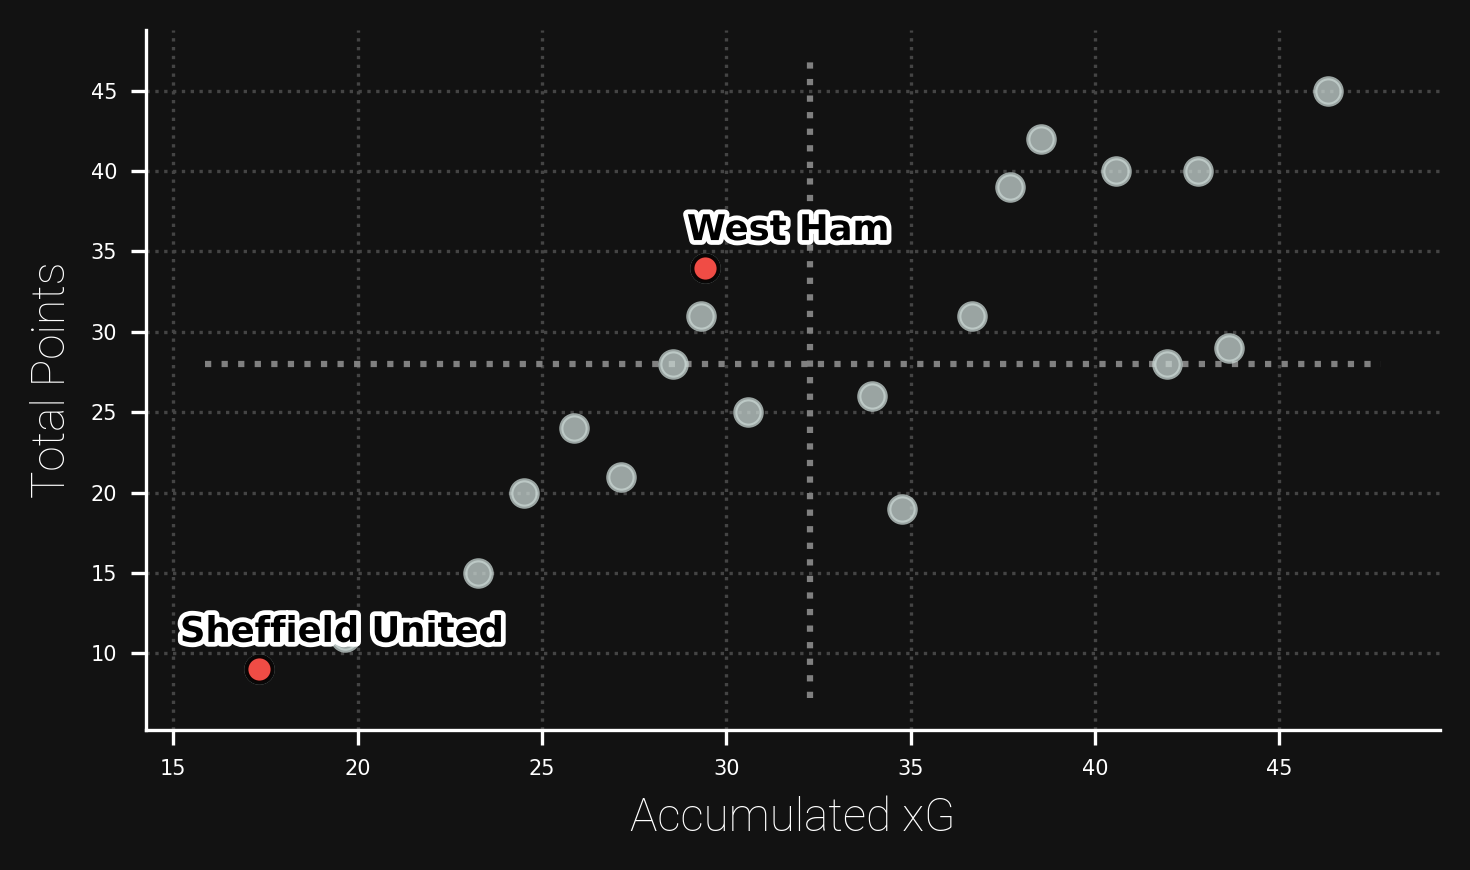

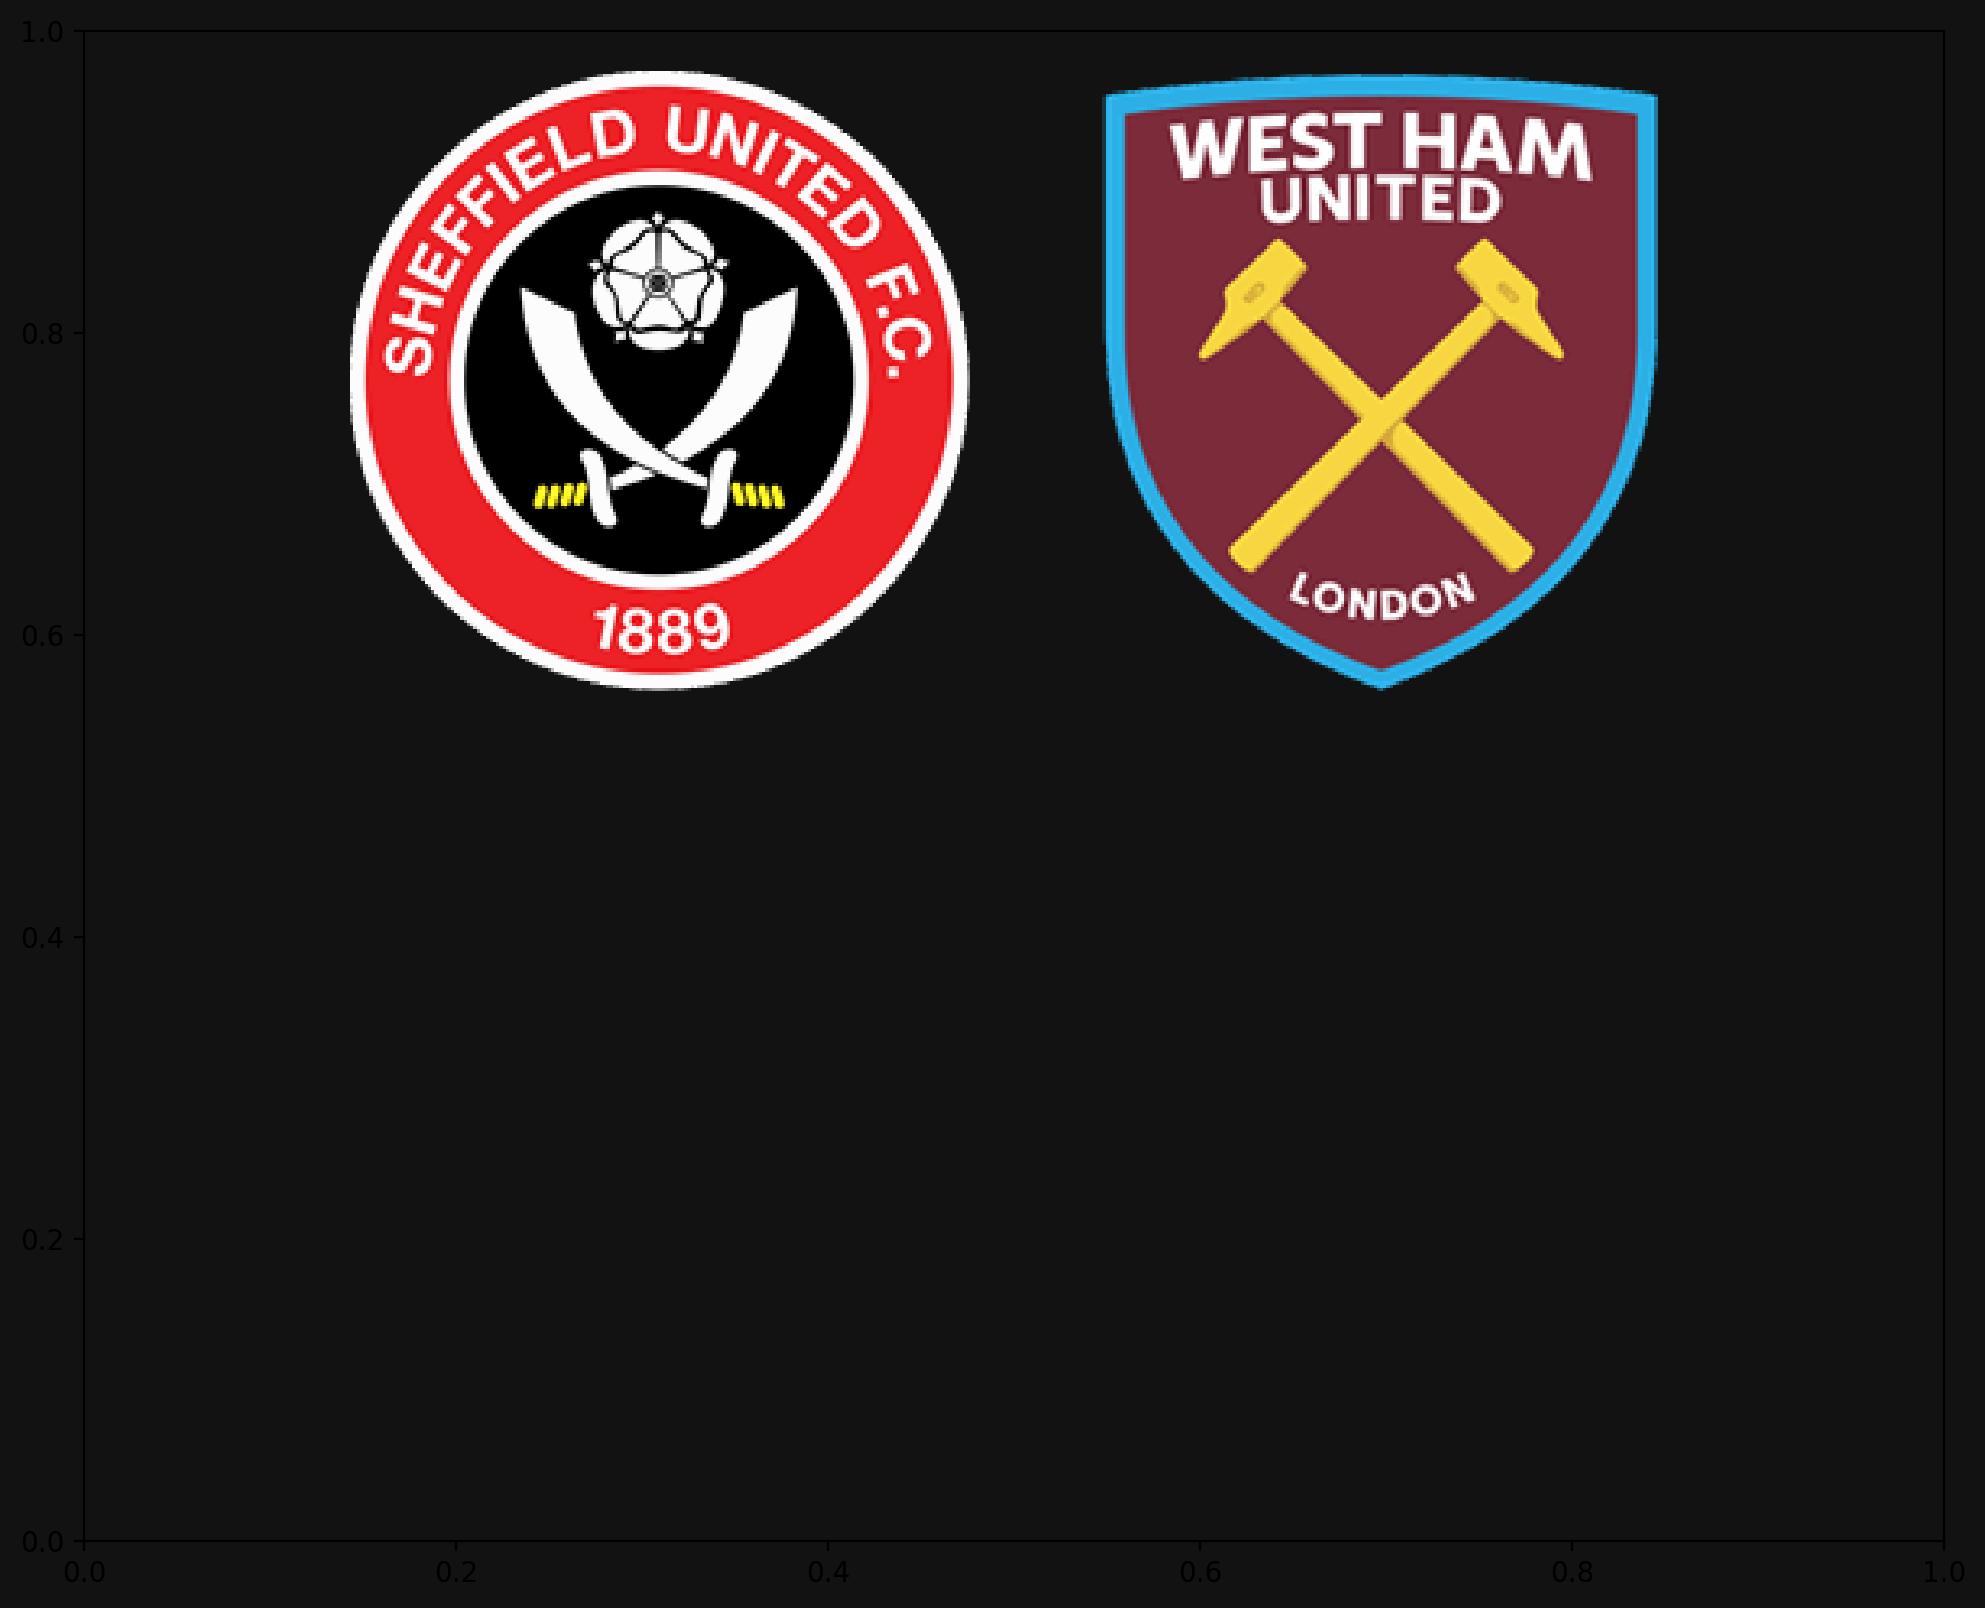

[10.0, 33.0, 29.41, 30.0, 36.49, 34.0, 23.88]
La Liga


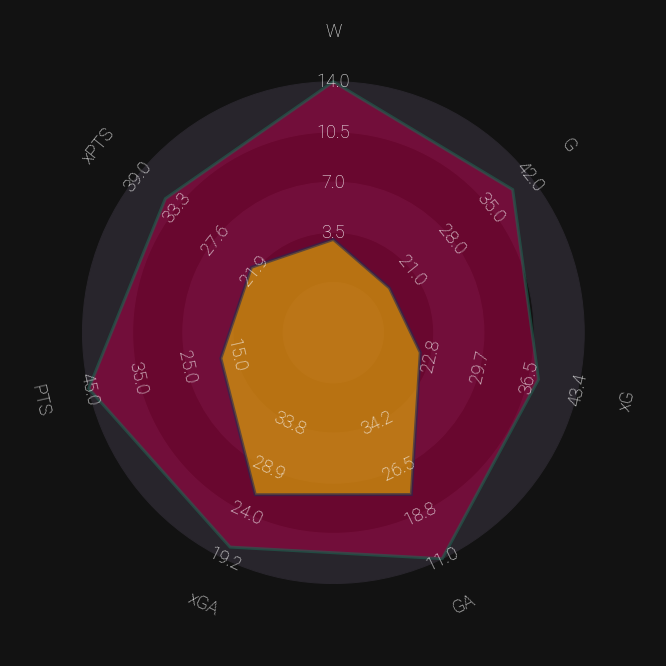

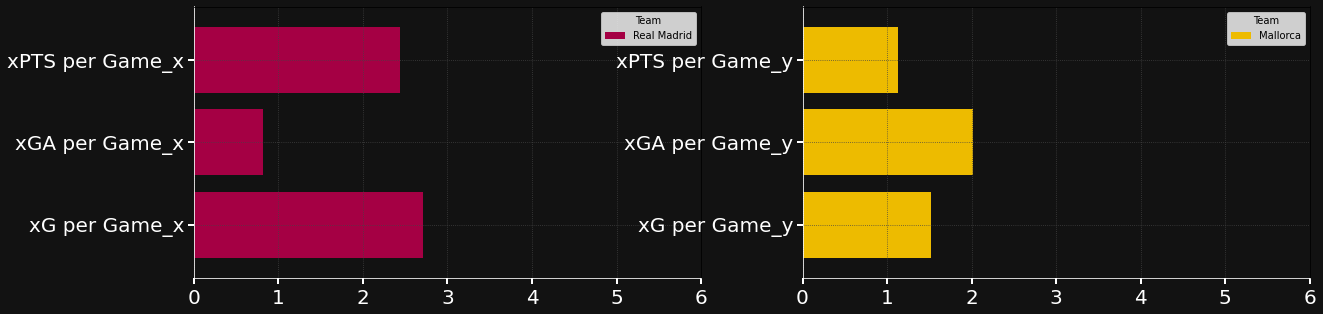

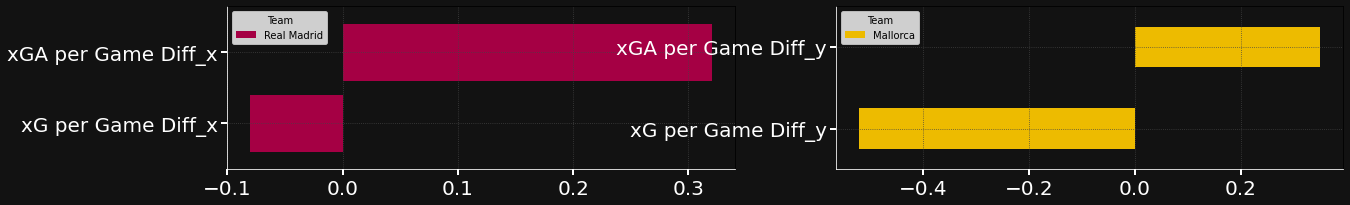

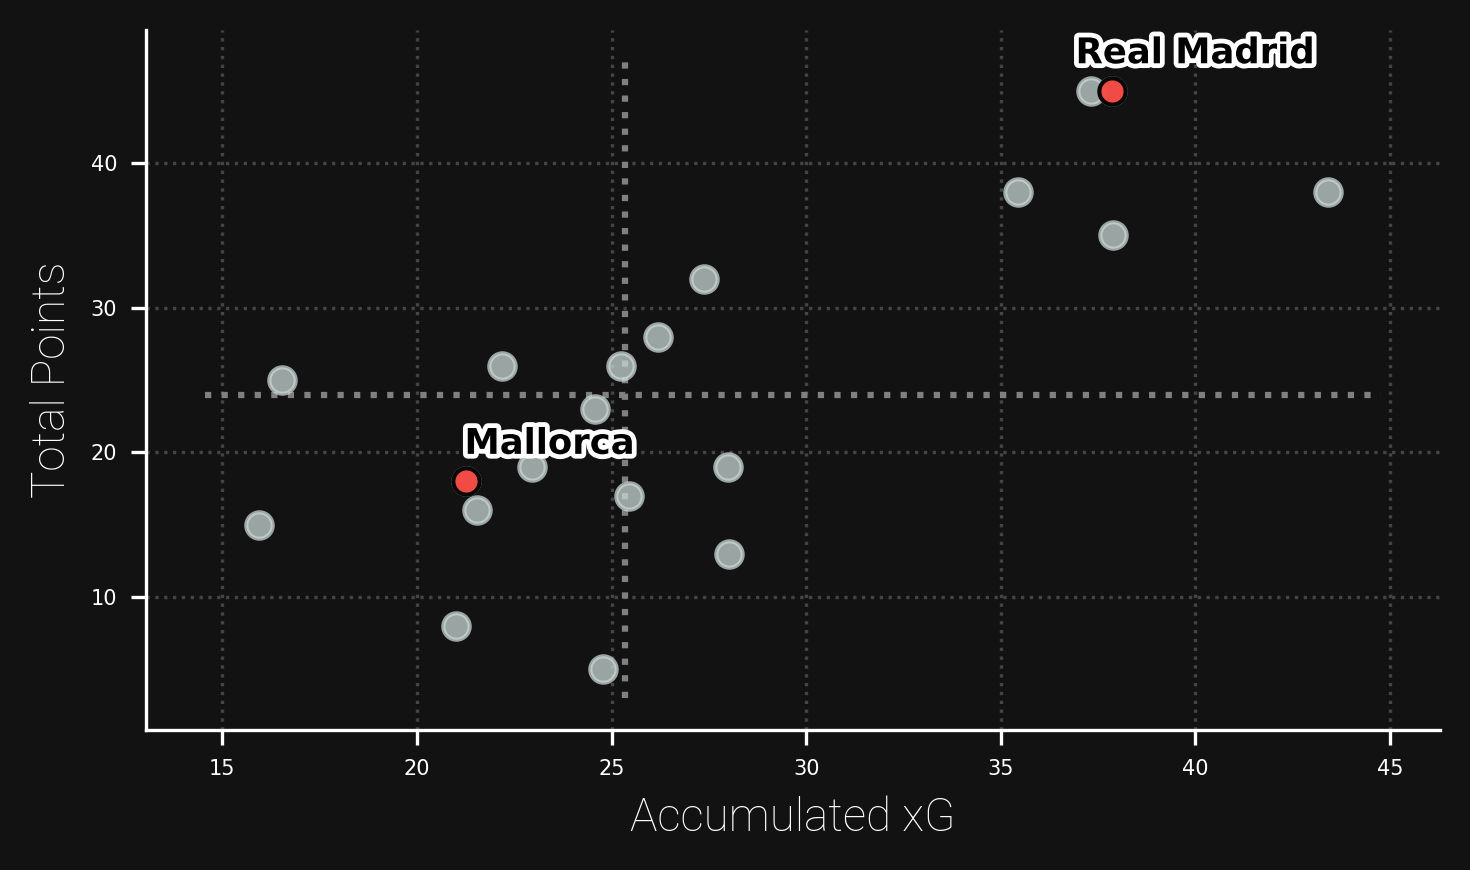

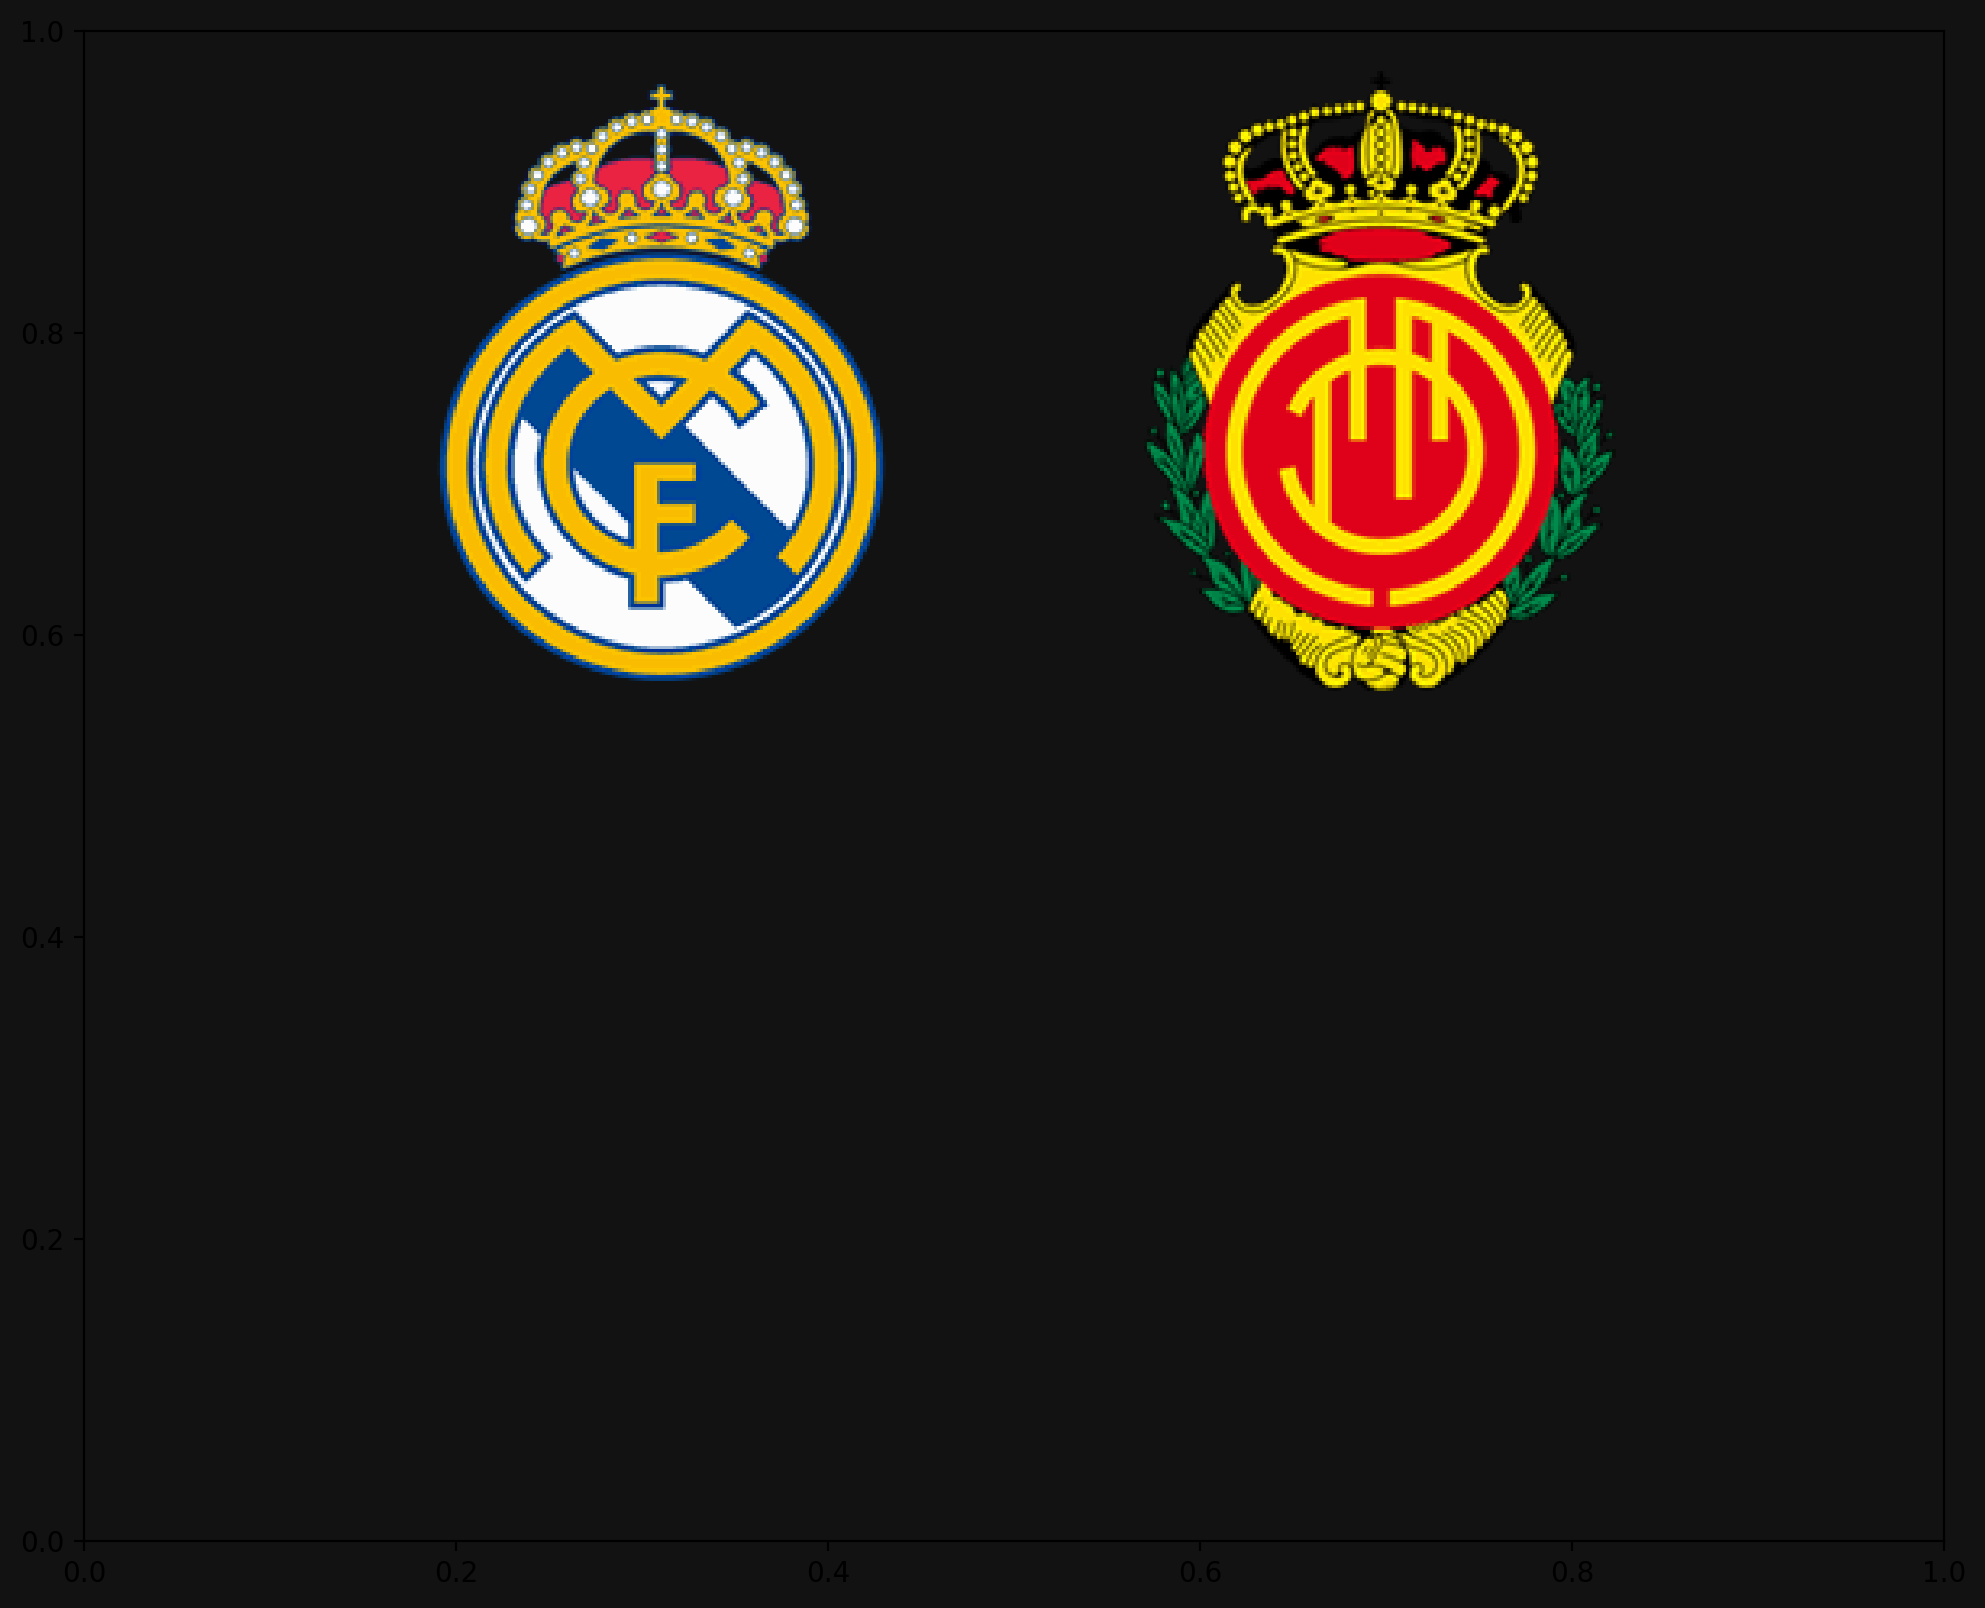

[3.0, 17.0, 21.26, 22.0, 26.06, 18.0, 22.43]
Bundesliga


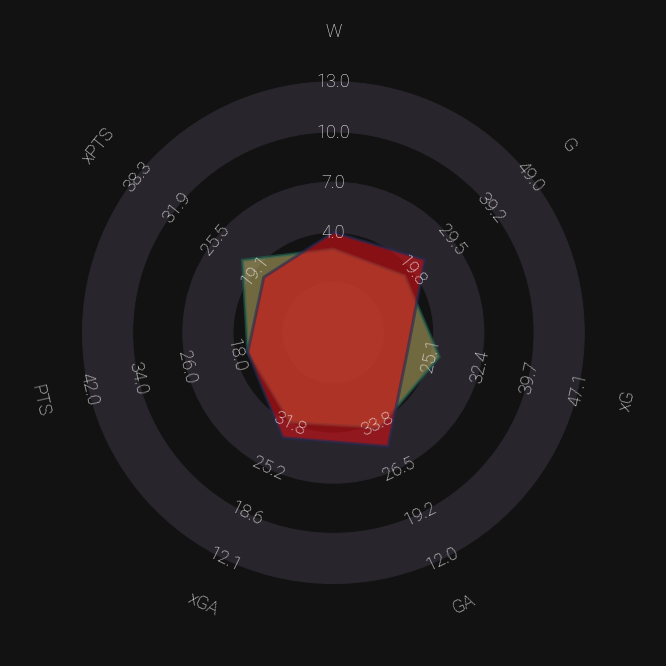

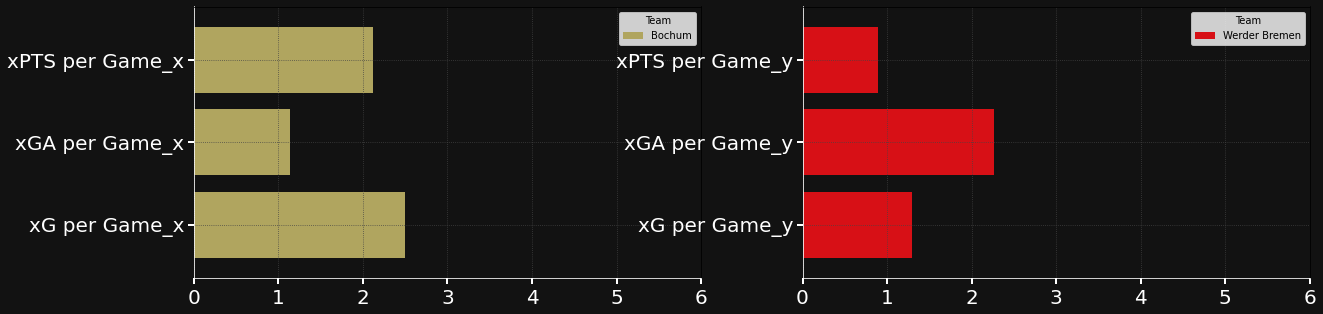

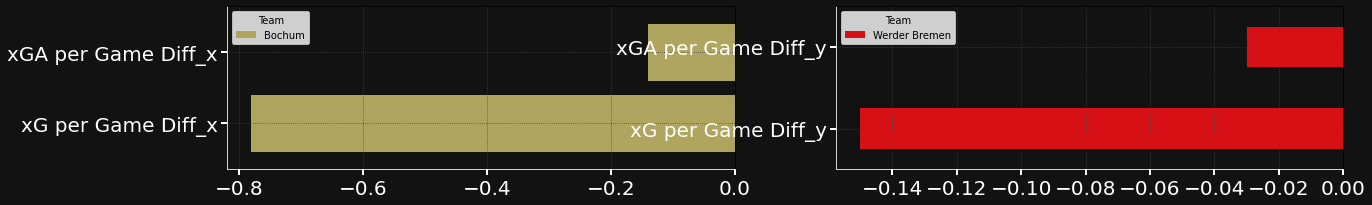

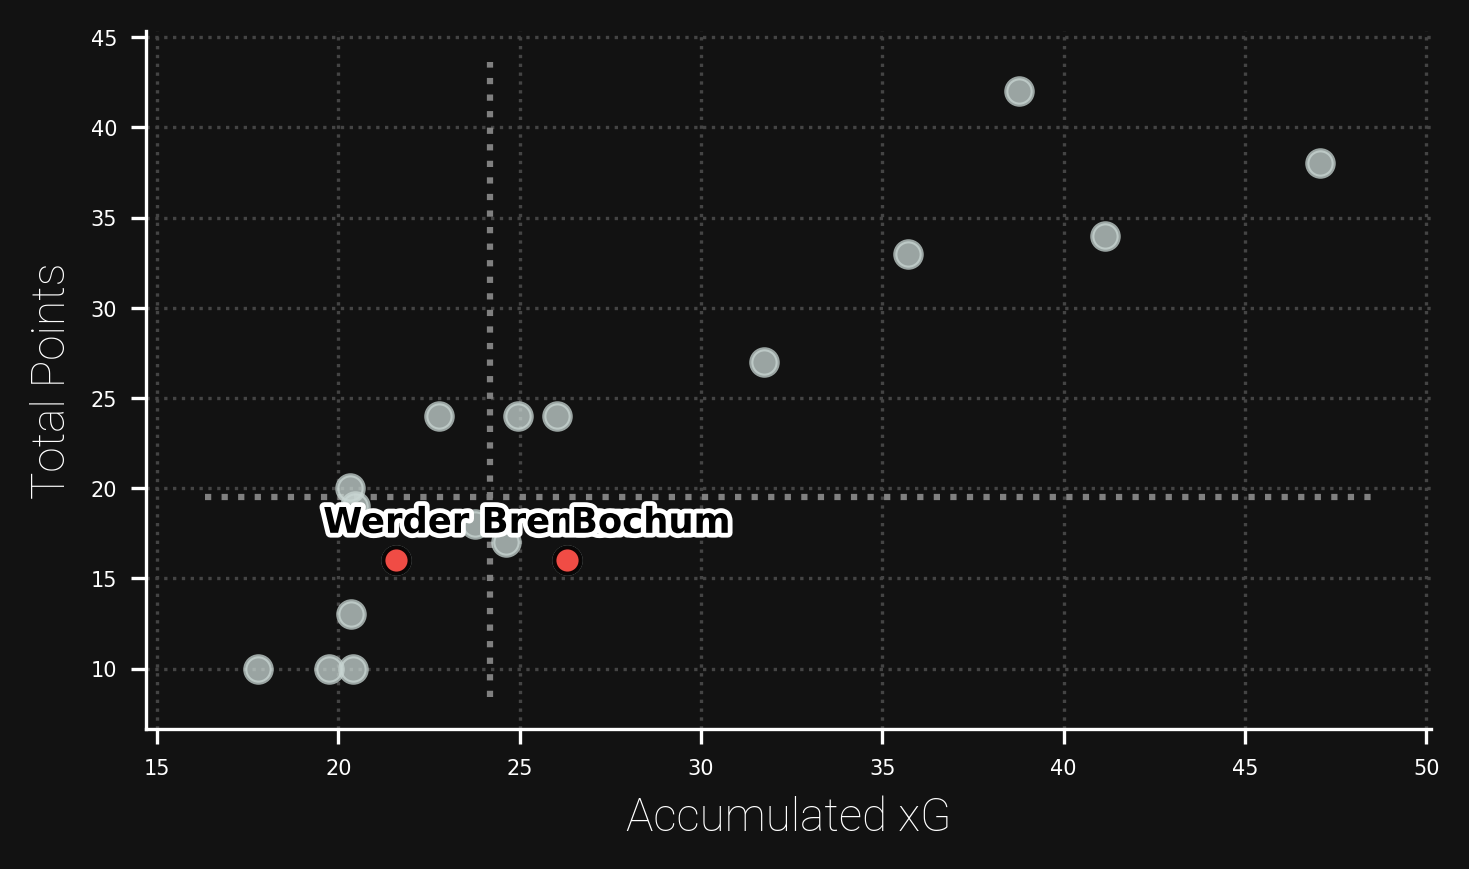

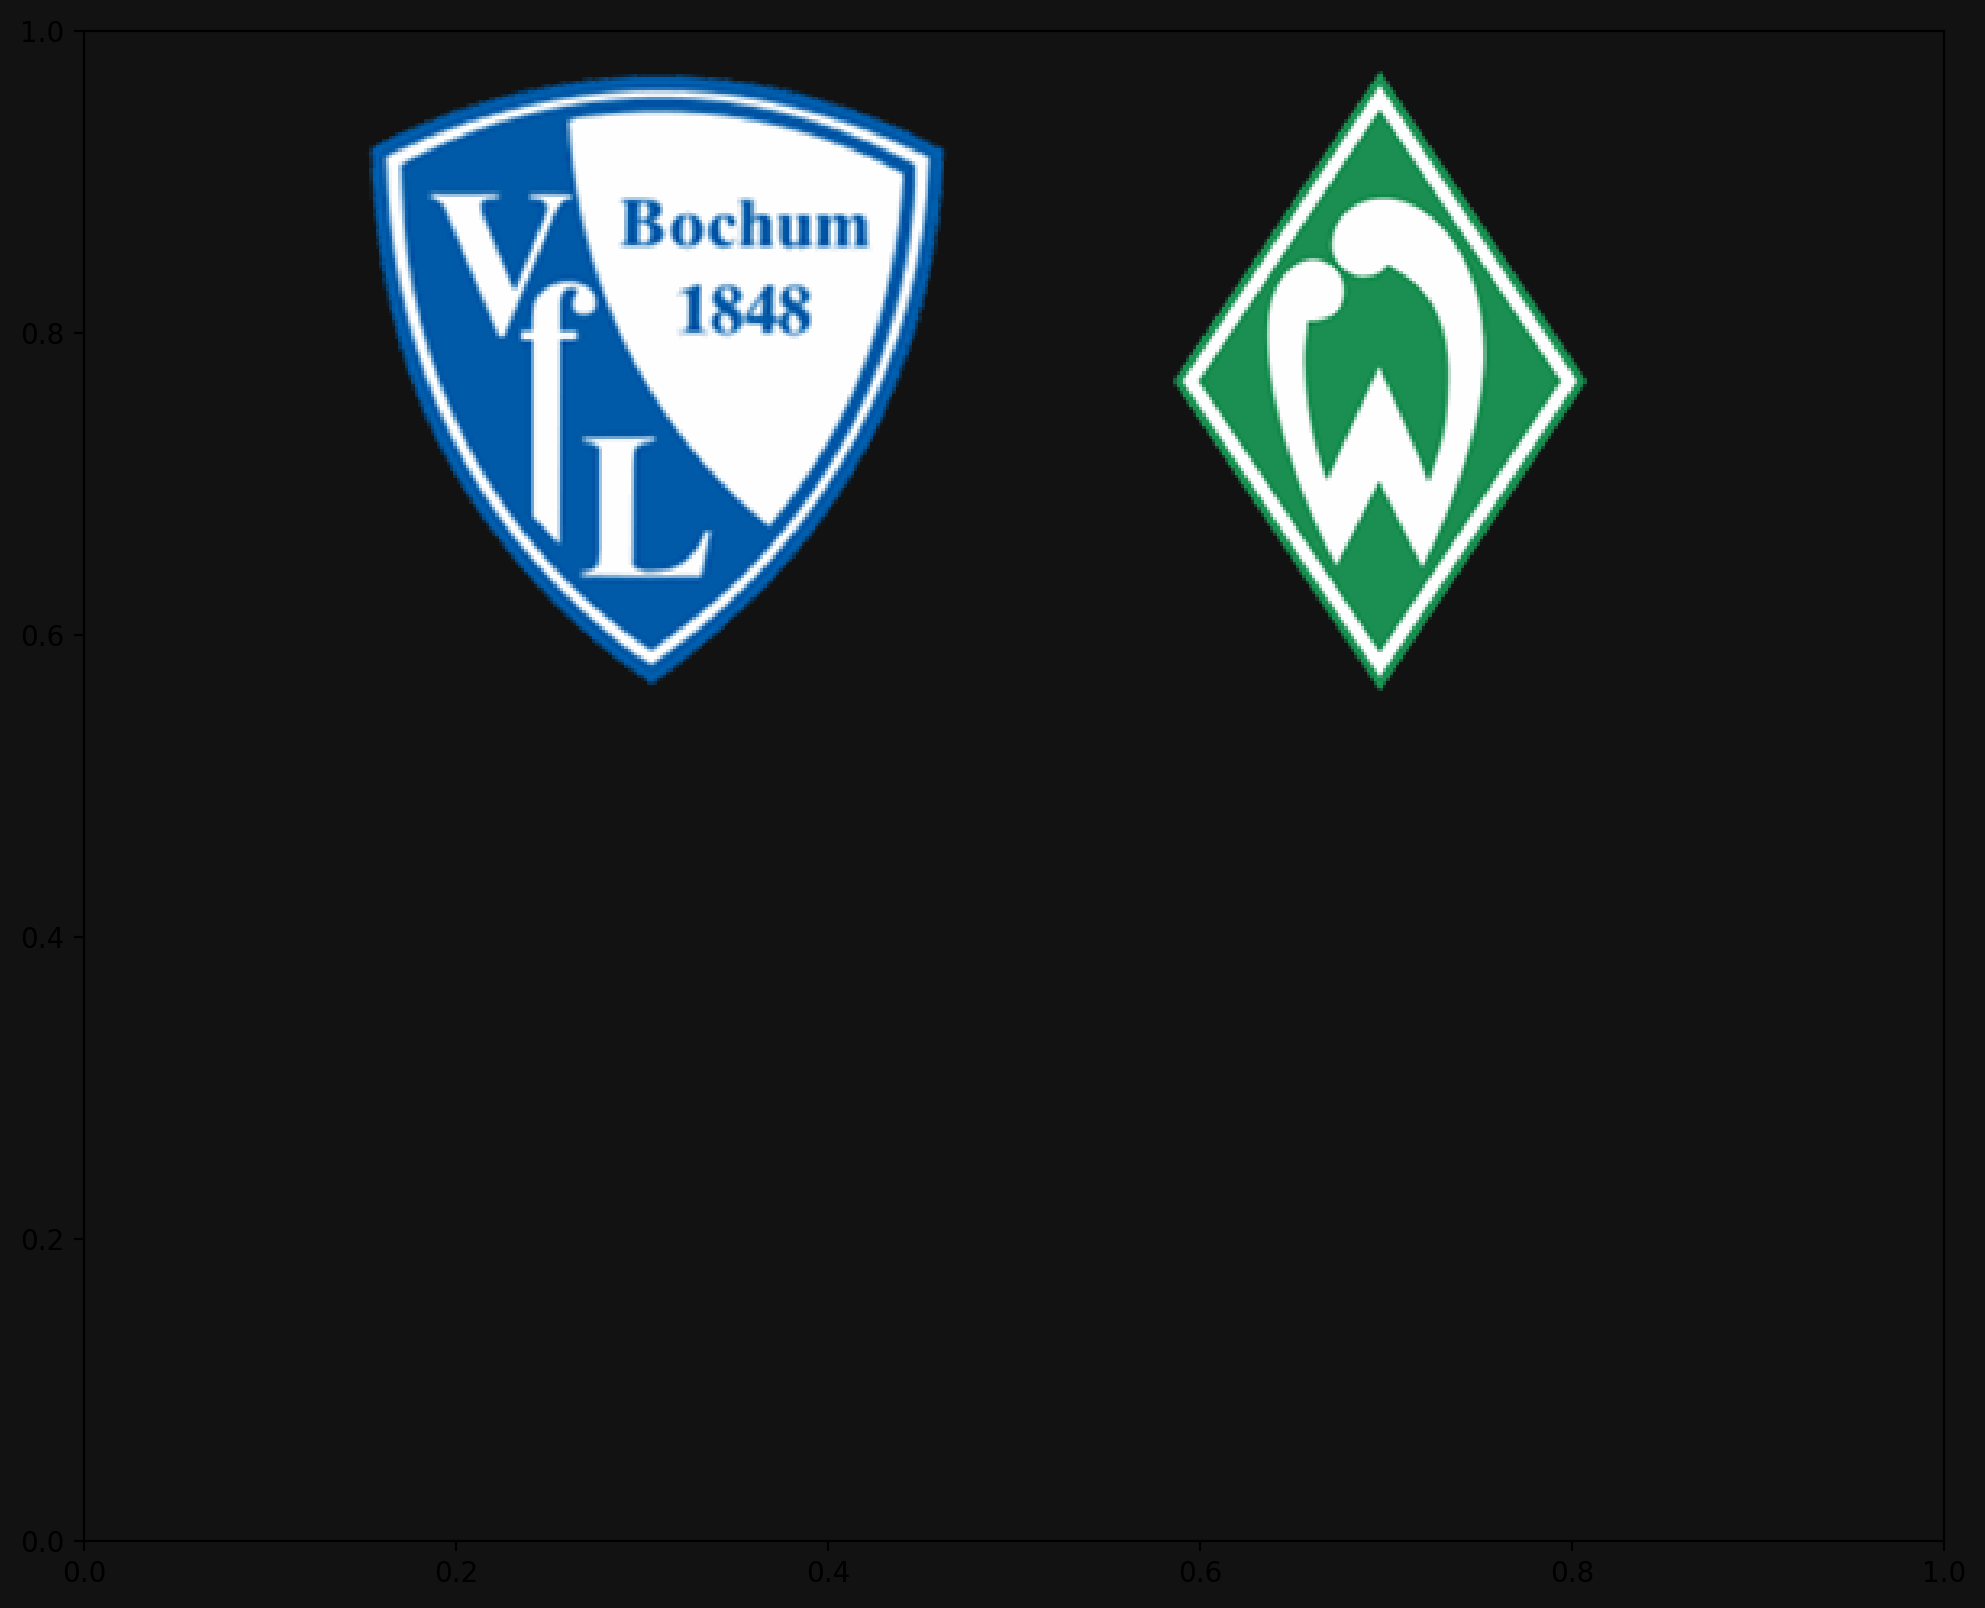

[4.0, 23.0, 21.6, 30.0, 29.64, 16.0, 17.69]
EPL


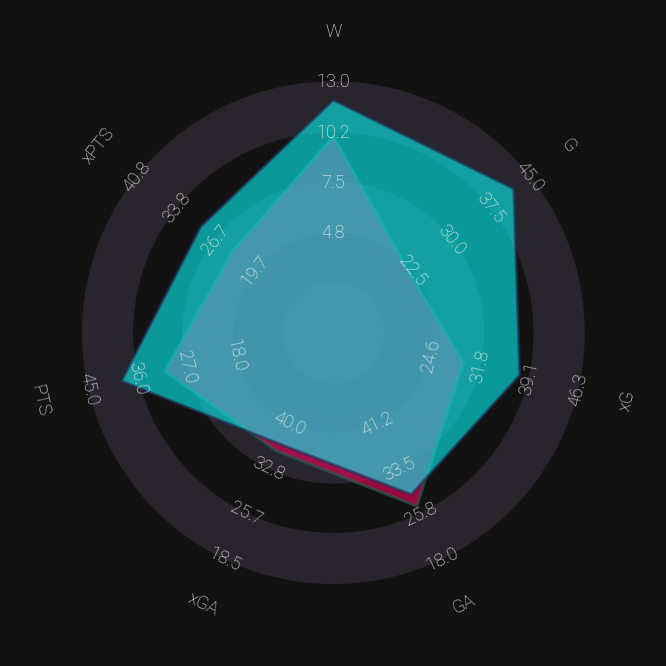

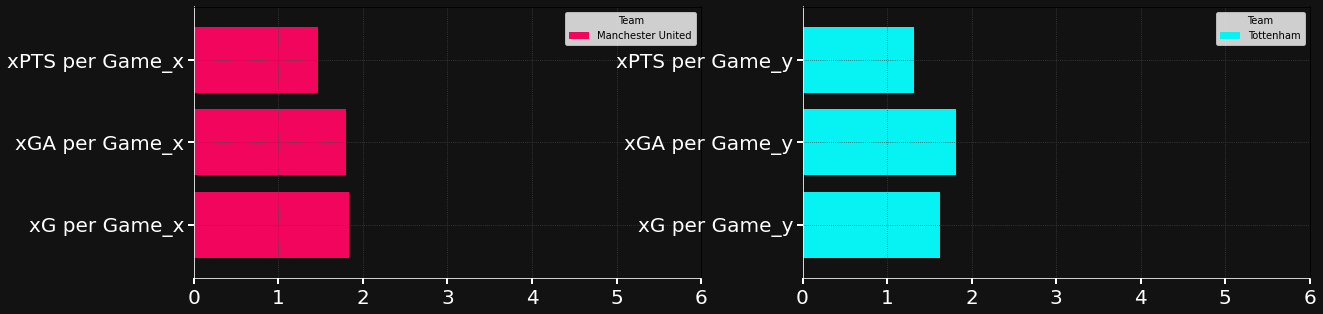

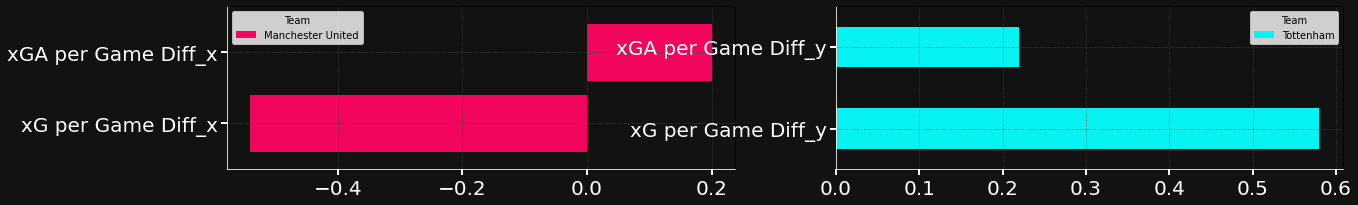

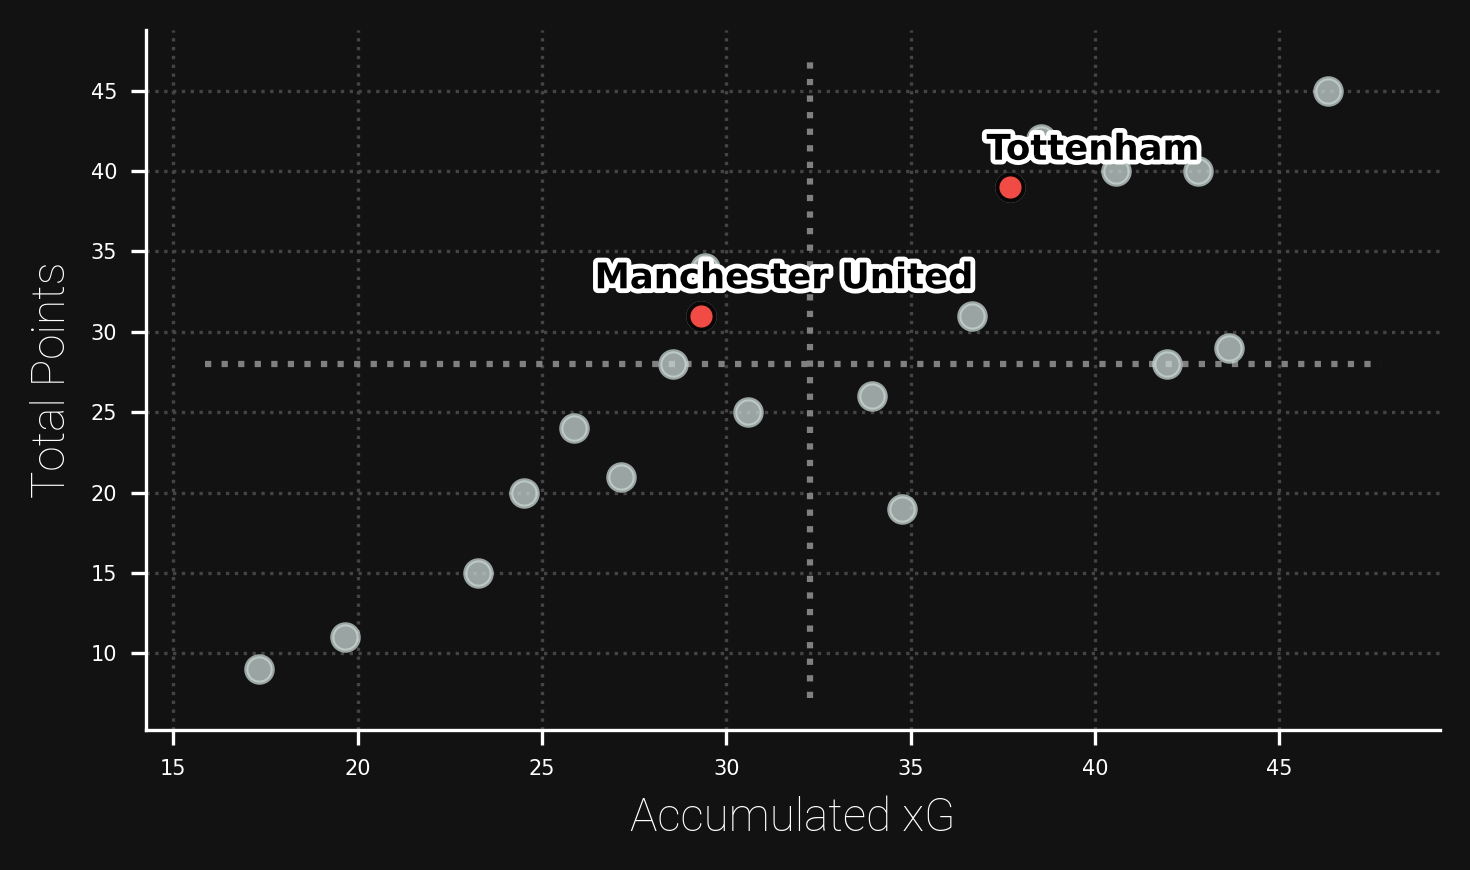

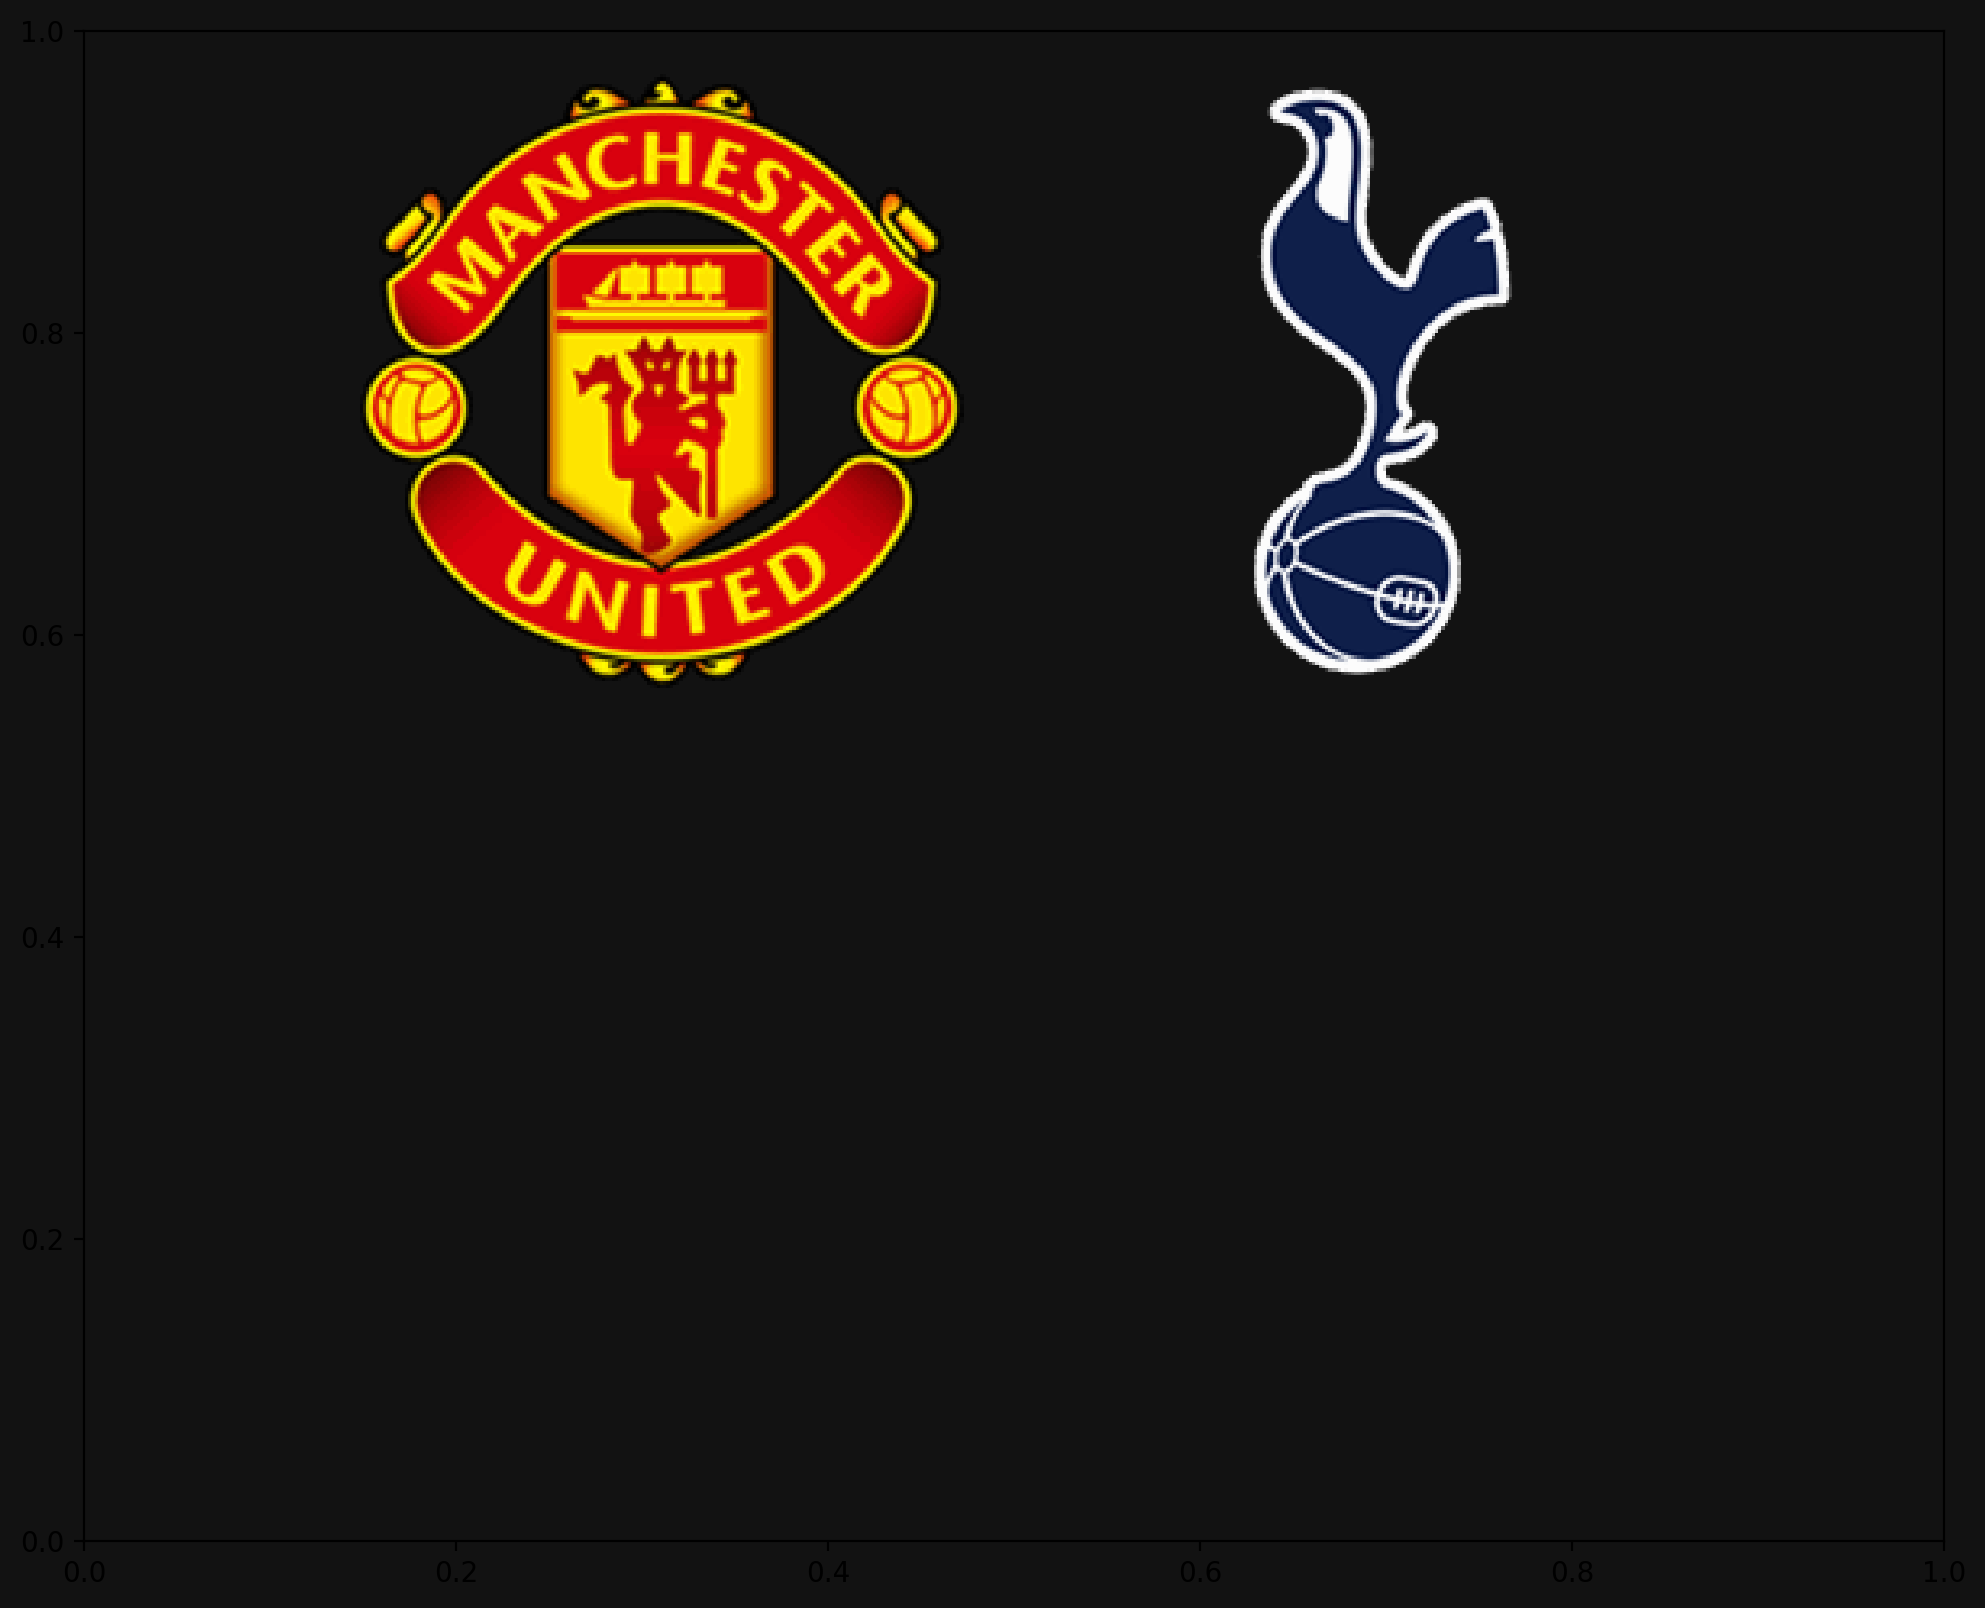

[12.0, 42.0, 37.68, 29.0, 36.66, 39.0, 29.43]
EPL


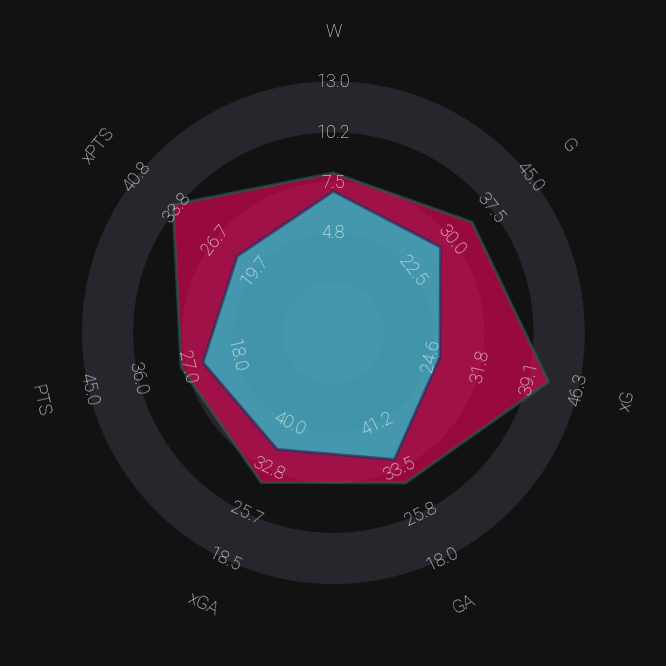

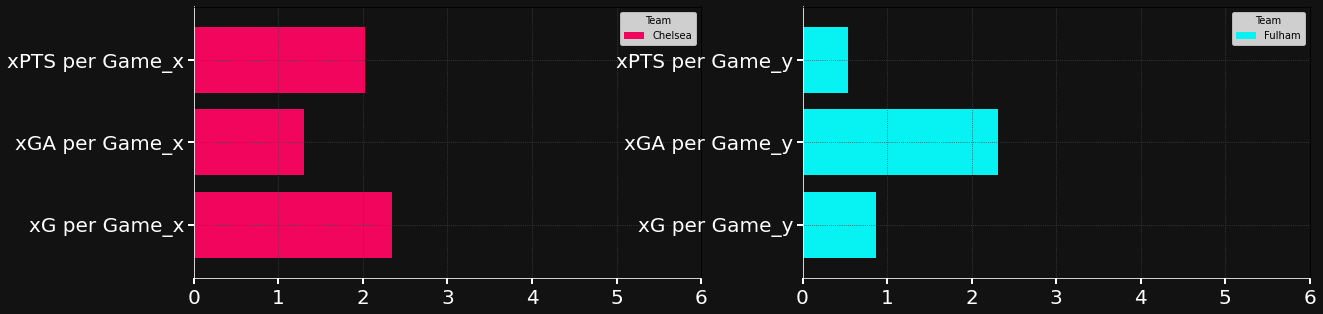

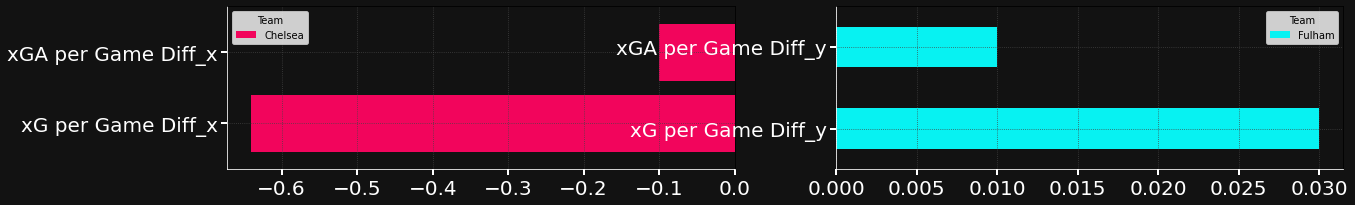

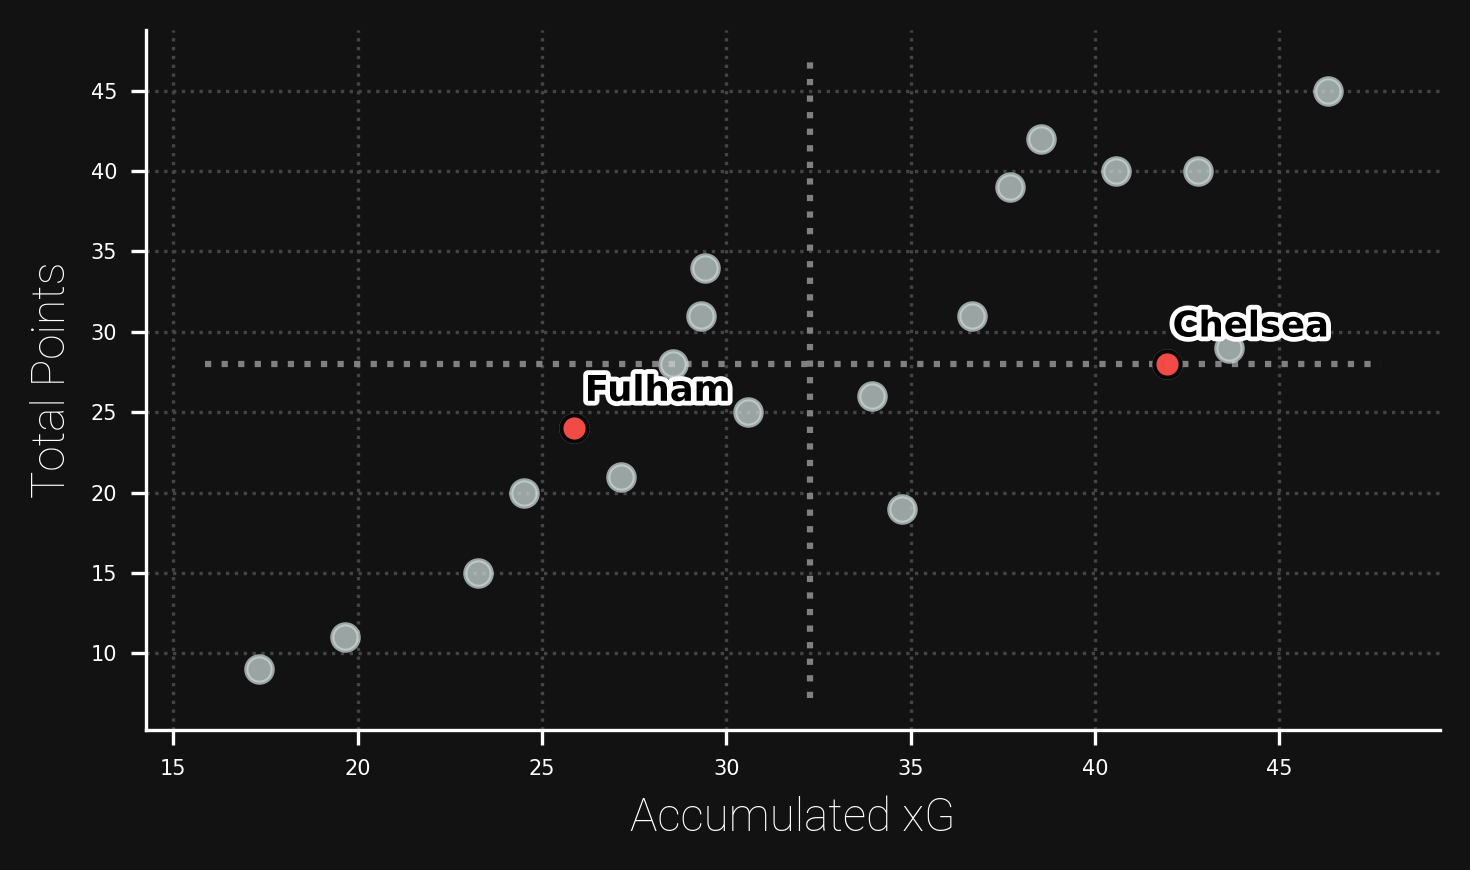

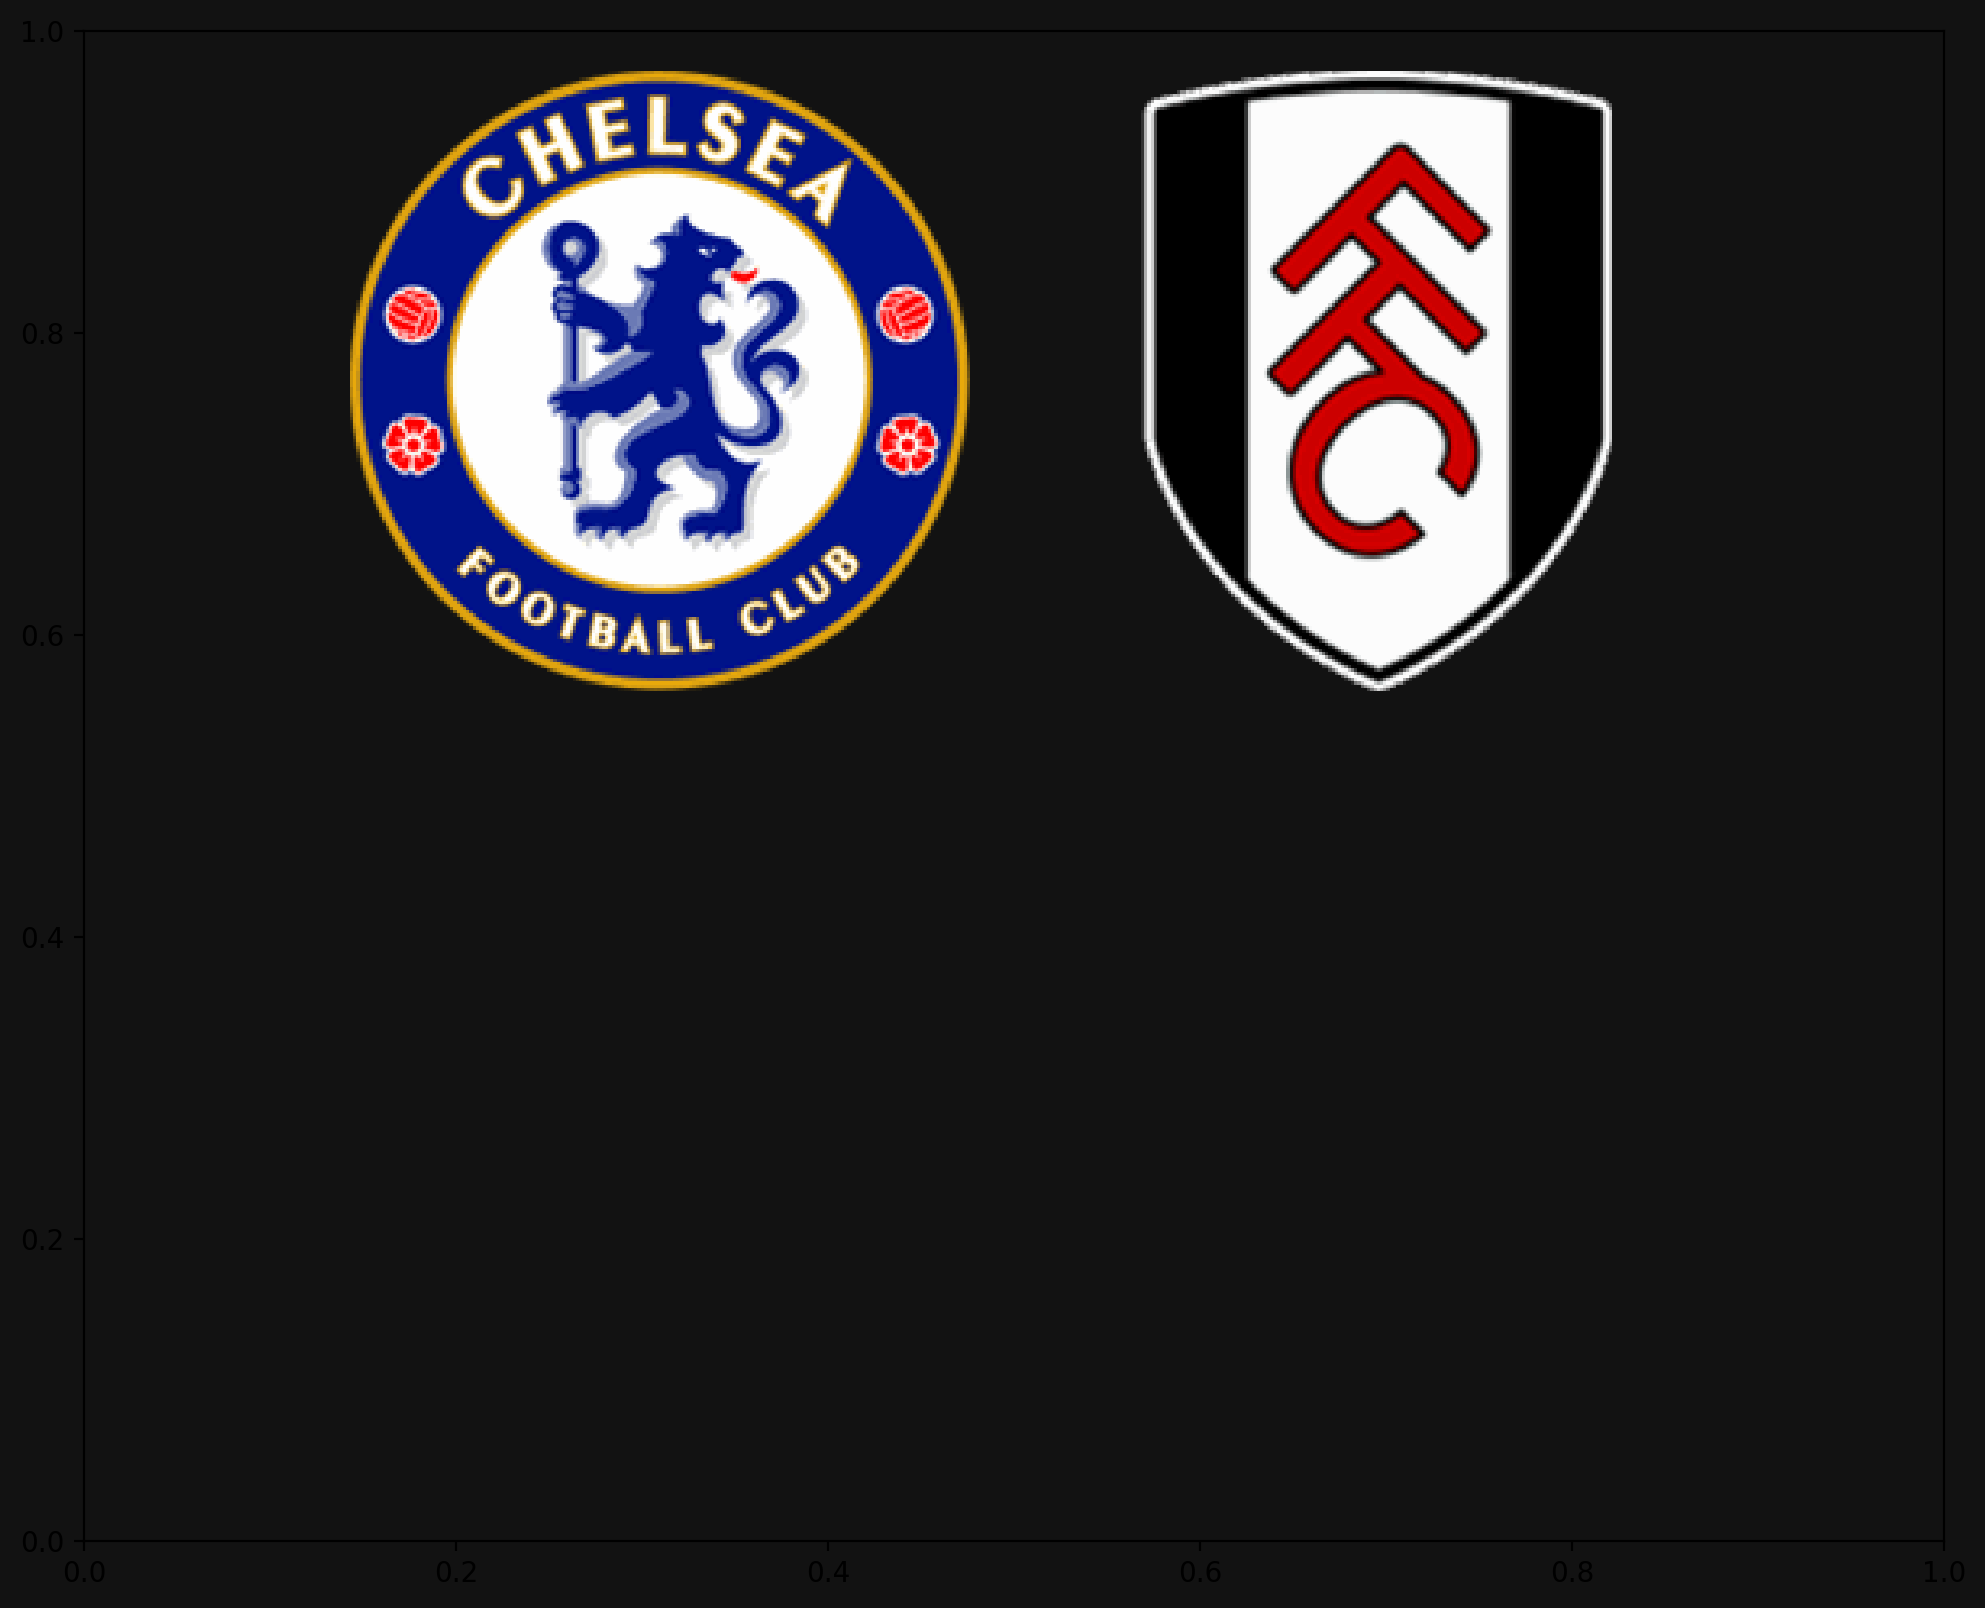

[7.0, 28.0, 25.87, 35.0, 35.81, 24.0, 22.85]


In [63]:
counter = 0


# la liga: #A50044, #EDBB00
#premier league: #F2055C, #340040 | 3rd option #07F2F2
# bundesliga: #B0A55F, #D71016
# ligue1: keep like it is: #aa65b2, #697cd4
#seriea: #008fd7 , #00be1b

while counter <= len(games_df)-1:
    if games_df['League'][counter] == 'La Liga':
        print('La Liga')
        report_automation(laliga_df, games_df['home_team'][counter], games_df['away_team'][counter], '#A50044', '#EDBB00')
    elif games_df['League'][counter] == 'Bundesliga':
        print('Bundesliga')
        report_automation(bundesliga_df, games_df['home_team'][counter], games_df['away_team'][counter], '#B0A55F', '#D71016',  )
    elif games_df['League'][counter] == 'EPL':
        print('EPL')
        report_automation(epl_df, games_df['home_team'][counter], games_df['away_team'][counter], '#F2055C', '#07F2F2')
    elif games_df['League'][counter] == 'Serie A':
        print('Serie A')
        report_automation(seriea_df, games_df['home_team'][counter], games_df['away_team'][counter], '#008fd7', '#00be1b')
    elif games_df['League'][counter] == 'Ligue 1':
        print('Ligue 1')
        report_automation(ligue1_df, games_df['home_team'][counter], games_df['away_team'][counter], '#aa65b2', '#697cd4')
    
    else: 
        print('Something is wrong with games_df input')
        break
    counter += 1


In [64]:
games_df

Game      League  +1.5(%)  \
0                     Bayern Munich vs Hoffenheim  Bundesliga     1.00   
1                   Tottenham vs Newcastle United         EPL     0.97   
2                        Freiburg vs Union Berlin  Bundesliga     0.96   
3                    Augsburg vs Bayer Leverkusen  Bundesliga     0.96   
4   RasenBallsport Leipzig vs Eintracht Frankfurt  Bundesliga     0.96   
5                  Darmstadt vs Borussia Dortmund  Bundesliga     0.96   
6                    Sheffield United vs West Ham         EPL     0.96   
7                         Real Madrid vs Mallorca     La Liga     0.94   
8                         Bochum vs Werder Bremen  Bundesliga     0.94   
9                  Manchester United vs Tottenham         EPL     0.95   
10                              Chelsea vs Fulham         EPL     0.94   

    +2.5(%)  +3.5(%)  H+1.5(%)  A+1.5(%)    xG Decision O1.5 O2.5 H1.5  \
0      0.98     0.92      0.97      0.20  8.48     O2.5                  
1      0.86     0.66      0.76      0.43  6.39     O2.5                  
2      0.85     0.67      0.83      0.14  5.80     O2.5                  
3      0.85     0.65      0.25      0.80  5.96     O2.5                  
4      0.84     0.66      0.83      0.09  5.53     O2.5                  
5      0.84     0.63      0.31      0.76  5.96     O2.5                  
6      0.82     0.60      0.32      0.74  5.84     O1.5                  
7      0.81     0.64      0.81      0.01  4.88     O1.5                  
8      0.80     0.58      0.75      0.18  5.39     O1.5                  
9      0.79     0.55      0.34      0.68  5.60     O1.5                  
10     0.78     0.57      0.75      0.13  5.17     O1.5                  

                 home_team            away_team  
0            Bayern Munich           Hoffenheim  
1                Tottenham     Newcastle United  
2                 Freiburg         Union Berlin  
3                 Augsburg     Bayer Leverkusen  
4   RasenBallsport Leipzig  Eintracht Frankfurt  
5                Darmstadt    Borussia Dortmund  
6         Sheffield United             West Ham  
7              Real Madrid             Mallorca  
8                   Bochum        Werder Bremen  
9        Manchester United            Tottenham  
10                 Chelsea               Fulham

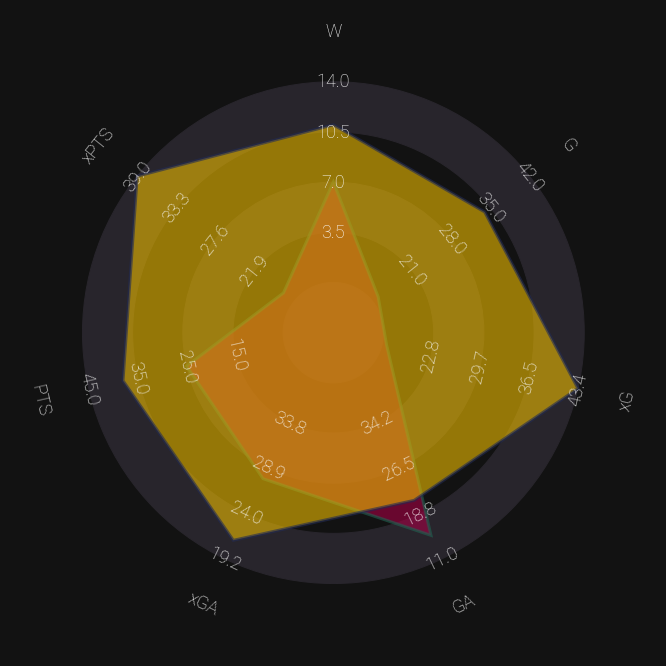

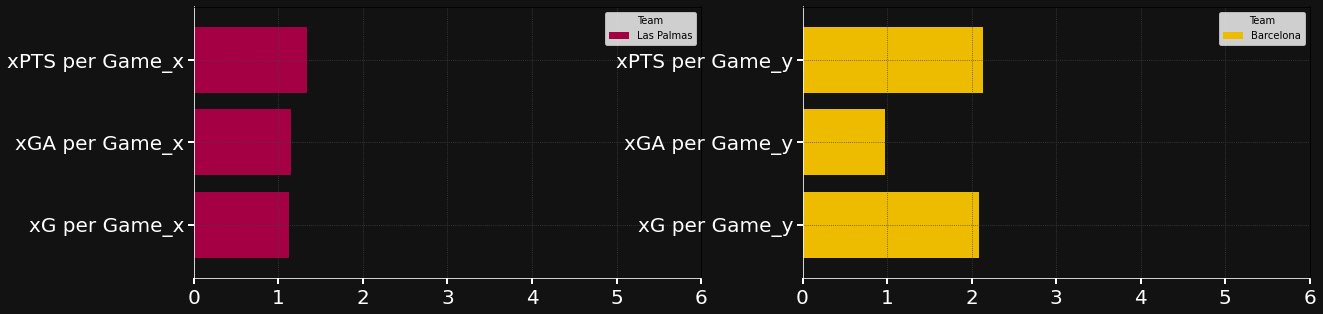

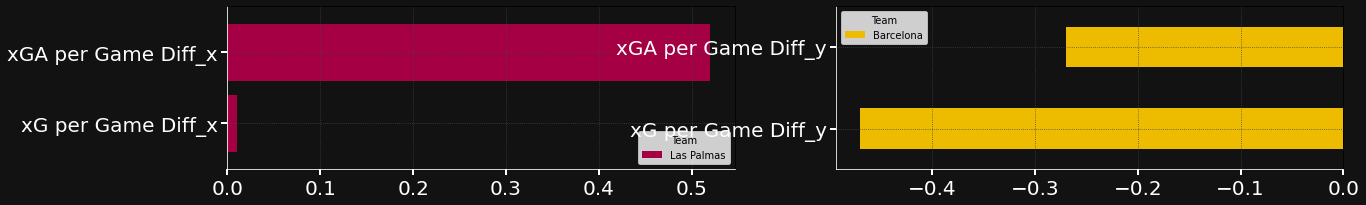

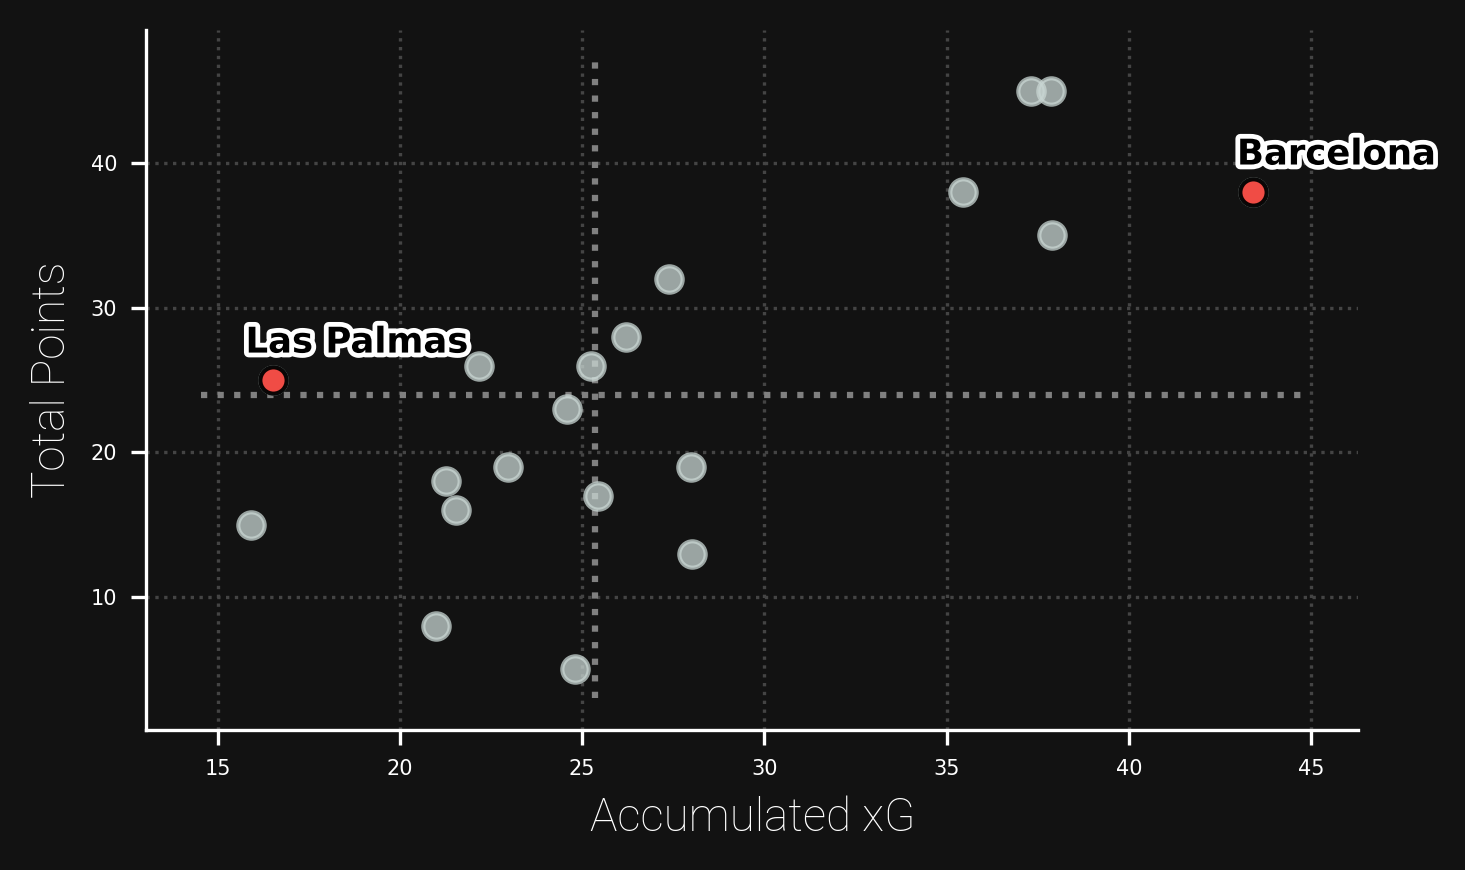

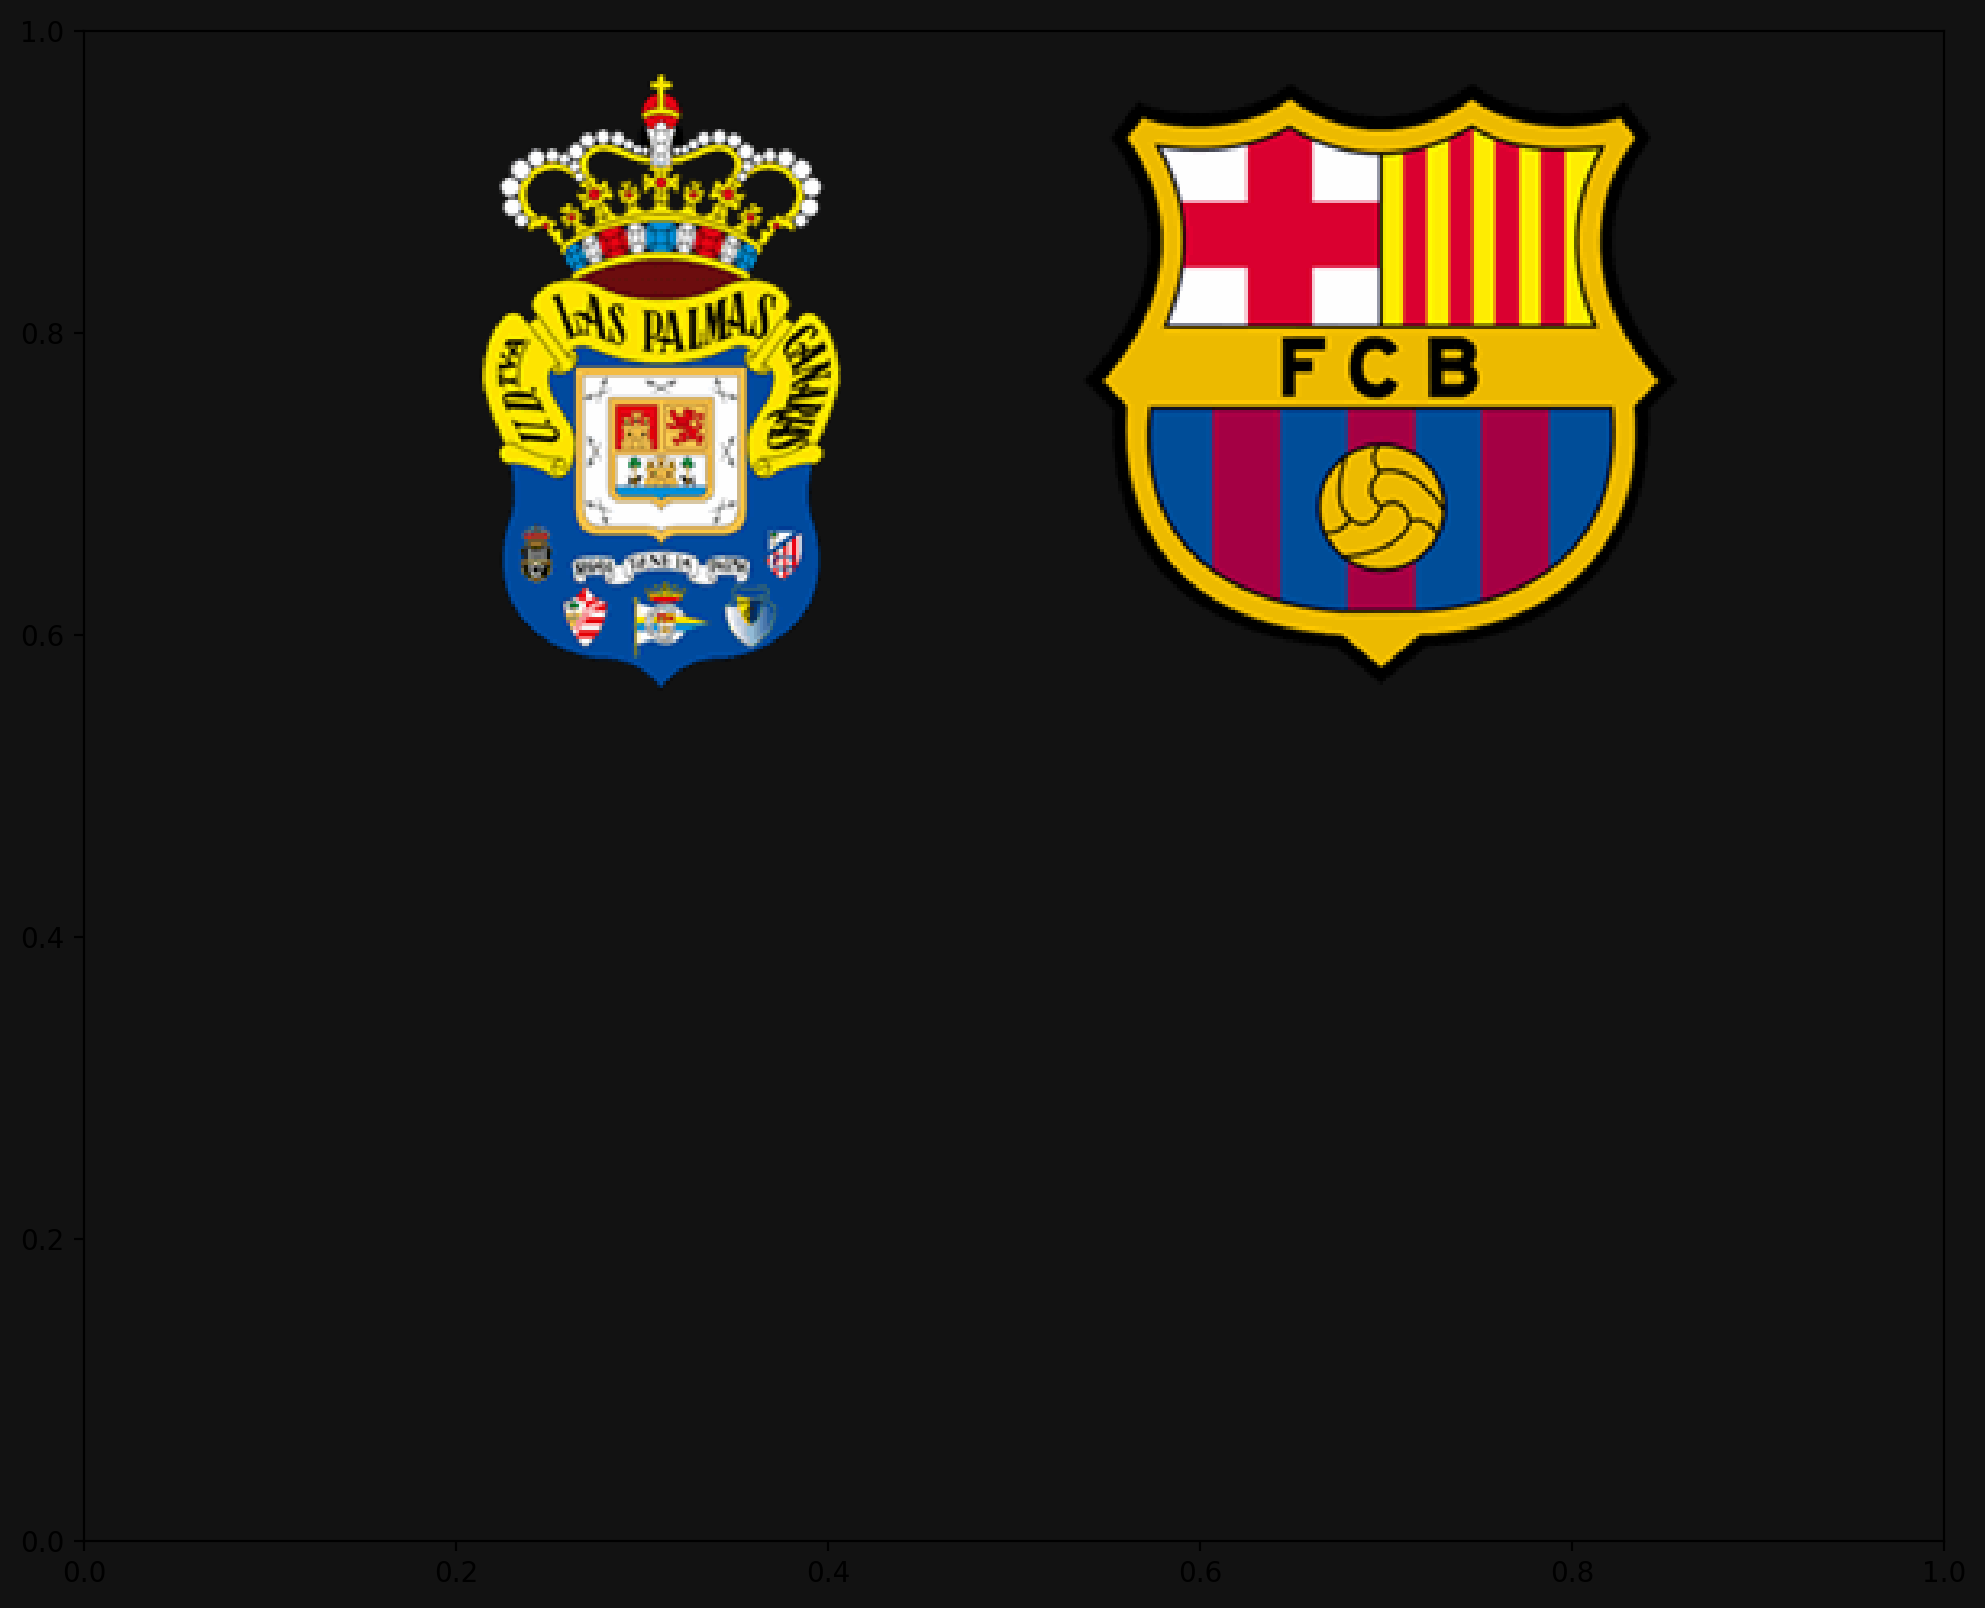

[11.0, 34.0, 43.4, 21.0, 21.15, 38.0, 38.95]


In [66]:
report_automation(laliga_df, 'Las Palmas', 'Barcelona' , '#A50044', '#EDBB00')